# Counterfeit Medicine Sales Prediction

**By:** Hedgar Ajakaiye, 
     **September 2019**  

## Introduction

Counterfeit medicines are fake medicines which are either contaminated or contain wrong or no active ingredient. They could have the right active ingredient but at the wrong dose. Counterfeit drugs are illegal and are harmful to health. `10%` of the world's medicine is counterfeit and the problem is even worse in developing countries. Up to `30%` of medicines in developing countries are counterfeit.

Millions of pills, bottles and sachets of counterfeit and illegal medicines are being traded across the world. The World Health Organization (WHO) is working with International Criminal Police Organization (Interpol) to dislodge the criminal networks raking in billions of dollars from this cynical trade.

Despite all these efforts, counterfeit medicine selling rackets don’t seem to stop popping here and there. It has become a challenge to deploy resources to counter these; without spreading them too thin and eventually rendering them ineffective. Government has decided that they should focus on illegal operations of high networth first instead of trying to control all of them. In order to do that they have collected data which will help them to predict sales figures given an illegal operation's characteristics


## Formal Problem Statement

We would like to make example out a few of these counterfeiters but the challenge is what yardstick can we employ to determine the 'big fish(es)' that we can use as scape goat to send a strong message to these clandestine communities and equally serve as deterrent. After considering numerous features and attributes of these counterfeiters, we resolved to zero in on their sales figures. To this end we shall put to use the power of machine learning to scientifically predict current and future counterfeiters and stop them in their tracks for good!

We would train a model on  data we have collected secretly over the years on their operations. The data dictionary of the data is as follows:

                                                                                                                                                


|Variable               |        Description/Values                                                                    |
|:----------------------|:--------------------------------------------------------------------------:|
|Medicine_ID            |Alphanumeric identification number;Normal Integer                           |
|Counterfeit weight     |weighted percentage attached to each medicine;continuous                    |
|District_ID            |District identification number;alphanumeric                                 |
|Active since           | Year(s)monitoring started till date;Integer                                |
|Medicine MRP           | Medicine price quotes/codes;continuous                                     |
|Medicine type          |The type of the medicine,categorical                                        |
|Side effect level      |The severity of the side effect associated with the medicine;categorical    |
|Availability Rating    |The rate at which the medicine is availablecontinuous                       |
|Area type              |The level of development of an area                                         |
|Area city type         |City rate level;categorical                                                 |
|Area district level    |The level of the area district.categorical                                  |
|Counterfeit sales      |sales figures of counterfeited drugs/medicine                               |






## Load Library, Packages, Modules

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import  mean_absolute_error
from sklearn.metrics import  r2_score, scorer
from sklearn.metrics import  mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from xgboost.sklearn import XGBClassifier
import warnings
warnings.simplefilter('ignore')

%matplotlib inline


/Users/ajakaiye/miniconda3/envs/minimal_ds/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/ajakaiye/miniconda3/envs/minimal_ds/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/ajakaiye/miniconda3/envs/minimal_ds/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/ajakaiye/minico

In [2]:
plt.rcParams['figure.figsize'] = (20.0, 10.0)
#plt.rcParams.update({'font.size':25})

## Load Data

In [3]:
# change directory
# point to the directory that house the data
os.chdir("/Users/ajakaiye/Documents/data")

In [4]:
# read data into pandas
train_data = pd.read_csv('counterfeit_train.csv')
test_data = pd.read_csv('counterfeit_test.csv')

In [5]:
#shape of test and train data
train_data.shape, test_data.shape

((6818, 12), (1705, 11))

In [6]:
train_data.columns

Index(['Medicine_ID', 'Counterfeit_Weight', 'DistArea_ID', 'Active_Since',
       'Medicine_MRP', 'Medicine_Type', 'SidEffect_Level',
       'Availability_rating', 'Area_Type', 'Area_City_Type', 'Area_dist_level',
       'Counterfeit_Sales'],
      dtype='object')

In [7]:
# combine test and train data to ensure uniform preprocessing
# to combine test and train data successfully, the value of the columns of test and train data must equal
test_data['Counterfeit_Sales'] =np.nan
test_data['data'] = 'test'
train_data['data'] = 'train'
test_data = test_data[train_data.columns]
all_data = pd.concat([test_data, train_data], axis=0)



In [8]:
all_data.head()

,Medicine_ID,Counterfeit_Weight,DistArea_ID,Active_Since,Medicine_MRP,Medicine_Type,SidEffect_Level,Availability_rating,Area_Type,Area_City_Type,Area_dist_level,Counterfeit_Sales,data
0,HLZ81,NaN,Area027,1983,85.5328,Antibiotics,mild,0.112747,CityLimits,Tier 3,Medium,NaN,test
1,ECE94,13.45,Area045,2000,257.1460,OralContraceptives,mild,0.144446,DownTown,Tier 2,Unknown,NaN,test
2,SAD14,7.10,Area045,2000,98.1172,Antipyretics,mild,0.144221,DownTown,Tier 2,Unknown,NaN,test
3,EQV63,18.30,Area010,1996,135.3730,Tranquilizers,mild,0.100388,MidTownResidential,Tier 3,Unknown,NaN,test
4,AIR10,NaN,Area019,1983,112.8016,OralContraceptives,mild,0.022585,MidTownResidential,Tier 1,Small,NaN,test


In [9]:
#check the dimension
all_data.shape

(8523, 13)

In [10]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 0 to 6817
Data columns (total 13 columns):
Medicine_ID            8523 non-null object
Counterfeit_Weight     7060 non-null float64
DistArea_ID            8523 non-null object
Active_Since           8523 non-null int64
Medicine_MRP           8523 non-null float64
Medicine_Type          8523 non-null object
SidEffect_Level        8523 non-null object
Availability_rating    8523 non-null float64
Area_Type              8523 non-null object
Area_City_Type         8523 non-null object
Area_dist_level        8523 non-null object
Counterfeit_Sales      6818 non-null float64
data                   8523 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 932.2+ KB


In [11]:
#make the column names uniform
def clean_colname(name):
    name = name.strip().lower()
    return name
all_data = all_data.rename(columns= clean_colname)
all_data.head()

,medicine_id,counterfeit_weight,distarea_id,active_since,medicine_mrp,medicine_type,sideffect_level,availability_rating,area_type,area_city_type,area_dist_level,counterfeit_sales,data
0,HLZ81,NaN,Area027,1983,85.5328,Antibiotics,mild,0.112747,CityLimits,Tier 3,Medium,NaN,test
1,ECE94,13.45,Area045,2000,257.1460,OralContraceptives,mild,0.144446,DownTown,Tier 2,Unknown,NaN,test
2,SAD14,7.10,Area045,2000,98.1172,Antipyretics,mild,0.144221,DownTown,Tier 2,Unknown,NaN,test
3,EQV63,18.30,Area010,1996,135.3730,Tranquilizers,mild,0.100388,MidTownResidential,Tier 3,Unknown,NaN,test
4,AIR10,NaN,Area019,1983,112.8016,OralContraceptives,mild,0.022585,MidTownResidential,Tier 1,Small,NaN,test


In [12]:
#check and treat missing value. This value should exlude the counterfeit sale column as the na there is intentional
all_data.isnull().mean() * 100

medicine_id             0.000000
counterfeit_weight     17.165317
distarea_id             0.000000
active_since            0.000000
medicine_mrp            0.000000
medicine_type           0.000000
sideffect_level         0.000000
availability_rating     0.000000
area_type               0.000000
area_city_type          0.000000
area_dist_level         0.000000
counterfeit_sales      20.004693
data                    0.000000
dtype: float64

In [13]:
# fill missing values in counterfeit_weight columns with the mean weight
# the counterfeit_weight column portion of the training data set and not the combined portion shall be used to calculate the mean
# all_data['counterfeit_weight'].mean() # 14.158
# all_data['counterfeit_weight'].fillna(14.158, inplace = True)
# print('current number of missing value ', all_data['counterfeit_weight'].isnull().sum())
filt = all_data['data'] == 'train'
all_data.loc[filt, 'counterfeit_weight'].mean() # 14.115
all_data['counterfeit_weight'].fillna(14.115, inplace= True)
print('Total number of missing values after treatment:', all_data['counterfeit_weight'].isnull().sum())




Total number of missing values after treatment: 0


In [14]:
# display descriptive stats
all_data.describe().T

,count,mean,std,min,25%,50%,75%,max
counterfeit_weight,8523.0,14.150325,4.226154,5.855,10.610000,14.115000,17.300000,22.650000
active_since,8523.0,1995.831867,8.371760,1983.000,1985.000000,1997.000000,2002.000000,2007.000000
medicine_mrp,8523.0,151.292782,62.275067,41.590,104.126500,153.312800,195.943700,277.188400
availability_rating,8523.0,0.079132,0.051598,0.013,0.039989,0.066931,0.107585,0.341391
counterfeit_sales,6818.0,2280.583480,1693.354404,146.290,933.265600,1902.670400,3207.638400,13199.964800


In [15]:
# columns with float type
cont_features = all_data.select_dtypes(include=['float64']).columns

In [16]:
#column with integer data type
integer_features = all_data.select_dtypes(include=['int64']).columns

In [17]:
#columns with categorical type. This does not include the 'data' which serves the purpose of a separator
all_data.select_dtypes(include=['object']).columns

Index(['medicine_id', 'distarea_id', 'medicine_type', 'sideffect_level',
       'area_type', 'area_city_type', 'area_dist_level', 'data'],
      dtype='object')

## Data Exploration

#### How many unique medicine type are present?

In [18]:
# Number of unique medicine type
train_data['Medicine_Type'].nunique()

16

#### which area type has the highest counterfeit drug?
Down Town, Area has the highest number of counterfeited drugs and medicine

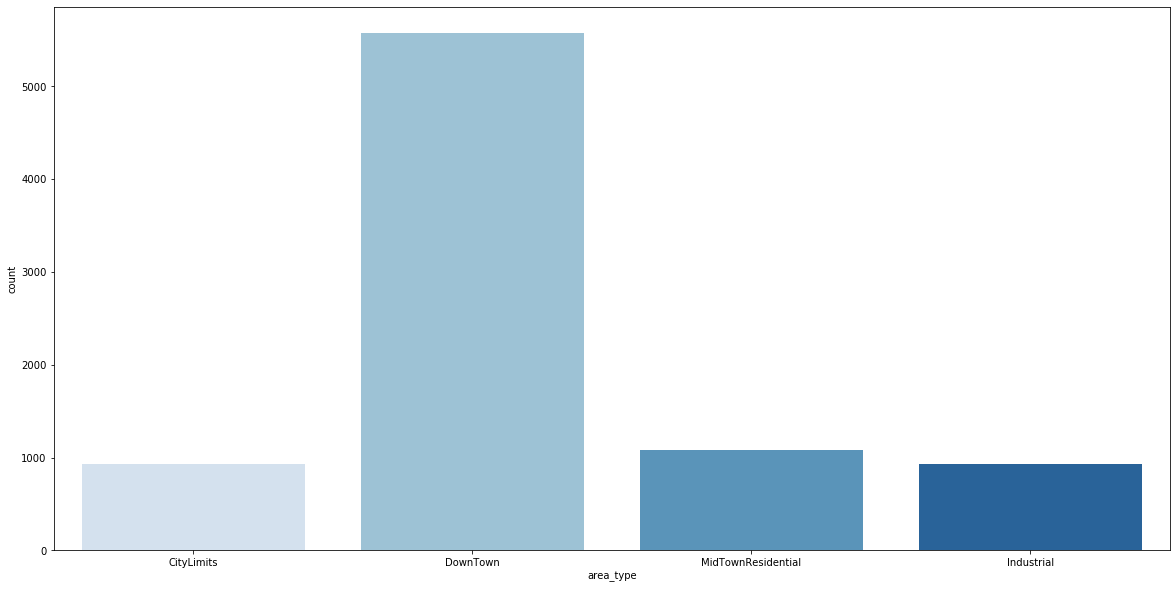

In [19]:
#which area type has the highest counterfeit drug

# train_data['Area_Type'].value_counts().plot(kind = 'bar')
# plt.xlabel('Area Type')
# plt.ylabel('count')
# plt.title('Counterfeit Drug Area Type Count');
sns.countplot(x ='area_type', data=all_data, palette='Blues');

### Which medicine type has the lowest count and their respective level of side effects?
Antiviral appears to be the least counterfeited medicine whereas Antibiotics are the third most counterfeited drug but with the most critical side effect level

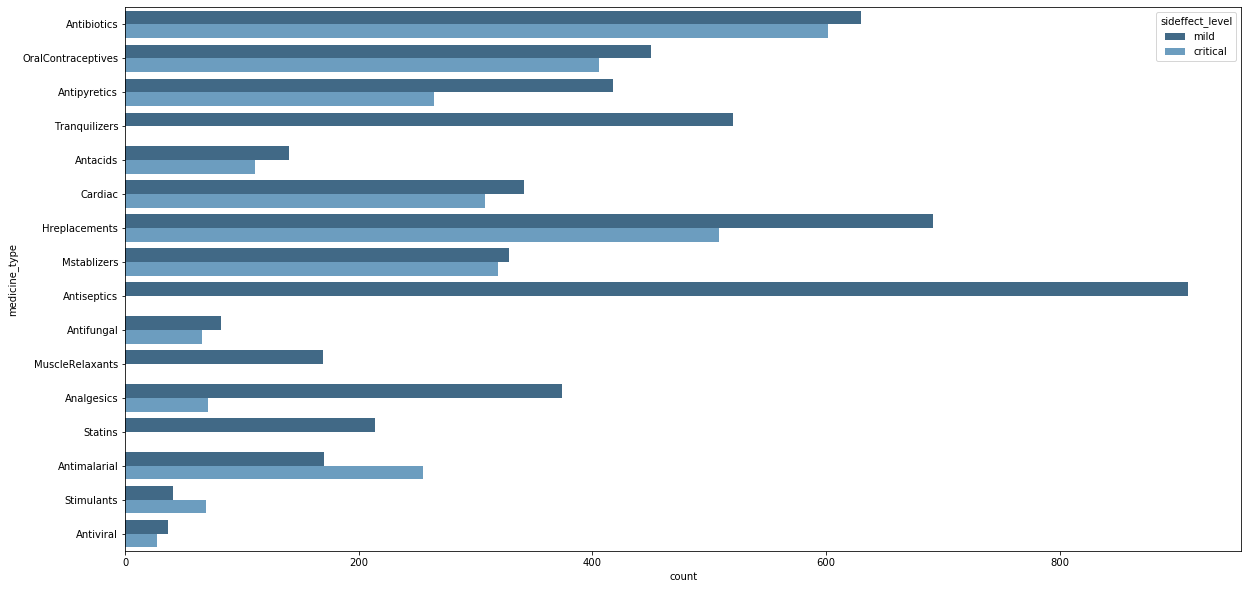

In [20]:
#which medicine type has the lowest count
#train_data['Medicine_Type'].value_counts(ascending=True)
sns.countplot(y='medicine_type', hue='sideffect_level', data=all_data, palette='Blues_d');

## How does the distribution of the counterfeit sale looks like
The distribution is not normal rather skewed to the right. This means that a handful of medicine have very high sales figures. This could also mean that there are alot of outliers in the counterfeit sale figure.But improves incredibly when standardize by taking it logarithm. lets check it out!

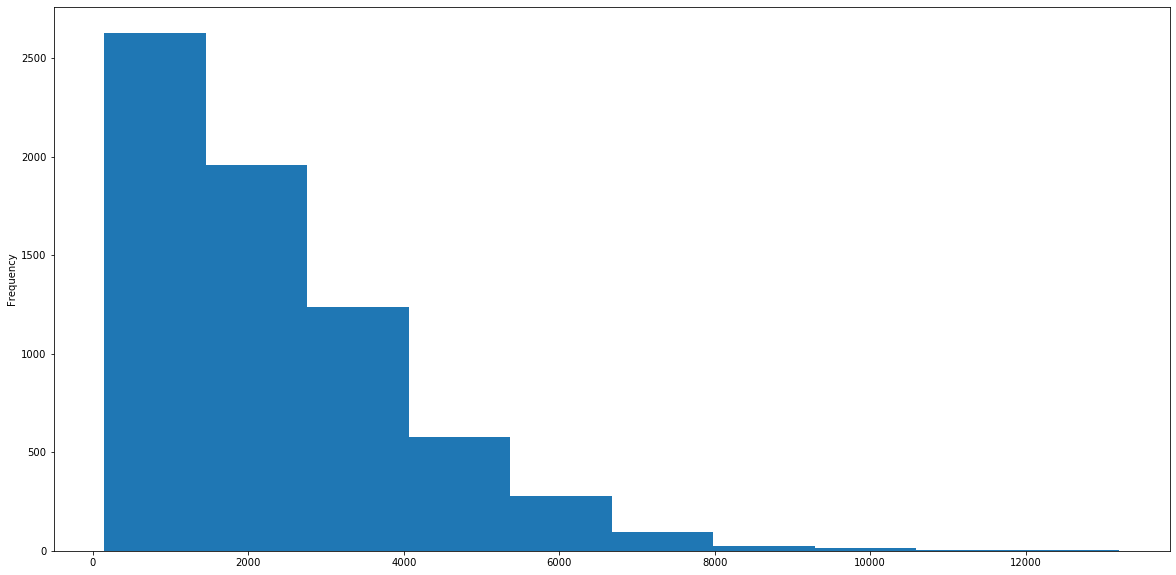

In [21]:
all_data['counterfeit_sales'].plot(kind = 'hist');

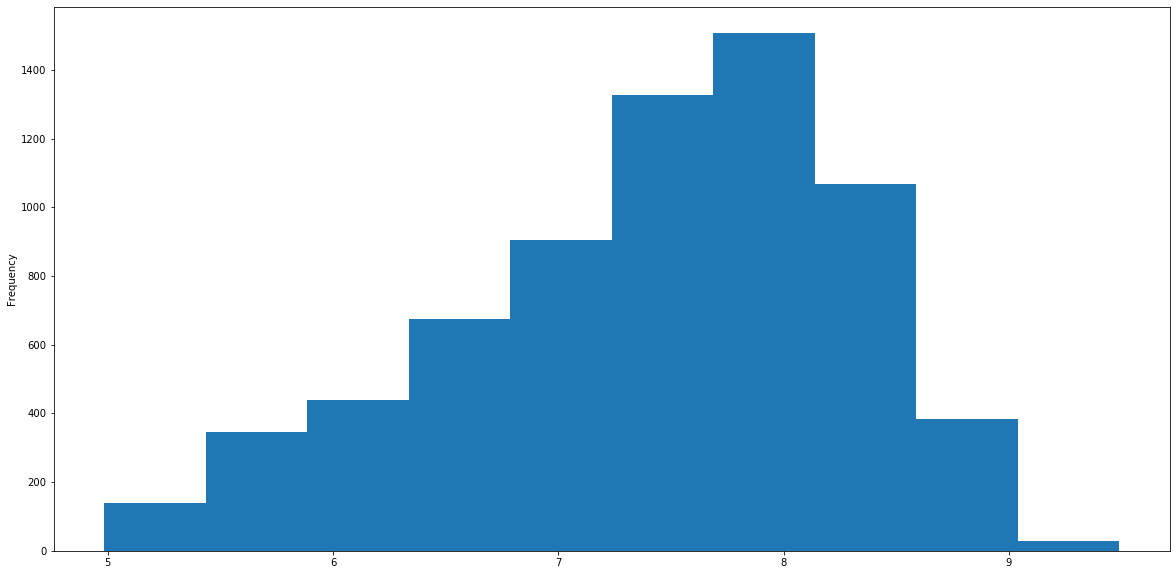

In [22]:
# standardize counterfeit sales
np.log(all_data['counterfeit_sales']).plot(kind = 'hist')

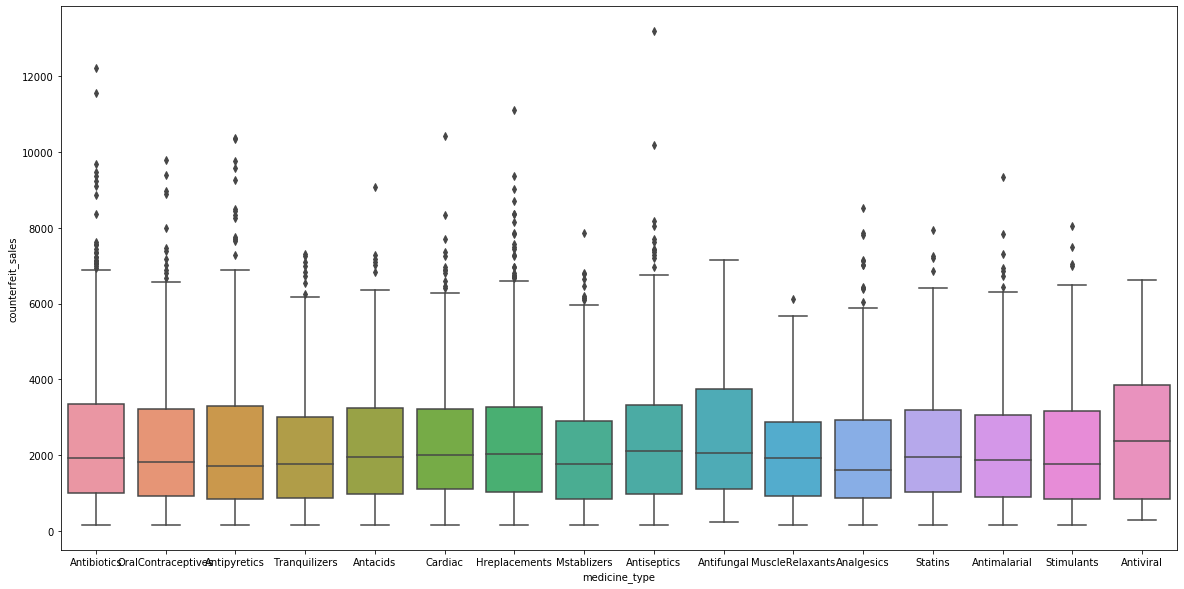

In [23]:
# checking the level of outlier of medicine type with respect to counterfeit sales
sns.boxplot(x = 'medicine_type', y = 'counterfeit_sales', data=all_data);

### What is the average sales figure of counterfeited medicine by medicine type
On average all the medicine type sale figure are above 2000 while **Antiviral** medicine type appears to command the highest average counterfeit sale. However this result should be taken with a pinch of salt until the outliers observed are treated appropriately!


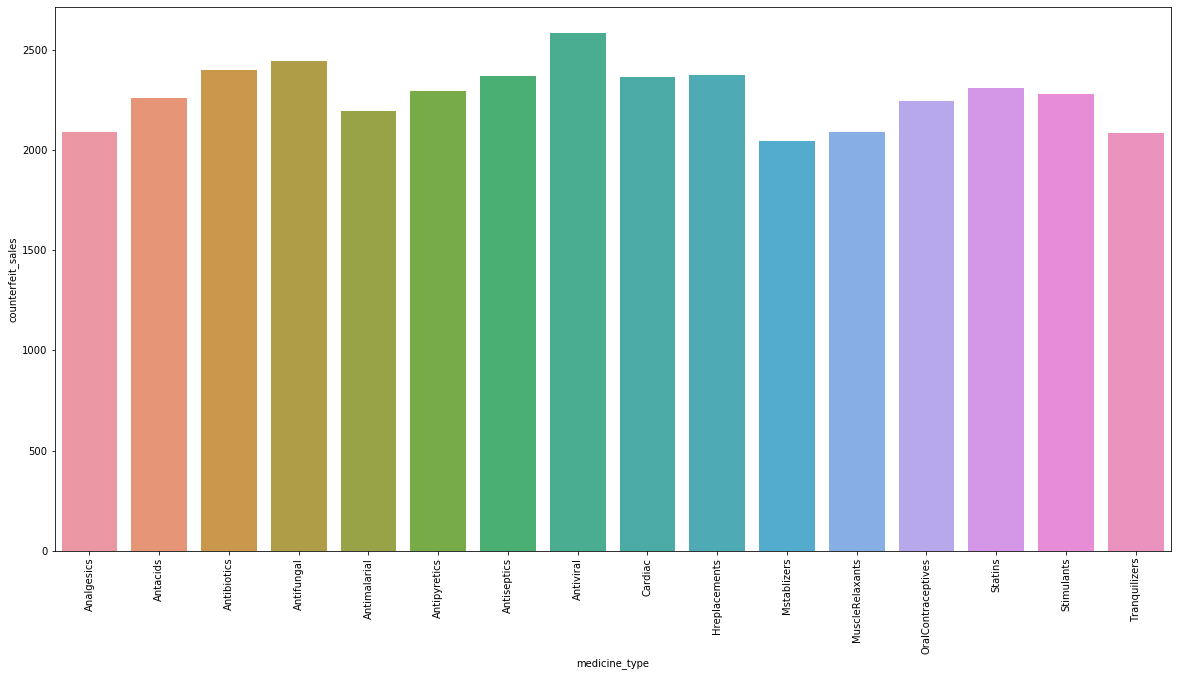

In [24]:
#average sales figure of counterfeited drugs 
filt = all_data['data'] == 'train'
adj_dat = all_data.loc[filt]
#adj_dat['counterfeit_sales'] = np.log(adj_dat['counterfeit_sales'])
avg_sales = adj_dat.groupby('medicine_type').agg({'counterfeit_sales':'mean'}).reset_index()
sns.barplot(x = 'medicine_type', y='counterfeit_sales', data=avg_sales)
plt.xticks(rotation=90);


### Which medicine type has the highest counterfeit sales
While it appears that the **Antiviral** drug has the highest sales figure,this figure is suspect until the outliers observed are treated

In [25]:
filt = all_data['data'] == 'train'
highestsales = all_data.loc[filt]['counterfeit_sales']>= 13199.9648
print('The medicine with the highest sales figure is:',all_data.loc[filt]['medicine_type'][highestsales].values)

The medicine with the highest sales figure is: ['Antiseptics']


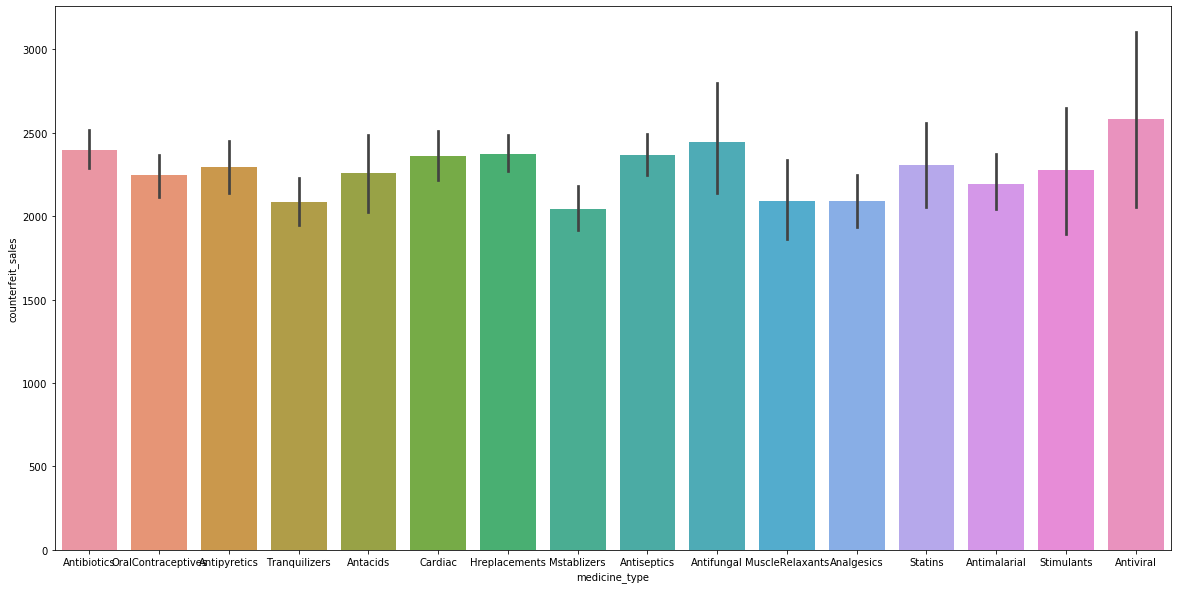

In [26]:
sns.barplot(x = 'medicine_type', y = 'counterfeit_sales', data=all_data);

In [27]:
all_data.columns

Index(['medicine_id', 'counterfeit_weight', 'distarea_id', 'active_since',
       'medicine_mrp', 'medicine_type', 'sideffect_level',
       'availability_rating', 'area_type', 'area_city_type', 'area_dist_level',
       'counterfeit_sales', 'data'],
      dtype='object')

### Data Preprocessing:Feature Engineering

In [28]:
# determine the period from the year since active till date
all_data['period_active'] =  2019 - all_data['active_since']

all_data = all_data.drop('active_since',1)
print('The number of columns after dropping the active_since column:',all_data.shape[1])


The number of columns after dropping the active_since column: 13


In [29]:
#check frequency of column
all_data['medicine_type'].value_counts()


Antibiotics           1232
Hreplacements         1200
Antiseptics            910
OralContraceptives     856
Antipyretics           682
Cardiac                649
Mstablizers            648
Tranquilizers          520
Analgesics             445
Antimalarial           425
Antacids               251
Statins                214
MuscleRelaxants        169
Antifungal             148
Stimulants             110
Antiviral               64
Name: medicine_type, dtype: int64

#### Treatment/transformation  of  categorical variable

In [215]:
# get dummy and drop Antiviral medicine for low frequency
medtypedummy = all_data['medicine_type'].str.get_dummies()


In [216]:
#add to the data frame accordingly
all_data = pd.concat([all_data, medtypedummy],1)
all_data = all_data.drop(['Antiviral','medicine_type'], 1)

In [217]:
all_data['area_type'].value_counts()

DownTown              5577
MidTownResidential    1083
CityLimits             935
Industrial             928
Name: area_type, dtype: int64

In [218]:
#create dummy of area_type
areatype_dummy = all_data['area_type'].str.get_dummies()


In [219]:
#drop industrial area type and add other area to data frame
all_data = pd.concat([all_data, areatype_dummy],1)
all_data = all_data.drop(['area_type', 'Industrial'],1)

In [220]:

pd.set_option('display.max_columns', 50)
all_data.head()

,medicine_id,counterfeit_weight,distarea_id,medicine_mrp,sideffect_level,availability_rating,area_city_type,area_dist_level,counterfeit_sales,data,period_active,Analgesics,Antacids,Antibiotics,Antifungal,Antimalarial,Antipyretics,Antiseptics,Cardiac,Hreplacements,Mstablizers,MuscleRelaxants,OralContraceptives,Statins,Stimulants,Tranquilizers,CityLimits,DownTown,MidTownResidential
0,HLZ81,14.115,Area027,85.5328,mild,0.112747,Tier 3,Medium,NaN,test,36,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,ECE94,13.450,Area045,257.1460,mild,0.144446,Tier 2,Unknown,NaN,test,19,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,SAD14,7.100,Area045,98.1172,mild,0.144221,Tier 2,Unknown,NaN,test,19,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
3,EQV63,18.300,Area010,135.3730,mild,0.100388,Tier 3,Unknown,NaN,test,23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
4,AIR10,14.115,Area019,112.8016,mild,0.022585,Tier 1,Small,NaN,test,36,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [221]:
#create dummy for sideffect level columns of data frame
all_data['sideffect_level'].value_counts()

mild        5517
critical    3006
Name: sideffect_level, dtype: int64

In [222]:
#create dummy of sideffect column
all_data['sideffect_mc'] = np.where(all_data['sideffect_level'] == 'mild',1,0)
all_data = all_data.drop(['sideffect_level'], 1)

In [223]:
all_data['area_city_type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: area_city_type, dtype: int64

In [224]:
#create dummy for area city type
actype_dummy = all_data['area_city_type'].str.get_dummies()


In [225]:
#concat dummy with data frame and drop Tier one
all_data = pd.concat([all_data, actype_dummy],1)
all_data = all_data.drop(['Tier 1','area_city_type'], 1)

In [226]:
all_data['distarea_id'].value_counts()

Area027    935
Area013    932
Area035    930
Area049    930
Area046    930
Area045    929
Area018    928
Area017    926
Area010    555
Area019    528
Name: distarea_id, dtype: int64

In [227]:

# create dumy for district area id drop area019 and concatenate with data frame accordingly
distarea_dummy =  all_data['distarea_id'].str.get_dummies()


In [228]:
all_data = pd.concat([all_data, distarea_dummy],1)
all_data = all_data.drop(['Area019', 'distarea_id'],1)

In [229]:
all_data['area_dist_level'].value_counts()

Medium     2793
Unknown    2410
Small      2388
High        932
Name: area_dist_level, dtype: int64

In [230]:
#create dummy of area distance level
ad_leve_dummy = all_data['area_dist_level'].str.get_dummies()


In [231]:


#concatenate dummy with data frame and drop high area distance
all_data = pd.concat([all_data, ad_leve_dummy],1)
all_data = all_data.drop(['High', 'area_dist_level'],1)

In [232]:

#dimemsion of combined data
all_data.shape

(8523, 40)

### Separate data into train and  test

In [233]:
#separate train data set from data frame and delete useless columns
counter_train = all_data[all_data['data'] == 'train']
del counter_train['data']


In [234]:
#separate test data from data frame and delete/drop useless columns
counter_test = all_data[all_data['data'] == 'test']
counter_test.drop(['data', 'counterfeit_sales'],axis = 1, inplace = True )



In [235]:
#dimension of test and train data set
print('Our training data set has {} rows and {} columns'.format(counter_train.shape[0],counter_train.shape[1]))
print('Our testing data set has {} rows and {} columns'.format(counter_test.shape[0],counter_test.shape[1]))



Our training data set has 6818 rows and 39 columns
Our testing data set has 1705 rows and 38 columns


In [236]:
#check for missing values in test and train
print('Are there missing values in test data set:', counter_test.isnull().any().any())
print('Are there missing values in train data set:',counter_train.isnull().any().any())

Are there missing values in test data set: False
Are there missing values in train data set: False


### Split Training data into Train and validation set

### Feature Scaling and P.C.A
In order to train our data on many algorithm as possible and subsequently evaluate performance  we would create three copies of our training and test data set as follows:
* Training/testing data set that is scaled only
* Training/testing data set that is scaled and P.C.A applied with a cumulative explained ratio of at least 80%
* Training/testing data set free from the above operations

##### scaled Training and Test data set 

In [237]:
# before we proceed we would want to drop the medicine id from both data set as it does not have a predictive value
#we would also remove the target variable from the train set
sales_figures = counter_train[['counterfeit_sales']]
train_counter_w_o_spca = counter_train.drop(['medicine_id','counterfeit_sales'],axis =1)
#test_counter_w_o_spca = counter_test.drop(['medicine_id'],axis =1)

In [238]:
train_counter_w_o_spcad.shape

(6818, 37)

In [239]:
train_counter_w_o_spca, test_counter_w_o_spca, sales_figures, y_test = train_test_split(train_counter_w_o_spca,sales_figures,test_size=0.20, random_state=42)

In [240]:
train_counter_w_o_spca.head()

,counterfeit_weight,medicine_mrp,availability_rating,period_active,Analgesics,Antacids,Antibiotics,Antifungal,Antimalarial,Antipyretics,Antiseptics,Cardiac,Hreplacements,Mstablizers,MuscleRelaxants,OralContraceptives,Statins,Stimulants,Tranquilizers,CityLimits,DownTown,MidTownResidential,sideffect_mc,Tier 2,Tier 3,Area010,Area013,Area017,Area018,Area027,Area035,Area045,Area046,Area049,Medium,Small,Unknown
3759,15.100,242.9984,0.070104,12,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0
1782,12.400,199.5846,0.123844,22,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0
5013,14.115,178.5474,0.038612,36,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0
5412,12.300,134.7046,0.119051,19,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1
3066,17.400,137.3362,0.060997,12,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0


In [241]:
test_counter_w_o_spca.head()

,counterfeit_weight,medicine_mrp,availability_rating,period_active,Analgesics,Antacids,Antibiotics,Antifungal,Antimalarial,Antipyretics,Antiseptics,Cardiac,Hreplacements,Mstablizers,MuscleRelaxants,OralContraceptives,Statins,Stimulants,Tranquilizers,CityLimits,DownTown,MidTownResidential,sideffect_mc,Tier 2,Tier 3,Area010,Area013,Area017,Area018,Area027,Area035,Area045,Area046,Area049,Medium,Small,Unknown
239,21.300,56.7744,0.013000,23,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1
2850,17.150,63.6956,0.070303,17,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0
2687,9.535,194.7950,0.027541,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1
6500,17.150,54.3112,0.033488,24,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2684,10.010,196.8924,0.133773,23,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1


In [242]:
sales_figures.head()

,counterfeit_sales
3759,1503.1904
1782,5272.2842
5013,3313.5006
5412,2354.0828
3066,1497.1982


In [243]:
y_test.head()

,counterfeit_sales
239,158.2744
2850,713.5516
2687,3957.9950
6500,581.7232
2684,668.2772


In [244]:
train_counter_w_o_spca.shape, test_counter_w_o_spca.shape

((5454, 37), (1364, 37))

In [245]:
#scaled train and test data frame
scaled_counter_train = pd.DataFrame(StandardScaler().fit_transform(train_counter_w_o_spca), columns=train_counter_w_o_spca.columns)
scaled_counter_test = pd.DataFrame(StandardScaler().fit_transform(test_counter_w_o_spca),columns=test_counter_w_o_spca.columns)

In [246]:
#lets have a peak of our scled data frame
scaled_counter_train.head()

,counterfeit_weight,medicine_mrp,availability_rating,period_active,Analgesics,Antacids,Antibiotics,Antifungal,Antimalarial,Antipyretics,Antiseptics,Cardiac,Hreplacements,Mstablizers,MuscleRelaxants,OralContraceptives,Statins,Stimulants,Tranquilizers,CityLimits,DownTown,MidTownResidential,sideffect_mc,Tier 2,Tier 3,Area010,Area013,Area017,Area018,Area027,Area035,Area045,Area046,Area049,Medium,Small,Unknown
0,0.229757,1.466741,-0.173094,-1.320375,-0.235246,-0.172161,-0.407899,-0.130262,-0.224187,-0.2966,-0.342962,-0.290335,2.477649,-0.28922,-0.144796,-0.337932,-0.159917,-0.115663,-0.25663,-0.346292,-1.385532,-0.377727,-1.352888,-0.706232,1.250188,-0.259861,-0.350263,-0.355192,2.836331,-0.346292,-0.356173,-0.348281,-0.346292,-0.348611,1.437877,-0.625561,-0.628966
1,-0.407581,0.769906,0.877357,-0.126660,-0.235246,-0.172161,2.451588,-0.130262,-0.224187,-0.2966,-0.342962,-0.290335,-0.403608,-0.28922,-0.144796,-0.337932,-0.159917,-0.115663,-0.25663,-0.346292,0.721744,-0.377727,0.739159,-0.706232,-0.799880,-0.259861,-0.350263,-0.355192,-0.352568,-0.346292,-0.356173,-0.348281,-0.346292,2.868523,1.437877,-0.625561,-0.628966
2,-0.002754,0.432238,-0.788658,1.544541,-0.235246,-0.172161,2.451588,-0.130262,-0.224187,-0.2966,-0.342962,-0.290335,-0.403608,-0.28922,-0.144796,-0.337932,-0.159917,-0.115663,-0.25663,2.887740,-1.385532,-0.377727,0.739159,-0.706232,1.250188,-0.259861,-0.350263,-0.355192,-0.352568,2.887740,-0.356173,-0.348281,-0.346292,-0.348611,1.437877,-0.625561,-0.628966
3,-0.431186,-0.271483,0.783673,-0.484774,-0.235246,5.808516,-0.407899,-0.130262,-0.224187,-0.2966,-0.342962,-0.290335,-0.403608,-0.28922,-0.144796,-0.337932,-0.159917,-0.115663,-0.25663,-0.346292,0.721744,-0.377727,0.739159,1.415966,-0.799880,-0.259861,-0.350263,-0.355192,-0.352568,-0.346292,-0.356173,2.871248,-0.346292,-0.348611,-0.695470,-0.625561,1.589910
4,0.772674,-0.229243,-0.351116,-1.320375,-0.235246,-0.172161,-0.407899,-0.130262,-0.224187,-0.2966,-0.342962,-0.290335,-0.403608,-0.28922,-0.144796,2.959174,-0.159917,-0.115663,-0.25663,-0.346292,-1.385532,-0.377727,-1.352888,-0.706232,1.250188,-0.259861,-0.350263,-0.355192,2.836331,-0.346292,-0.356173,-0.348281,-0.346292,-0.348611,1.437877,-0.625561,-0.628966


In [247]:
# the evidence of a scaled data set is that the mean must 0 and the stardard diviation must be 1
scaled_counter_train.describe().T

,count,mean,std,min,25%,50%,75%,max
counterfeit_weight,5454.0,2.501361e-16,1.000092,-1.952536,-0.832473,-0.002754,0.749069,2.011942
medicine_mrp,5454.0,6.513960e-17,1.000092,-1.762855,-0.752925,0.033069,0.715997,2.012315
availability_rating,5454.0,1.954188e-17,1.000092,-1.289299,-0.752370,-0.237438,0.554978,5.129713
period_active,5454.0,1.367932e-17,1.000092,-1.320375,-0.723517,-0.126660,1.305798,1.544541
Analgesics,5454.0,7.816752e-18,1.000092,-0.235246,-0.235246,-0.235246,-0.235246,4.250874
Antacids,5454.0,7.816752e-18,1.000092,-0.172161,-0.172161,-0.172161,-0.172161,5.808516
Antibiotics,5454.0,-3.517538e-17,1.000092,-0.407899,-0.407899,-0.407899,-0.407899,2.451588
Antifungal,5454.0,-4.624911e-17,1.000092,-0.130262,-0.130262,-0.130262,-0.130262,7.676853
Antimalarial,5454.0,2.345026e-17,1.000092,-0.224187,-0.224187,-0.224187,-0.224187,4.460555
Antipyretics,5454.0,8.858985e-17,1.000092,-0.296600,-0.296600,-0.296600,-0.296600,3.371550


In [248]:
#pca and sclaed version of test and train set; Apply Principal Component Analysis, 
#a fancy name for reducing the number colums without loosing data. PCA uses scaled data only
pca = PCA(n_components=37)
pca_scaled_counter_test = pd.DataFrame(pca.fit_transform(scaled_counter_test), columns=scaled_counter_test.columns)
pca_scaled_counter_train = pd.DataFrame(pca.fit_transform(scaled_counter_train), columns=scaled_counter_train.columns)


In [249]:
#Let see the critical attributes of PCA: Explained Variance & Explained variance ratio
#expalined variance
pca.explained_variance_

array([4.63848872e+00, 2.68403103e+00, 2.48923754e+00, 2.06359657e+00,
       1.80789863e+00, 1.51773376e+00, 1.48926856e+00, 1.24368016e+00,
       1.18903598e+00, 1.17127481e+00, 1.14487751e+00, 1.11906250e+00,
       1.11136103e+00, 1.10236306e+00, 1.08683111e+00, 1.08076511e+00,
       1.05935420e+00, 1.04872675e+00, 1.03056554e+00, 1.02416754e+00,
       1.02128806e+00, 1.01463784e+00, 9.19276929e-01, 9.05678634e-01,
       8.60136269e-01, 6.00296161e-01, 5.74888314e-01, 8.26291856e-03,
       2.16544399e-30, 1.73876791e-30, 9.43625259e-31, 5.49481942e-31,
       2.80393688e-31, 1.75573808e-31, 1.44753343e-31, 1.10924841e-31,
       1.57514682e-32])

In [250]:
#explaned variance ratio
pca.explained_variance_ratio_

array([1.25341574e-01, 7.25280786e-02, 6.72643551e-02, 5.57626543e-02,
       4.88531663e-02, 4.10123103e-02, 4.02431215e-02, 3.36068143e-02,
       3.21302153e-02, 3.16502719e-02, 3.09369621e-02, 3.02393870e-02,
       3.00312774e-02, 2.97881334e-02, 2.93684282e-02, 2.92045123e-02,
       2.86259452e-02, 2.83387693e-02, 2.78480158e-02, 2.76751285e-02,
       2.75973190e-02, 2.74176163e-02, 2.48407670e-02, 2.44733129e-02,
       2.32426638e-02, 1.62212458e-02, 1.55346732e-02, 2.23281177e-04,
       5.85147825e-32, 4.69851108e-32, 2.54987093e-32, 1.48481404e-32,
       7.57681831e-33, 4.74436801e-33, 3.91153520e-33, 2.99741898e-33,
       4.25637301e-34])

#### P.C.A  Variance Report

In [251]:
#To make sense of of this bunch of numbers we would create a data frame that depict the cummulated explained variance ratio
data = {'Variance': pca.explained_variance_, '%Variance_ratio':pca.explained_variance_ratio_*100}
var_report = pd.DataFrame(data)
var_report['CumSum'] = var_report['%Variance_ratio'].cumsum()
print('Number of obervation n = {}'.format(pca.n_samples_))
var_report

Number of obervation n = 5454


,Variance,%Variance_ratio,CumSum
0,4.638489e+00,1.253416e+01,12.534157
1,2.684031e+00,7.252808e+00,19.786965
2,2.489238e+00,6.726436e+00,26.513401
3,2.063597e+00,5.576265e+00,32.089666
4,1.807899e+00,4.885317e+00,36.974983
5,1.517734e+00,4.101231e+00,41.076214
6,1.489269e+00,4.024312e+00,45.100526
7,1.243680e+00,3.360681e+00,48.461207
8,1.189036e+00,3.213022e+00,51.674229
9,1.171275e+00,3.165027e+00,54.839256


#### decision time:how many component should we settle for?
from the scree diagram, we may settle for 26 components with 99% of  


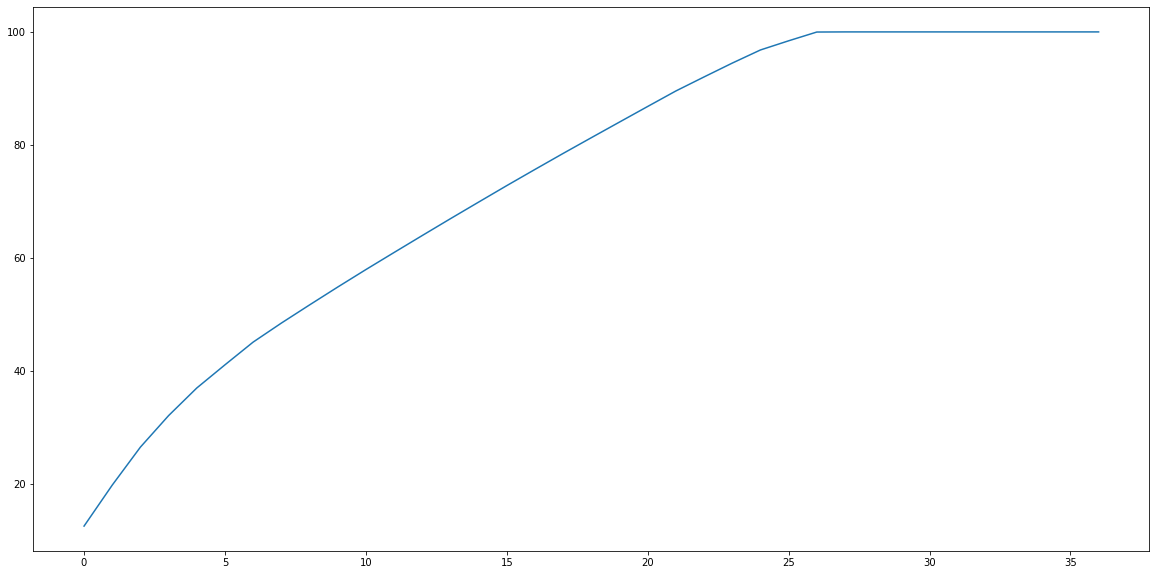

In [252]:
plt.plot(var_report['CumSum']);

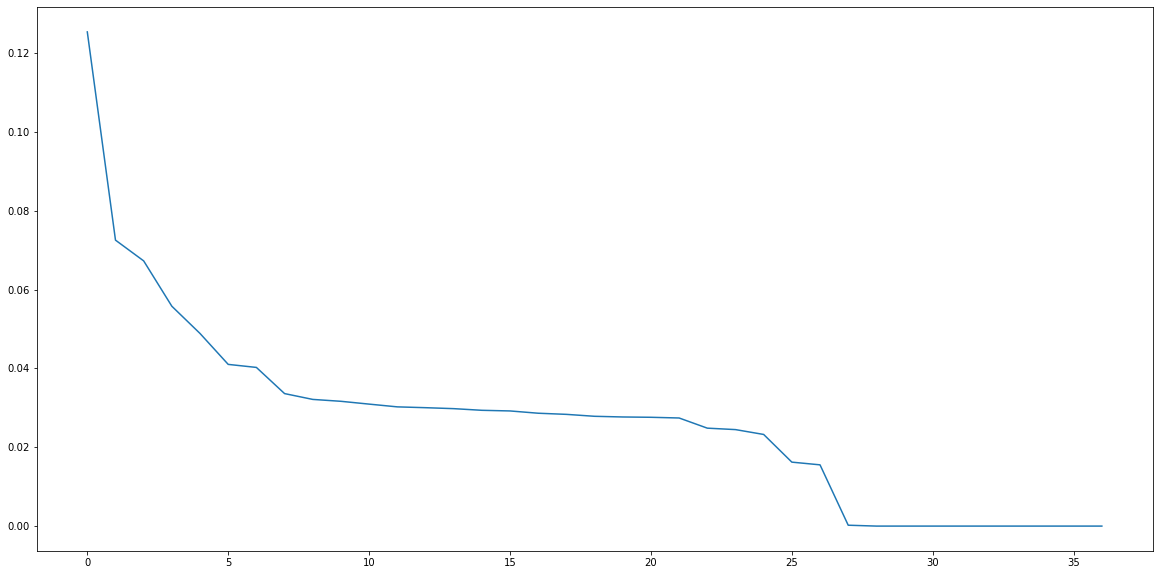

In [253]:
# let see it from another perspective
plt.plot(pca.explained_variance_ratio_)

In [352]:
#keep 25 components
pca_scaled_train = pca_scaled_counter_train.iloc[:,0:25]
pca_scaled_test = pca_scaled_counter_test.iloc[:,0:25]

In [353]:
pca_scaled_test.shape, pca_scaled_train.shape

((1364, 25), (5454, 25))

### Some exploration of train data set after standardizing data

IndexError: index 8 is out of bounds for axis 0 with size 8

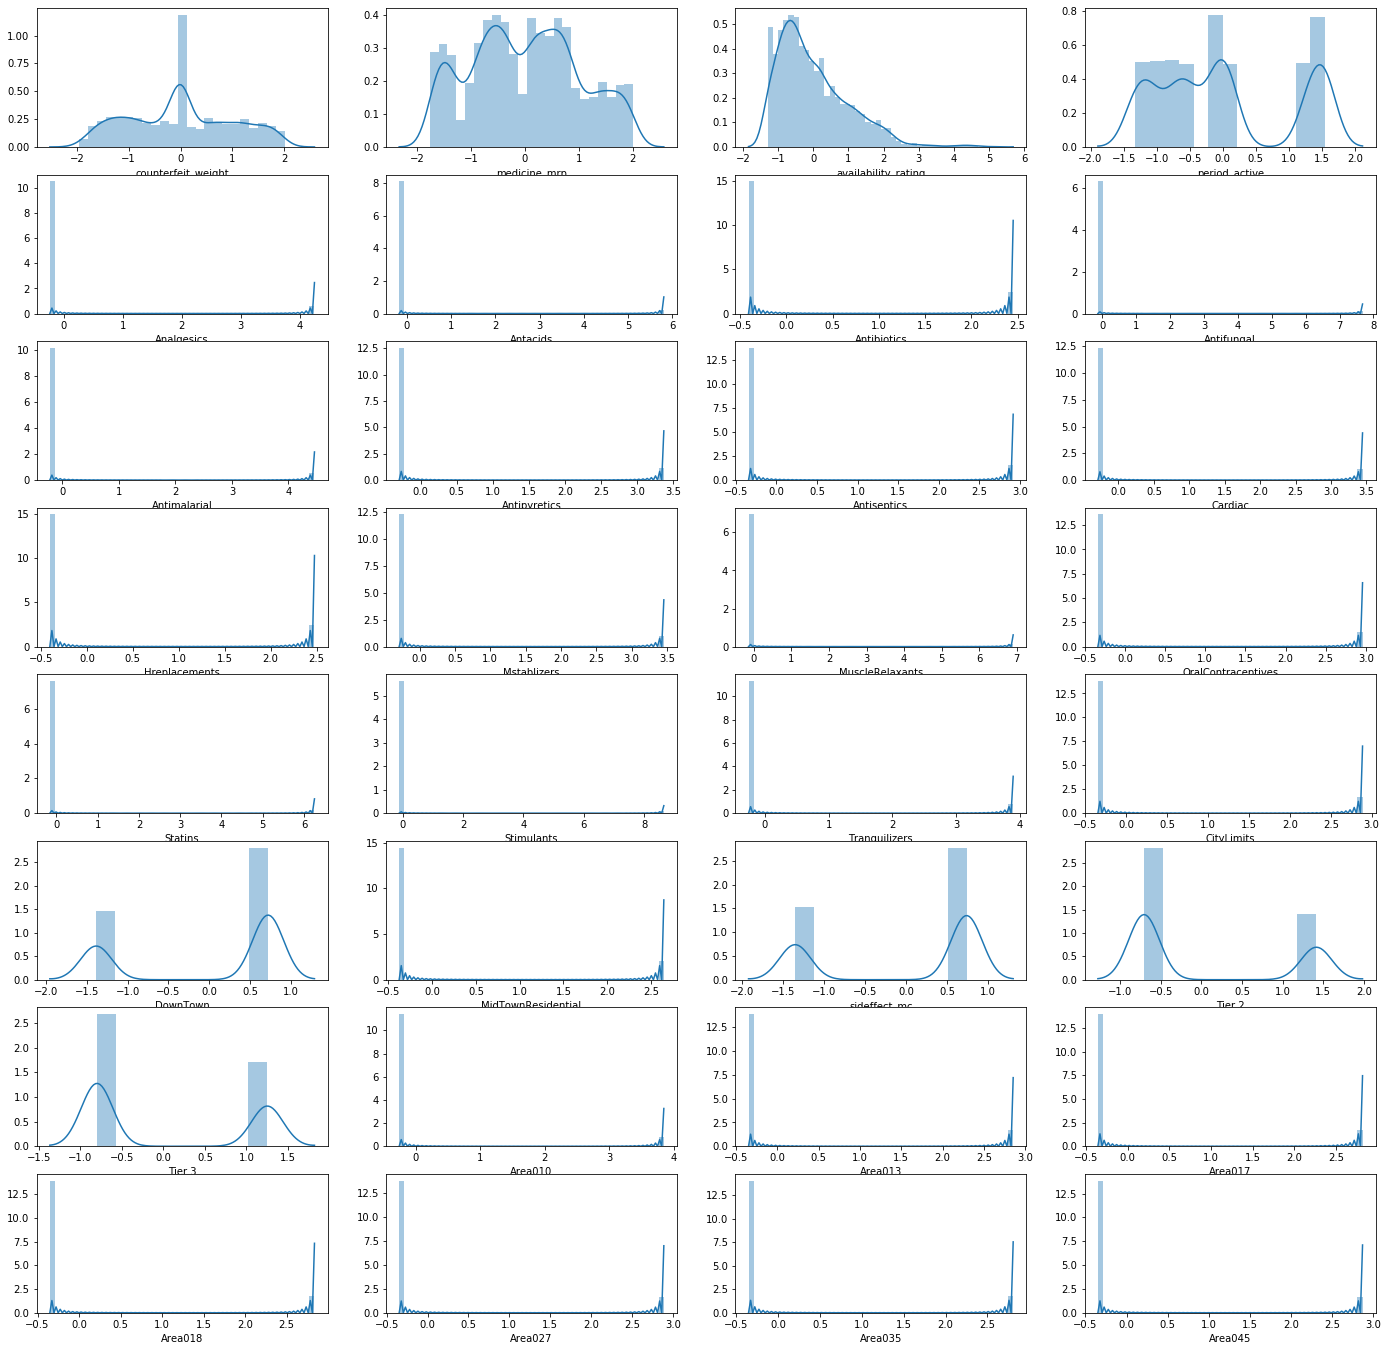

In [256]:
#Distribution of training data
fig, axs = plt.subplots(8, 4, figsize=(24,24))
for ix, col in enumerate(scaled_counter_train.columns):
    p0 = ix // 4
    p1 = ix % 4
    sns.distplot(scaled_counter_train[col], ax = axs[p0, p1])
    axs[p0, p1].set(xlabel=col)

In [ ]:
#features relationship with target: counterfeit sales figures
#
fig, axs = plt.subplots(4, 8, figsize=(20, 20))
for ix, feature in enumerate(scaled_counter_train.columns):
    p0 = ix // 8
    p1 = ix % 8
    axs[p0, p1].scatter(scaled_counter_train[feature], np.log(sales_figures))
    axs[p0, p1].set(xlabel=feature )


There is not much features relationship with the sales figure other than medicine_mrp which is somewhat positive. That is the rise in medicine mrp leads to increase in sales figures of counterfeit drugs. This should be further investigated

## Modeling
Under model building, we would adopt the iterative approach. We would build a basic model with a simple algorithm and evaluate performance therefrom accordingly. Then we would build a couple of 'out of the box models',evaluate the performance of these model and subsequently pick the two models with highest performance  metrics. We would then carryout hyper-parameter tuning of the two models to improve performance to satisfaction. This is further broken down below:

Basic  Model:
* Linear Regression

Out of the box model:
* Support Vector Machine
* Naive Bayes
* KN-Neighbor
* Decision Tree
* Random Forest

* Xgboost


### Basic/Simple Model
**Linear Regression**
* Linear regression, simply put is about extracting a mathematical equation from the data,which explains how the variable of interest, in our current case, the counterfeit sales figure, is affected by other variables in the data.

Mathematical foundation
* Multiple Linear regression: 
$\displaystyle Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \cdots + \beta_n X_n$

$\displaystyle\beta_1 = \frac {\Sigma( x - \bar{x})(y - \bar{y})}{\Sigma( x  -\bar{x})^2}$ $\to$ $\displaystyle\beta_1 = 
\frac{\Sigma xy -\frac{\Sigma x\Sigma y}{n}}{\Sigma x^2 - \frac{(\Sigma x)^2}{n}}$  
$\beta_0 = \bar{y}-\beta_1\bar{x}$

The ultimate goal is to minimize the error : $\displaystyle\sum_{i = 0}^n(Y - \beta_0 - \beta_1 X)^2$

In [269]:
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer

In [294]:
#create custom score
def cust_score(y_true,y_pred):
    foo =  mean_absolute_error(y_true,y_pred)
    return foo

special_score = make_scorer(cust_score,greater_is_better= True)


In [297]:
#Build a baseline model with the pure version of the data free from scaling and pca
# we would be using a unique scoring metric which is 1-(mean absolute error/1660)
kf = KFold(n_splits=5, random_state=42, shuffle=True)
X = train_counter_w_o_spca.as_matrix()
Y = np.log1p(sales_figures).values.ravel()
X_test = test_counter_w_o_spca.as_matrix()
model = LinearRegression()
scores = cross_val_score(model, X, Y, cv=kf, scoring= special_score)
print('MAE score - Linear Regression:', scores.mean())
print('Customise score(1-MAE/1660) - Linear Regression:',scores)



MAE score - Linear Regression: 0.3673596754724141
Customise score(1-MAE/1660) - Linear Regression: [0.36411827 0.38338016 0.36342107 0.35732728 0.3685516 ]


In [280]:
model.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [281]:
syu = model.predict(X_test)

In [283]:
y_p = np.expm1(syu)
y_p


array([ 195.2016251 , 1072.0851418 , 2827.68036085, ..., 1020.78730352,
       4589.49608418,  943.25606612])

In [284]:
mae = mean_absolute_error(y_test,y_p)

In [286]:
1-mae/1660

0.5414314531106585

In [260]:
# manual cross validation procedure- with same Mean Absolute Error results
from sklearn.model_selection import KFold
counter = 0
for trainIdx, valIdx in KFold(n_splits = 5, random_state = 42, shuffle=True).split(X,Y):
    print('Running for fold:', counter)
    X_train, y_train, X_val, y_val = X[trainIdx, :], Y[trainIdx], X[valIdx, :], Y[valIdx]
    
    model = LinearRegression(fit_intercept=True, normalize=False)
    model.fit(X_train, y_train)
    predy_train = model.predict(X_train)
    mae = 1-(mean_absolute_error(y_train, predy_train)/1660)
    r2 = r2_score(y_train,predy_train)
    print('mae',mae)
    print('r2:', r2)
    predy_val = model.predict(X_val)
    mae_val = 1-(mean_absolute_error(y_val,predy_val)/1660)
    print('val mae:', mae_val.mean())
    print('val R2:', r2)
    
    counter += 1


Running for fold: 0
mae 0.9997791243835288
r2: 0.7081485288154695
val mae: 0.999780475754473
val R2: 0.7081485288154695
Running for fold: 1
mae 0.9997829000688448
r2: 0.7188724395884871
val mae: 0.9997688496484194
val R2: 0.7188724395884871
Running for fold: 2
mae 0.9997797598229599
r2: 0.7087251253759399
val mae: 0.9997808897319262
val R2: 0.7087251253759399
Running for fold: 3
mae 0.999778202269424
r2: 0.7064874208128116
val mae: 0.9997845790977148
val R2: 0.7064874208128116
Running for fold: 4
mae 0.9997806047139729
r2: 0.7176110270777647
val mae: 0.999777786714947
val R2: 0.7176110270777647


### Out-of-the-box Models
As we earlier said we would build our model using the other versions of our data with five other algorithms and subsequently pick the two best in terms of performance for further tuning and processing.


In [305]:
scaled_train = scaled_counter_train.as_matrix()
pca_scaled_train = pca_scaled_counter_train.as_matrix()
kf = KFold(n_splits=5, shuffle=True, random_state=42)
Y_train = np.log1p(sales_figures).values.ravel()

In [299]:
#from sklearn.metrics import make_scorer

In [300]:
# make a function of the unique evaluation method

# def adj_mae(y_true,y_pred):
#     norm = mean_absolute_error(y_true, y_pred)
#     return 1-(norm/1660)

# mea_scorer = make_scorer(adj_mae, greater_is_better=True)


In [301]:
X_variants = [scaled_train, pca_scaled_train]
X_names = ['X with scaling only', 'X with pca']
for train_X, X_name in zip(X_variants, X_names):
    print('Data:', X_name)
    
    decision_tree = DecisionTreeRegressor()
    decision_tree_score = cross_val_score(decision_tree, train_X, Y_train, cv=kf, scoring=special_score)
    print('Mean MAE Score - Decision Trees:', decision_tree_score.mean())
    
    random_forest = RandomForestRegressor()
    random_forest_score = cross_val_score(random_forest, train_X, Y_train, cv=kf, scoring= special_score)
    print('Mean MAE Score - Random Forest:', random_forest_score.mean())
    
    #naive_bayes = GaussianNB()
    #naive_bayes_score = cross_val_score(naive_bayes, train_X, Y, cv=5, scoring='neg_mean_absolute_error')
    #print('Mean MEA Score- Naive Bayes:', naive_bayes_score.mean())
    
    knn = KNeighborsRegressor()
    knn_score = cross_val_score(knn, train_X, Y_train, cv=kf, scoring= special_score)
    print('Mean MAE Score - KNN:', knn_score.mean())

Data: X with scaling only
Mean MAE Score - Decision Trees: 0.5051346211827918
Mean MAE Score - Random Forest: 0.3881356885345689
Mean MAE Score - KNN: 0.44986131292828435
Data: X with pca
Mean MAE Score - Decision Trees: 0.5394838471653642
Mean MAE Score - Random Forest: 0.40495627932515
Mean MAE Score - KNN: 0.44986131292828435


### Evaluation
From the results above, since our metric is mean absolute error, the lower would be the better. To this end we can see that only Random Forest using the scaled version of our data has the lowest score which is an  improvement on our base model.

We would channel our effort to improve on these scores by fine tunning the hyper-parameters of the Linear regression and Random forest algorithms alternatively we may take a critical look at our features for possible re-engineering. We would have verified our performance on the test portion of the data if we had the target variable therein.Meanwhile we can rely on the performance from our validation portion of data through cross validation.

It is common knowledge that building models and applying algorithms is not a one size fit all scenario. This is the logic behind trying different model and the aim is really to see which model is better at this particular data at hand. To this end we would have to reconsider our earlier decision of picking two of the the best performing-in this case, the algorithm that reduces our Mean Absolute error the most- out of the bag models algorithms. From the result thus far we shall go ahead and fine tune the hyper-parameters of  the Linear regression and the Random Forest because the models built using these algorithms appears to produce results that are close to our objective of reducing the mean absolute error.


### Hyper-parameter tuning for Linear Regression and Random Forest

In [302]:
# Fine tune alpha hyper-parameter for linear regression
X_scale = scaled_counter_train.as_matrix()

best_alpha = None
best_mae = None
for alpha in [1e-6,1e-5,1e-4, 1e-3, 1e-2,1e-1, 1., 10., 1000.]:
    print('Training Linear model with L2 regularization for alpha=', alpha)
    counter = 0
    all_fold_mae = []
    rtwo_com = []
    
    for trainidx, validx in KFold(n_splits=5, random_state= 42).split(X_scale, Y):
        print('Running fold:', counter)
        X_train, y_train, X_val, y_val = X_scale[trainidx, :], Y[trainidx], X_scale[validx, :], Y[validx]
        
    
        #trainthe model
        model = Ridge(fit_intercept=True, normalize=False,alpha=alpha)
        model.fit(X_train, y_train)
    
        pred_train = model.predict(X_train)
    
        mae = mean_absolute_error(y_train, pred_train)
        #rtwo_score = r2_score(y_train, pred_train)
    
        pred_val = model.predict(X_val)
    
        mae = mean_absolute_error(y_val, pred_val)
        #rtwo_score = r2_score(np.exp(y_val),np.exp(pred_val))
        counter += 1
    
        all_fold_mae.append(mae)
        #rtwo_com.append(rtwo_score)
    
        averagemae = np.mean(all_fold_mae)
        #thertwo = np.mean(rtwo_com)
        #print('checking the r score =', thertwo)
        
        print('Avg CV mae', averagemae)
    
        if best_mae is None:
            best_alpha, best_mae = alpha, averagemae
        elif best_mae > averagemae:
            best_alpha, best_mae = alpha, averagemae
    
        print('Best alpha:', best_alpha)
        print('Best mae:', best_mae)
        
    
    



Training Linear model with L2 regularization for alpha= 1e-06
Running fold: 0
Avg CV mae 0.36516355891784014
Best alpha: 1e-06
Best mae: 0.36516355891784014
Running fold: 1
Avg CV mae 0.36677912137026236
Best alpha: 1e-06
Best mae: 0.36516355891784014
Running fold: 2
Avg CV mae 0.36832133382290366
Best alpha: 1e-06
Best mae: 0.36516355891784014
Running fold: 3
Avg CV mae 0.36531281036507063
Best alpha: 1e-06
Best mae: 0.36516355891784014
Running fold: 4
Avg CV mae 0.3673547271480281
Best alpha: 1e-06
Best mae: 0.36516355891784014
Training Linear model with L2 regularization for alpha= 1e-05
Running fold: 0
Avg CV mae 0.36516355894870595
Best alpha: 1e-06
Best mae: 0.36516355891784014
Running fold: 1
Avg CV mae 0.3667791213471551
Best alpha: 1e-06
Best mae: 0.36516355891784014
Running fold: 2
Avg CV mae 0.36832133382046717
Best alpha: 1e-06
Best mae: 0.36516355891784014
Running fold: 3
Avg CV mae 0.3653128103641616
Best alpha: 1e-06
Best mae: 0.36516355891784014
Running fold: 4
Avg CV m

In [306]:
best_mae, best_alpha

(0.36516355891784014, 1e-06)

In [307]:
test_model = Ridge(alpha=best_alpha)
test_model.fit(X_scale,Y)

Ridge(alpha=1e-06, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [ ]:
#X_testy = scaled_counter_test.as_matrix()

In [310]:
predo_test = test_model.predict(scaled_counter_test)
defy = np.expm1(predo_test)
defy
#predo_test = np.exp(predo_test)
#pd.DataFrame(predo_test).to_csv('ridge_model.csv', index= False)

array([ 211.05921922, 1109.89149385, 2907.17121976, ..., 1040.69553684,
       4752.80725496,  967.79111006])

In [312]:
mae2 = mean_absolute_error(y_test,defy)
1-(mae2/1660)

0.5431468178049561

In [313]:
# hyper-parameter tunning for random forest
# check cross validation
foldmae = []
for trainIdx, ValidIdx in KFold(n_splits=10, random_state=42).split(X_scale, Y):
    X_train, y_train =  X_scale[trainIdx, :], Y[trainIdx]
    X_val, y_val =  X_scale[ValidIdx, :], Y[ValidIdx]
    
    model = RandomForestRegressor(n_estimators=100)

    #on train set
    model.fit(X_train, y_train)
    pred_train = model.predict(X_train)
    mean_abso = mean_absolute_error(y_train, pred_train)
    
    #on valid. set
    pred_val = model.predict(X_val)
    
    mean_abso = mean_absolute_error(y_val, pred_val)
    
    foldmae.append(mean_abso)
    print('val MAE:',mean_absolute_error(y_val, pred_val))
    print('Train MAE:',mean_absolute_error(y_train, pred_train))
    print('Mean MAE ---- Random Forest', np.mean(foldmae))
    
    
    


val MAE: 0.3921044903038631
Train MAE: 0.13921152330605854
Mean MAE ---- Random Forest 0.3921044903038631
val MAE: 0.3619557087284726
Train MAE: 0.1405480707436401
Mean MAE ---- Random Forest 0.37703009951616784
val MAE: 0.3575821268179574
Train MAE: 0.1412324284995389
Mean MAE ---- Random Forest 0.37054744195009776
val MAE: 0.3869273953420231
Train MAE: 0.13932558771806872
Mean MAE ---- Random Forest 0.3746424302980791
val MAE: 0.36788094613214967
Train MAE: 0.1403946823881546
Mean MAE ---- Random Forest 0.3732901334648932
val MAE: 0.39415751258112247
Train MAE: 0.13889136839507243
Mean MAE ---- Random Forest 0.3767680299842648
val MAE: 0.3796730707182613
Train MAE: 0.13881176530622463
Mean MAE ---- Random Forest 0.3771830358034071
val MAE: 0.3689682917648618
Train MAE: 0.141120671238861
Mean MAE ---- Random Forest 0.3761561927985889
val MAE: 0.38202058465753
Train MAE: 0.13891935890768722
Mean MAE ---- Random Forest 0.37680779189402686
val MAE: 0.3811135982777151
Train MAE: 0.1389119

Interesting results but it's obvious that it has over-fitting written all over it as there are significant differences between the validation results and the train results. Would need to carry out hyper-parameter tunning to see whether our results would improve i.e reduce the MAE

In [84]:
#Let test the result with the test data set before carrying out the hyper-parameter tuning 
# rf_model = RandomForestRegressor(n_estimators=100)
# rf_model.fit(X_scale, Y)
# pred_test = rf_model.predict(scaled_counter_test)
# pred_test = np.exp(pred_test)
# pd.DataFrame(pred_test).to_csv('rf100def.csv',index=False) #0.507-(1-MAE/1660);goal >= 0.6

In [354]:
# Random forest Hyper Parameters
num_estimator_list = [5,10,12,15, 20]
max_depth_list = [2, 3, 4, 5,6,7,8,9,10]
min_samples_split_list = [2, 10, 20, 30, 40, 50]
max_features_list = [0.3, 0.5, 0.7, 0.9,0.10,0.11,0.12,0.15]

In [355]:
import itertools

In [356]:
# get the length of the grid
len(list(itertools.product(num_estimator_list, max_depth_list, min_samples_split_list, max_features_list)))

2160

In [357]:
best_params = None
best_score = None

for n_estimators, max_depth, min_samples_split, max_features in itertools.product(num_estimator_list, max_depth_list, min_samples_split_list, max_features_list):
    print("Evaluation max_depth, min_samples_split, max_features:", n_estimators, max_depth, min_samples_split, max_features)
    fold_wise_scores = []
    
    for train_ind, valid_ind in KFold(n_splits=10, random_state= 42).split(X_scale, Y):
        X_train, y_train = X_scale[train_ind, :], Y[train_ind]
        valid_X, valid_y = X_scale[valid_ind, :], Y[valid_ind]
        
        model = RandomForestRegressor(n_estimators=n_estimators,
                                      max_depth=max_depth,
                                      min_samples_split=min_samples_split,
                                      max_features=max_features)
        model.fit(X_train,y_train)
        
        #on train:
        preddy_train = model.predict(X_train)
        print('Train MAE:', mean_absolute_error(y_train, preddy_train))
        
        #on validation set
        
        predy_val = model.predict(valid_X)
        print('Valid MAE:', mean_absolute_error(valid_y, predy_val))
        
        #use validation scores only
        fold_wise_scores.append(mean_absolute_error(valid_y, predy_val))
        avg_Mae_score = np.mean(fold_wise_scores)
        if best_score is None:
            best_score = avg_Mae_score
            best_params = {'num_estimator':n_estimators, 'max_depth': max_depth, 'min_samples_split':min_samples_split, 'max_features': max_features}
            print('best score and params found', best_score, best_params)
        elif best_score > avg_Mae_score:
            best_score = avg_Mae_score
            best_params = {'num_estimator':n_estimators, 'max_depth':max_depth, 'min_samples_split': min_samples_split, 'max_features': max_features}
            print('Best score and params found', best_score, best_params)

Evaluation max_depth, min_samples_split, max_features: 5 2 2 0.3
Train MAE: 0.47952393184459374
Valid MAE: 0.5072633004942145
best score and params found 0.5072633004942145 {'num_estimator': 5, 'max_depth': 2, 'min_samples_split': 2, 'max_features': 0.3}
Train MAE: 0.531610397184489
Valid MAE: 0.5330359022979365
Train MAE: 0.486994875281858
Valid MAE: 0.4938647495058539
Train MAE: 0.48707151094492485
Valid MAE: 0.48861425698426636
Best score and params found 0.5056945523205678 {'num_estimator': 5, 'max_depth': 2, 'min_samples_split': 2, 'max_features': 0.3}
Train MAE: 0.492197063835429
Valid MAE: 0.4683902668560244
Best score and params found 0.4982336952276591 {'num_estimator': 5, 'max_depth': 2, 'min_samples_split': 2, 'max_features': 0.3}
Train MAE: 0.5131513790891988
Valid MAE: 0.528646889072534
Train MAE: 0.5062044874743098
Valid MAE: 0.5135180096664974
Train MAE: 0.5631805628607262
Valid MAE: 0.5601577419998568
Train MAE: 0.501296148539471
Valid MAE: 0.49015330358027726
Train MAE

Train MAE: 0.4690284015101787
Valid MAE: 0.45528078856216
Train MAE: 0.5154090244014419
Valid MAE: 0.5072679059835695
Train MAE: 0.4977807785571224
Valid MAE: 0.5049858986837172
Evaluation max_depth, min_samples_split, max_features: 5 2 10 0.5
Train MAE: 0.48818146054216704
Valid MAE: 0.5066119270263817
Train MAE: 0.43423239878283454
Valid MAE: 0.43442957009746674
Train MAE: 0.46715861341461895
Valid MAE: 0.47262064411416893
Train MAE: 0.49425693199471804
Valid MAE: 0.48717814321056185
Train MAE: 0.49030497635765363
Valid MAE: 0.4765488047076641
Train MAE: 0.4792005389926349
Valid MAE: 0.5014792076052469
Train MAE: 0.4527986119944403
Valid MAE: 0.4479522576885332
Train MAE: 0.4643369708112112
Valid MAE: 0.45252696233744816
Train MAE: 0.44726743967018867
Valid MAE: 0.43699372480815046
Train MAE: 0.4755966334864134
Valid MAE: 0.4769443177018575
Evaluation max_depth, min_samples_split, max_features: 5 2 10 0.7
Train MAE: 0.47009351583895087
Valid MAE: 0.4928641107187883
Train MAE: 0.43782

Train MAE: 0.6540470906459499
Valid MAE: 0.6452079672638311
Evaluation max_depth, min_samples_split, max_features: 5 2 20 0.11
Train MAE: 0.5914540008928438
Valid MAE: 0.6262635018225281
Train MAE: 0.5796932023603922
Valid MAE: 0.5730786608950641
Train MAE: 0.5865765457705623
Valid MAE: 0.5975811473607504
Train MAE: 0.5791617480186587
Valid MAE: 0.570904547602539
Train MAE: 0.5918441283635518
Valid MAE: 0.5706199604892613
Train MAE: 0.6315189949040128
Valid MAE: 0.6433538080194675
Train MAE: 0.5928757859457123
Valid MAE: 0.6055922499176423
Train MAE: 0.5693396468025267
Valid MAE: 0.5643899260249563
Train MAE: 0.5501326150487226
Valid MAE: 0.531752541792632
Train MAE: 0.6147948463182916
Valid MAE: 0.6253270418043221
Evaluation max_depth, min_samples_split, max_features: 5 2 20 0.12
Train MAE: 0.5771608998132908
Valid MAE: 0.6168911952349423
Train MAE: 0.5681891034149628
Valid MAE: 0.5556467477219323
Train MAE: 0.5540881025951472
Valid MAE: 0.5618357470802923
Train MAE: 0.603964531638951

Train MAE: 0.4746869566910672
Valid MAE: 0.4772788962687777
Train MAE: 0.471817825370557
Valid MAE: 0.47265100513034586
Train MAE: 0.5111064300947485
Valid MAE: 0.4906314189280635
Train MAE: 0.4731107596092241
Valid MAE: 0.49579484645020017
Train MAE: 0.47451438835885457
Valid MAE: 0.4740058772273143
Train MAE: 0.46915679607957
Valid MAE: 0.45961539940399726
Train MAE: 0.46949982347272484
Valid MAE: 0.45793143545253717
Train MAE: 0.45073272659087593
Valid MAE: 0.4579416713208743
Evaluation max_depth, min_samples_split, max_features: 5 2 40 0.7
Train MAE: 0.43307223478143536
Valid MAE: 0.4558329544245554
Train MAE: 0.43107999887511905
Valid MAE: 0.43251748507489673
Train MAE: 0.44669830095878477
Valid MAE: 0.4422299745414174
Train MAE: 0.48091978091962917
Valid MAE: 0.47606390759682127
Train MAE: 0.4214220261683878
Valid MAE: 0.41129050643532505
Train MAE: 0.4191732766249912
Valid MAE: 0.4472456637158947
Train MAE: 0.42199759471523435
Valid MAE: 0.41717938579143726
Train MAE: 0.46312798

Train MAE: 0.5711989575059215
Valid MAE: 0.5874405101601746
Train MAE: 0.5878887432654739
Valid MAE: 0.5938482654905304
Train MAE: 0.601546609594306
Valid MAE: 0.599759731400901
Train MAE: 0.5474255852876838
Valid MAE: 0.5264175641603203
Train MAE: 0.5624155060298581
Valid MAE: 0.5735651635688315
Evaluation max_depth, min_samples_split, max_features: 5 2 50 0.15
Train MAE: 0.5603372889250917
Valid MAE: 0.5929762470567539
Train MAE: 0.5983104949174637
Valid MAE: 0.5894487073831006
Train MAE: 0.5730920156038681
Valid MAE: 0.5850596189005355
Train MAE: 0.5658542416087504
Valid MAE: 0.5636430461840497
Train MAE: 0.5914193296827681
Valid MAE: 0.5753648584815844
Train MAE: 0.5582102335420174
Valid MAE: 0.5781773207040131
Train MAE: 0.5813883607163695
Valid MAE: 0.5904834750001912
Train MAE: 0.47970951509870424
Valid MAE: 0.45870173055617214
Train MAE: 0.5500163561406893
Valid MAE: 0.526314725852805
Train MAE: 0.5324477568196513
Valid MAE: 0.5361879873384204
Evaluation max_depth, min_samples_

Train MAE: 0.39346540637680727
Valid MAE: 0.38404705498354186
Train MAE: 0.39450002637203396
Valid MAE: 0.4068812599780452
Train MAE: 0.4111548805951201
Valid MAE: 0.39802741542621217
Train MAE: 0.4071383147169141
Valid MAE: 0.42683755652748606
Train MAE: 0.3973392266370203
Valid MAE: 0.3937116358450382
Train MAE: 0.4051891409201923
Valid MAE: 0.3876587642192401
Train MAE: 0.38745570531015994
Valid MAE: 0.38553404540236247
Train MAE: 0.3980283719397489
Valid MAE: 0.3972283866001646
Evaluation max_depth, min_samples_split, max_features: 5 3 10 0.7
Train MAE: 0.38360146879631934
Valid MAE: 0.4026191784894501
Train MAE: 0.38448870001150726
Valid MAE: 0.3791261824972581
Train MAE: 0.3976127144610732
Valid MAE: 0.3933001935294803
Train MAE: 0.3821281039524754
Valid MAE: 0.4031584229740344
Train MAE: 0.38743543161956934
Valid MAE: 0.3736497810938617
Train MAE: 0.3809637945336264
Valid MAE: 0.39361692283675004
Train MAE: 0.3884482579484613
Valid MAE: 0.3876608719699075
Train MAE: 0.3795692954

Train MAE: 0.5411887254050961
Valid MAE: 0.5525354361236404
Evaluation max_depth, min_samples_split, max_features: 5 3 20 0.12
Train MAE: 0.5843813666149934
Valid MAE: 0.6182861293776952
Train MAE: 0.5326554787031652
Valid MAE: 0.5362329900205726
Train MAE: 0.5470702889216188
Valid MAE: 0.5530905596644361
Train MAE: 0.5177108462611023
Valid MAE: 0.5084466551502211
Train MAE: 0.49924825687685687
Valid MAE: 0.482637520398874
Train MAE: 0.5540397324714721
Valid MAE: 0.5770092926003741
Train MAE: 0.5471425182063588
Valid MAE: 0.5638877478080061
Train MAE: 0.48658900426981866
Valid MAE: 0.47486157195312007
Train MAE: 0.5436450331352025
Valid MAE: 0.5337913538120624
Train MAE: 0.49712938816484803
Valid MAE: 0.5017631672394268
Evaluation max_depth, min_samples_split, max_features: 5 3 20 0.15
Train MAE: 0.5500106644664192
Valid MAE: 0.5696102736981651
Train MAE: 0.5697072847984043
Valid MAE: 0.5605681964194003
Train MAE: 0.4661000312968235
Valid MAE: 0.4732572006093336
Train MAE: 0.4506186548

Train MAE: 0.37856715148129383
Valid MAE: 0.3865964177516908
Train MAE: 0.39565021738384143
Valid MAE: 0.39078202422790187
Train MAE: 0.38565705211637497
Valid MAE: 0.40461512546519
Train MAE: 0.4100160834677407
Valid MAE: 0.4068496243376715
Train MAE: 0.38560542914378626
Valid MAE: 0.3699618854668096
Train MAE: 0.3726202743499572
Valid MAE: 0.3785627018979166
Train MAE: 0.3859385599703216
Valid MAE: 0.3901141230089356
Evaluation max_depth, min_samples_split, max_features: 5 3 40 0.9
Train MAE: 0.3757547218884594
Valid MAE: 0.3932703823721958
Train MAE: 0.382137801114719
Valid MAE: 0.3681070978652403
Train MAE: 0.38119980632584155
Valid MAE: 0.36902478073759176
Best score and params found 0.37680075365834265 {'num_estimator': 5, 'max_depth': 3, 'min_samples_split': 40, 'max_features': 0.9}
Train MAE: 0.3753733288633988
Valid MAE: 0.39513882442385323
Train MAE: 0.3738661291498266
Valid MAE: 0.36800411180414394
Train MAE: 0.37184614634588453
Valid MAE: 0.3846587744885595
Train MAE: 0.373

Train MAE: 0.49939155474081326
Valid MAE: 0.49252856668798756
Train MAE: 0.5034908224096003
Valid MAE: 0.48648589106382134
Train MAE: 0.5172344228526264
Valid MAE: 0.5326812423189361
Train MAE: 0.5208157636955786
Valid MAE: 0.5230138170693921
Train MAE: 0.5246341398493517
Valid MAE: 0.5217854777460821
Train MAE: 0.5204764861243651
Valid MAE: 0.5110229744062761
Train MAE: 0.4901523260022408
Valid MAE: 0.4981756177242367
Evaluation max_depth, min_samples_split, max_features: 5 4 2 0.3
Train MAE: 0.4118807807547411
Valid MAE: 0.43099769000870586
Train MAE: 0.4069290360725921
Valid MAE: 0.4173909535504916
Train MAE: 0.42859341225947534
Valid MAE: 0.42830919126598843
Train MAE: 0.4644992238479037
Valid MAE: 0.46247822815349854
Train MAE: 0.3919744184350595
Valid MAE: 0.37723762238390274
Train MAE: 0.37869596386445314
Valid MAE: 0.39801894122169607
Train MAE: 0.4296848396875197
Valid MAE: 0.42947677661665123
Train MAE: 0.401822177877985
Valid MAE: 0.3921883845827906
Train MAE: 0.408001294905

Train MAE: 0.3630620829858069
Valid MAE: 0.37300205835117295
Evaluation max_depth, min_samples_split, max_features: 5 4 10 0.9
Train MAE: 0.35804855097832716
Valid MAE: 0.37719524686372796
Train MAE: 0.3607452679138167
Valid MAE: 0.35369407286661364
Train MAE: 0.3587764105210593
Valid MAE: 0.35643473985656704
Train MAE: 0.3539474298262906
Valid MAE: 0.37069083099303607
Train MAE: 0.35685876326692645
Valid MAE: 0.35174933368484895
Train MAE: 0.3549632137566153
Valid MAE: 0.36978053923984644
Train MAE: 0.355737461948491
Valid MAE: 0.35826275082076825
Train MAE: 0.3573244360628736
Valid MAE: 0.35302796717437557
Train MAE: 0.3548640696643553
Valid MAE: 0.37072757137651496
Train MAE: 0.3557698112182485
Valid MAE: 0.37004424846921363
Evaluation max_depth, min_samples_split, max_features: 5 4 10 0.1
Train MAE: 0.48750541158349275
Valid MAE: 0.5162479451256867
Train MAE: 0.5246918846796657
Valid MAE: 0.5148178661948776
Train MAE: 0.5116636679321662
Valid MAE: 0.5165068966507779
Train MAE: 0.56

Train MAE: 0.4683063718377118
Valid MAE: 0.46797780122381466
Train MAE: 0.48278225978748424
Valid MAE: 0.4890076278132406
Evaluation max_depth, min_samples_split, max_features: 5 4 30 0.3
Train MAE: 0.39386003115262763
Valid MAE: 0.414571883270501
Train MAE: 0.44792479083332176
Valid MAE: 0.44438941289779615
Train MAE: 0.39703726156713276
Valid MAE: 0.39019095375151946
Train MAE: 0.41811489815324004
Valid MAE: 0.42306941384749297
Train MAE: 0.41507453844768594
Valid MAE: 0.40781352591044634
Train MAE: 0.385134611555158
Valid MAE: 0.40732007524979247
Train MAE: 0.4077904898772923
Valid MAE: 0.40677778495816175
Train MAE: 0.38684859121013615
Valid MAE: 0.3832872439097897
Train MAE: 0.39687904373544103
Valid MAE: 0.4021528118005395
Train MAE: 0.41763689650739594
Valid MAE: 0.42589367101803793
Evaluation max_depth, min_samples_split, max_features: 5 4 30 0.5
Train MAE: 0.367680326704356
Valid MAE: 0.3898936507803735
Train MAE: 0.3782129364462409
Valid MAE: 0.3764504785647603
Train MAE: 0.3

Train MAE: 0.5260601201728631
Valid MAE: 0.5099277485108364
Train MAE: 0.511106207040641
Valid MAE: 0.4966240150898077
Train MAE: 0.5111956327733067
Valid MAE: 0.5345851093250504
Train MAE: 0.49009642245742074
Valid MAE: 0.4911587053072816
Train MAE: 0.5312076484447655
Valid MAE: 0.5271436555436598
Train MAE: 0.4824084863918182
Valid MAE: 0.4863832824234589
Train MAE: 0.46675645918989905
Valid MAE: 0.47777269740172623
Evaluation max_depth, min_samples_split, max_features: 5 4 40 0.11
Train MAE: 0.4675371485325765
Valid MAE: 0.5039363469132107
Train MAE: 0.48981976416750045
Valid MAE: 0.48159757877641085
Train MAE: 0.5147373312507738
Valid MAE: 0.5242420802176532
Train MAE: 0.5332041788145615
Valid MAE: 0.5340115175312194
Train MAE: 0.43952325462650194
Valid MAE: 0.4233739638576517
Train MAE: 0.5849278357225571
Valid MAE: 0.6016075734889939
Train MAE: 0.5171636731102341
Valid MAE: 0.5192949083190018
Train MAE: 0.49419453608301767
Valid MAE: 0.49838344996976963
Train MAE: 0.5292145925243

Valid MAE: 0.39680429631852343
Train MAE: 0.3784360015805499
Valid MAE: 0.38880880524597794
Evaluation max_depth, min_samples_split, max_features: 5 5 2 0.5
Train MAE: 0.3523634872440588
Valid MAE: 0.37592507835379657
Train MAE: 0.3705886914641428
Valid MAE: 0.37123999236780203
Train MAE: 0.3840841660190265
Valid MAE: 0.38154678154404187
Train MAE: 0.35789851302894954
Valid MAE: 0.3765175814148734
Train MAE: 0.35426542694551677
Valid MAE: 0.3543487581036667
Train MAE: 0.35759453165701877
Valid MAE: 0.3791408539045437
Train MAE: 0.369421990209215
Valid MAE: 0.3759368182898593
Train MAE: 0.3640796953404949
Valid MAE: 0.3613603016858502
Train MAE: 0.34928132942219386
Valid MAE: 0.3675915645183437
Train MAE: 0.3551863697978044
Valid MAE: 0.36864607775647606
Evaluation max_depth, min_samples_split, max_features: 5 5 2 0.7
Train MAE: 0.3515214946457314
Valid MAE: 0.37230557279192333
Train MAE: 0.3543228896975127
Valid MAE: 0.3487191787742651
Train MAE: 0.35194472495089274
Valid MAE: 0.344958

Train MAE: 0.46868281837733927
Valid MAE: 0.48037099874411365
Evaluation max_depth, min_samples_split, max_features: 5 5 10 0.11
Train MAE: 0.4585948697427839
Valid MAE: 0.4786968123790164
Train MAE: 0.4691358482330811
Valid MAE: 0.47116945775001956
Train MAE: 0.4299909130225226
Valid MAE: 0.4417456378652702
Train MAE: 0.47185946774062637
Valid MAE: 0.46408416133519903
Train MAE: 0.4598107331911417
Valid MAE: 0.4487976465684893
Train MAE: 0.5300038314966248
Valid MAE: 0.5599714134010721
Train MAE: 0.4892269634149545
Valid MAE: 0.501242402139159
Train MAE: 0.46599696368670285
Valid MAE: 0.46295243663702956
Train MAE: 0.5089645511741067
Valid MAE: 0.5065195432525961
Train MAE: 0.4639745250561084
Valid MAE: 0.47238794207789914
Evaluation max_depth, min_samples_split, max_features: 5 5 10 0.12
Train MAE: 0.45012755936154125
Valid MAE: 0.4864160254506521
Train MAE: 0.45839570669815516
Valid MAE: 0.46668709353541066
Train MAE: 0.4419677840202717
Valid MAE: 0.4528719063731039
Train MAE: 0.482

Train MAE: 0.3641255491573373
Valid MAE: 0.3849085286968253
Train MAE: 0.35480779640868715
Valid MAE: 0.3516282740332384
Train MAE: 0.3589473897125174
Valid MAE: 0.35463122505277794
Train MAE: 0.35622859684137914
Valid MAE: 0.3747617704223175
Train MAE: 0.3696516532883804
Valid MAE: 0.35788267615419034
Train MAE: 0.3628820640531792
Valid MAE: 0.3850791721612768
Train MAE: 0.3615903574349596
Valid MAE: 0.36730415711186976
Train MAE: 0.35652849673244263
Valid MAE: 0.35679575199047225
Train MAE: 0.36110818945925016
Valid MAE: 0.37628039057338963
Train MAE: 0.3577249927389232
Valid MAE: 0.3703479395813324
Evaluation max_depth, min_samples_split, max_features: 5 5 30 0.7
Train MAE: 0.352310823272773
Valid MAE: 0.3767580845053751
Train MAE: 0.3593098404270631
Valid MAE: 0.3519903794456689
Train MAE: 0.3569625292245852
Valid MAE: 0.3497674521549544
Train MAE: 0.3501874487688513
Valid MAE: 0.37101485192867917
Train MAE: 0.3528442340243165
Valid MAE: 0.3448989000051324
Train MAE: 0.352979847806

Train MAE: 0.4392107210499786
Valid MAE: 0.43524061171847966
Train MAE: 0.502480875526198
Valid MAE: 0.5024184599491138
Train MAE: 0.4396574266349553
Valid MAE: 0.46047082577242043
Evaluation max_depth, min_samples_split, max_features: 5 5 40 0.12
Train MAE: 0.4733091646363981
Valid MAE: 0.5021265857355697
Train MAE: 0.4570319908563545
Valid MAE: 0.45250719352402996
Train MAE: 0.4505219207241718
Valid MAE: 0.4597690681075922
Train MAE: 0.5027526240475856
Valid MAE: 0.5030247382648259
Train MAE: 0.4400027716938164
Valid MAE: 0.4244416086270675
Train MAE: 0.4406938796079849
Valid MAE: 0.4638040097248757
Train MAE: 0.4746760848456245
Valid MAE: 0.48240629780373623
Train MAE: 0.5463080616670722
Valid MAE: 0.5540502164520974
Train MAE: 0.48135046683859845
Valid MAE: 0.474460661607956
Train MAE: 0.4898605645261853
Valid MAE: 0.5102889227827787
Evaluation max_depth, min_samples_split, max_features: 5 5 40 0.15
Train MAE: 0.4441943962571542
Valid MAE: 0.46605345757070116
Train MAE: 0.411465938

Train MAE: 0.34328177505635027
Valid MAE: 0.3714644004652399
Train MAE: 0.3448214072158536
Valid MAE: 0.34105862958693745
Train MAE: 0.34645675833123907
Valid MAE: 0.34629835920192364
Train MAE: 0.3437594247583815
Valid MAE: 0.37170953668161405
Train MAE: 0.3443716826133296
Valid MAE: 0.3490468094850795
Train MAE: 0.34296174191053486
Valid MAE: 0.3722358443604942
Train MAE: 0.3451966988322497
Valid MAE: 0.35925673870767894
Train MAE: 0.34372943101448944
Valid MAE: 0.350776516644336
Train MAE: 0.34226015183476777
Valid MAE: 0.3694048238309179
Train MAE: 0.34350256126737777
Valid MAE: 0.37099958987435494
Evaluation max_depth, min_samples_split, max_features: 5 6 2 0.9
Train MAE: 0.340685002269529
Valid MAE: 0.3653397709486411
Train MAE: 0.3427403412410054
Valid MAE: 0.34193682858583435
Train MAE: 0.34432441550436954
Valid MAE: 0.34254572771177566
Train MAE: 0.3408279195783797
Valid MAE: 0.3672847709338135
Train MAE: 0.34397092081812486
Valid MAE: 0.3498087006416364
Train MAE: 0.340867143

Train MAE: 0.4384175358146738
Valid MAE: 0.4364856331822025
Train MAE: 0.4158777633554037
Valid MAE: 0.42280953258315856
Train MAE: 0.42510154652613724
Valid MAE: 0.4400988553875335
Evaluation max_depth, min_samples_split, max_features: 5 6 10 0.15
Train MAE: 0.40949228949418254
Valid MAE: 0.4444934595172842
Train MAE: 0.4673534801200019
Valid MAE: 0.4693169600943991
Train MAE: 0.4182162991652691
Valid MAE: 0.42389493944468465
Train MAE: 0.4526903256524638
Valid MAE: 0.45957814198274494
Train MAE: 0.40869805908965795
Valid MAE: 0.39182509052816317
Train MAE: 0.4046270383016841
Valid MAE: 0.42774230374848937
Train MAE: 0.43112926370668875
Valid MAE: 0.4442838972530157
Train MAE: 0.4190549121947168
Valid MAE: 0.4157988149674
Train MAE: 0.4123138142916726
Valid MAE: 0.42557252190300904
Train MAE: 0.396847989942459
Valid MAE: 0.40291489552381315
Evaluation max_depth, min_samples_split, max_features: 5 6 20 0.3
Train MAE: 0.38625076280210585
Valid MAE: 0.41411676057293934
Train MAE: 0.38504

Valid MAE: 0.36572008584606425
Train MAE: 0.3443331500214427
Valid MAE: 0.34158537619292617
Train MAE: 0.3460131958199109
Valid MAE: 0.3396356706476907
Best score and params found 0.34898037756222705 {'num_estimator': 5, 'max_depth': 6, 'min_samples_split': 30, 'max_features': 0.9}
Train MAE: 0.34101643653411867
Valid MAE: 0.3665604181493386
Train MAE: 0.34546540162459005
Valid MAE: 0.3483807348949473
Train MAE: 0.3425840518516942
Valid MAE: 0.368664399952688
Train MAE: 0.3432559784049992
Valid MAE: 0.3587143188173612
Train MAE: 0.3458152128859983
Valid MAE: 0.3501514447955714
Train MAE: 0.34402384267642333
Valid MAE: 0.37478405447119656
Train MAE: 0.3432662935280143
Valid MAE: 0.36928955892497123
Evaluation max_depth, min_samples_split, max_features: 5 6 30 0.1
Train MAE: 0.4656173822186738
Valid MAE: 0.4962523992867516
Train MAE: 0.4519169588529692
Valid MAE: 0.4570548068029613
Train MAE: 0.433194411627049
Valid MAE: 0.4397697401609483
Train MAE: 0.464721495368519
Valid MAE: 0.471388

Train MAE: 0.43537642126867343
Valid MAE: 0.41985601849020754
Train MAE: 0.4320370417963962
Valid MAE: 0.46309919669973626
Train MAE: 0.4227607878948528
Valid MAE: 0.4380123092542155
Train MAE: 0.4639604922247612
Valid MAE: 0.46443354392486685
Train MAE: 0.4156741776989193
Valid MAE: 0.4172776830707634
Train MAE: 0.40482342102299046
Valid MAE: 0.4075723505425177
Evaluation max_depth, min_samples_split, max_features: 5 6 50 0.3
Train MAE: 0.36606574595676844
Valid MAE: 0.3912582307861992
Train MAE: 0.4079802060538033
Valid MAE: 0.40396836669019964
Train MAE: 0.39972779823852844
Valid MAE: 0.40462308110303563
Train MAE: 0.3622074689836569
Valid MAE: 0.38560831294760656
Train MAE: 0.3564472435347979
Valid MAE: 0.3588244464052352
Train MAE: 0.3548247914037208
Valid MAE: 0.3822636664835541
Train MAE: 0.3641983571323518
Valid MAE: 0.3678529428499196
Train MAE: 0.3788900155774329
Valid MAE: 0.37643436830304183
Train MAE: 0.37054177260112986
Valid MAE: 0.3873298213728342
Train MAE: 0.380660845

Train MAE: 0.33374986879616597
Valid MAE: 0.36107169099796527
Train MAE: 0.33526188437942256
Valid MAE: 0.3527325645956001
Train MAE: 0.33197724835895065
Valid MAE: 0.37308658354571206
Train MAE: 0.33291796083436026
Valid MAE: 0.3663583068730012
Evaluation max_depth, min_samples_split, max_features: 5 7 2 0.1
Train MAE: 0.4428496289180321
Valid MAE: 0.47162887007330356
Train MAE: 0.4504180549732571
Valid MAE: 0.46463610002197414
Train MAE: 0.4789489346590133
Valid MAE: 0.5003074165489658
Train MAE: 0.39552695084308187
Valid MAE: 0.41747845597042776
Train MAE: 0.4685662936516094
Valid MAE: 0.45860302476191805
Train MAE: 0.41987114497708294
Valid MAE: 0.4531314286722646
Train MAE: 0.445724047140656
Valid MAE: 0.45518707706989564
Train MAE: 0.4339083206604715
Valid MAE: 0.4366016092190931
Train MAE: 0.4713028859317916
Valid MAE: 0.47464959554877145
Train MAE: 0.4396598459708754
Valid MAE: 0.46783934007701444
Evaluation max_depth, min_samples_split, max_features: 5 7 2 0.11
Train MAE: 0.42

Valid MAE: 0.3576299903369356
Train MAE: 0.3625415819746613
Valid MAE: 0.3848564359615956
Train MAE: 0.36319778211775616
Valid MAE: 0.35651180819969785
Train MAE: 0.39519538443507274
Valid MAE: 0.42717875321377274
Train MAE: 0.3699494840946961
Valid MAE: 0.38978134444750306
Train MAE: 0.3695886873054075
Valid MAE: 0.3665548726376841
Train MAE: 0.3552422963138259
Valid MAE: 0.3733996784158979
Train MAE: 0.3543485503434687
Valid MAE: 0.3775781088416226
Evaluation max_depth, min_samples_split, max_features: 5 7 20 0.5
Train MAE: 0.3425516492467264
Valid MAE: 0.37255805528154495
Train MAE: 0.3471744639295921
Valid MAE: 0.35533591747713505
Train MAE: 0.34697521359844874
Valid MAE: 0.35413525183701616
Train MAE: 0.3408619443945073
Valid MAE: 0.3678418271267704
Train MAE: 0.3474811619767652
Valid MAE: 0.3535023377454559
Train MAE: 0.3408037994978702
Valid MAE: 0.373956273875258
Train MAE: 0.3488529658737674
Valid MAE: 0.3711786640628548
Train MAE: 0.3462703766057115
Valid MAE: 0.3573158657696

Train MAE: 0.4653573973050677
Valid MAE: 0.47472514658063364
Train MAE: 0.46984783270528147
Valid MAE: 0.49065648145015794
Evaluation max_depth, min_samples_split, max_features: 5 7 30 0.11
Train MAE: 0.43463988885478755
Valid MAE: 0.4691153539457994
Train MAE: 0.4208774872659489
Valid MAE: 0.42590999832665993
Train MAE: 0.45559420805979844
Valid MAE: 0.4609910693764336
Train MAE: 0.4103422652285596
Valid MAE: 0.42409626995891075
Train MAE: 0.41764161961847696
Valid MAE: 0.401539489139555
Train MAE: 0.4309608081989631
Valid MAE: 0.4550821251410111
Train MAE: 0.4028565024586872
Valid MAE: 0.4123331441617272
Train MAE: 0.40801318686962906
Valid MAE: 0.40814043725080235
Train MAE: 0.4558790868772898
Valid MAE: 0.46431767348626113
Train MAE: 0.42907020958075826
Valid MAE: 0.4530121161417193
Evaluation max_depth, min_samples_split, max_features: 5 7 30 0.12
Train MAE: 0.4735614552401864
Valid MAE: 0.4969627405239317
Train MAE: 0.4489635734147613
Valid MAE: 0.451198383455414
Train MAE: 0.466

Valid MAE: 0.3714671527145658
Train MAE: 0.3448368369593688
Valid MAE: 0.34875526496526477
Train MAE: 0.34369275539829386
Valid MAE: 0.378262513455767
Train MAE: 0.3454325656716354
Valid MAE: 0.35742139405200896
Train MAE: 0.34833917195786956
Valid MAE: 0.3547371733930271
Train MAE: 0.3461883811296112
Valid MAE: 0.368250349616577
Train MAE: 0.3440011873133515
Valid MAE: 0.3662062359968894
Evaluation max_depth, min_samples_split, max_features: 5 7 50 0.7
Train MAE: 0.34096861389914224
Valid MAE: 0.36371072206845817
Train MAE: 0.3438374644276365
Valid MAE: 0.3478922402378406
Train MAE: 0.34401292506491216
Valid MAE: 0.3473718996182865
Train MAE: 0.33979226292454595
Valid MAE: 0.3678176379313257
Train MAE: 0.34220480573302064
Valid MAE: 0.3506052090516018
Train MAE: 0.34268744760502756
Valid MAE: 0.3714250537073085
Train MAE: 0.3427031672254846
Valid MAE: 0.35985482079136333
Train MAE: 0.34357450398418876
Valid MAE: 0.35305809370981583
Train MAE: 0.3386571535432446
Valid MAE: 0.3714117496

Train MAE: 0.41111341998677464
Valid MAE: 0.4235908216487703
Train MAE: 0.3969121077343624
Valid MAE: 0.4296583422445036
Train MAE: 0.42138692497749475
Valid MAE: 0.41662881725187867
Train MAE: 0.3953234932439647
Valid MAE: 0.4442892962959473
Train MAE: 0.4027419567970127
Valid MAE: 0.419295435464605
Train MAE: 0.4257083695962561
Valid MAE: 0.43499419257979344
Train MAE: 0.3661034482170518
Valid MAE: 0.4022242923273231
Train MAE: 0.437415974744927
Valid MAE: 0.46481056943236326
Evaluation max_depth, min_samples_split, max_features: 5 8 2 0.15
Train MAE: 0.38558518502059236
Valid MAE: 0.43127539226311795
Train MAE: 0.3720233627873826
Valid MAE: 0.39508339452816665
Train MAE: 0.3826303457809771
Valid MAE: 0.40684679474254903
Train MAE: 0.3887016952907449
Valid MAE: 0.416034158734917
Train MAE: 0.3962232990326185
Valid MAE: 0.4032159020950036
Train MAE: 0.3666324550688307
Valid MAE: 0.4104854073900674
Train MAE: 0.37312612152853153
Valid MAE: 0.40583473150087945
Train MAE: 0.3811782215932

Train MAE: 0.3350584409683471
Valid MAE: 0.35334300456793855
Train MAE: 0.33066869973833807
Valid MAE: 0.36938918738615434
Train MAE: 0.3305403569335177
Valid MAE: 0.3648420482693155
Evaluation max_depth, min_samples_split, max_features: 5 8 20 0.9
Train MAE: 0.32954966376715383
Valid MAE: 0.37084206466575004
Train MAE: 0.3312317917661325
Valid MAE: 0.3520560259788783
Train MAE: 0.3326022261602766
Valid MAE: 0.3481728853620734
Train MAE: 0.32844360588895305
Valid MAE: 0.3694372842037289
Train MAE: 0.33276470888888415
Valid MAE: 0.3514028691815386
Train MAE: 0.32677279844224133
Valid MAE: 0.3821474829171192
Train MAE: 0.33006850489244705
Valid MAE: 0.3608296504478807
Train MAE: 0.33142087752873245
Valid MAE: 0.36060376863670757
Train MAE: 0.33180190204163923
Valid MAE: 0.37222365649345596
Train MAE: 0.32906223578993116
Valid MAE: 0.3725426435447251
Evaluation max_depth, min_samples_split, max_features: 5 8 20 0.1
Train MAE: 0.4492779113921561
Valid MAE: 0.48626075919981776
Train MAE: 0.

Train MAE: 0.3909752098970814
Valid MAE: 0.40675043508944025
Train MAE: 0.40770944503657586
Valid MAE: 0.4158304199020691
Train MAE: 0.3899904505282714
Valid MAE: 0.400318637207508
Train MAE: 0.3801197344239627
Valid MAE: 0.40123700212098673
Evaluation max_depth, min_samples_split, max_features: 5 8 40 0.3
Train MAE: 0.3523688301938799
Valid MAE: 0.3883115024200052
Train MAE: 0.34814989410573877
Valid MAE: 0.3547346443195637
Train MAE: 0.3547379013369098
Valid MAE: 0.3538012743617748
Train MAE: 0.35774372765755813
Valid MAE: 0.38616010748927004
Train MAE: 0.35817340362003647
Valid MAE: 0.35962027494908755
Train MAE: 0.34915054969236364
Valid MAE: 0.38085031994195057
Train MAE: 0.362198855252064
Valid MAE: 0.3816893461926924
Train MAE: 0.38245672068139164
Valid MAE: 0.3850283265757688
Train MAE: 0.3663726254217009
Valid MAE: 0.3896989330555182
Train MAE: 0.3508907946996591
Valid MAE: 0.3752497902745908
Evaluation max_depth, min_samples_split, max_features: 5 8 40 0.5
Train MAE: 0.337427

Train MAE: 0.3355422065205198
Valid MAE: 0.37379441283481873
Train MAE: 0.3350109856027946
Valid MAE: 0.36672245451485735
Evaluation max_depth, min_samples_split, max_features: 5 8 50 0.1
Train MAE: 0.44147165853340387
Valid MAE: 0.4685851440694049
Train MAE: 0.43908077963515535
Valid MAE: 0.4406471124498672
Train MAE: 0.42585423225617625
Valid MAE: 0.4341659801846364
Train MAE: 0.4026892589999216
Valid MAE: 0.4207394689460509
Train MAE: 0.46551574308449034
Valid MAE: 0.45229852753301336
Train MAE: 0.4533569581186969
Valid MAE: 0.48542635351326785
Train MAE: 0.43554295935052956
Valid MAE: 0.44832096959602874
Train MAE: 0.4570343350558186
Valid MAE: 0.45768801218348554
Train MAE: 0.4511401674677311
Valid MAE: 0.46552759897116586
Train MAE: 0.4501077687726457
Valid MAE: 0.46659063814467566
Evaluation max_depth, min_samples_split, max_features: 5 8 50 0.11
Train MAE: 0.4243391956695972
Valid MAE: 0.45415709809723065
Train MAE: 0.4581445867762572
Valid MAE: 0.4564416310953752
Train MAE: 0.

Train MAE: 0.3384422529445415
Valid MAE: 0.36267027279012604
Train MAE: 0.3474359257098027
Valid MAE: 0.39795741800639295
Train MAE: 0.33972322959352735
Valid MAE: 0.375758678888962
Train MAE: 0.34547869970087886
Valid MAE: 0.36503922088061513
Train MAE: 0.3388072839959338
Valid MAE: 0.38531803218309635
Train MAE: 0.33714200092327845
Valid MAE: 0.3866469224218335
Evaluation max_depth, min_samples_split, max_features: 5 9 10 0.5
Train MAE: 0.32546148935819436
Valid MAE: 0.376110482458187
Train MAE: 0.32310414691588896
Valid MAE: 0.3488904319818588
Train MAE: 0.32480625557492737
Valid MAE: 0.35280385576596773
Train MAE: 0.32335552124948097
Valid MAE: 0.3681557132755301
Train MAE: 0.32446814991515527
Valid MAE: 0.35350046877761154
Train MAE: 0.326311551717031
Valid MAE: 0.3822585690550537
Train MAE: 0.32842458711829603
Valid MAE: 0.36371483587950154
Train MAE: 0.32374148477078835
Valid MAE: 0.35893788577364655
Train MAE: 0.319831239863338
Valid MAE: 0.3711202362239373
Train MAE: 0.3248838

Valid MAE: 0.4669092868635143
Train MAE: 0.42228250189448985
Valid MAE: 0.43874210052773543
Train MAE: 0.39901131316941685
Valid MAE: 0.40560945954877115
Train MAE: 0.40405285400655955
Valid MAE: 0.452186152811579
Train MAE: 0.4434024950646186
Valid MAE: 0.4703148840776112
Train MAE: 0.39776011137276845
Valid MAE: 0.3983125408763106
Train MAE: 0.4025964848036637
Valid MAE: 0.41595100385681516
Train MAE: 0.4124691447821853
Valid MAE: 0.42892513252184133
Evaluation max_depth, min_samples_split, max_features: 5 9 20 0.12
Train MAE: 0.41765727467873076
Valid MAE: 0.4457475091857572
Train MAE: 0.40403270752547843
Valid MAE: 0.42004003011426194
Train MAE: 0.4164348817378082
Valid MAE: 0.4409186109113907
Train MAE: 0.38968731868552864
Valid MAE: 0.41188876069379143
Train MAE: 0.39276964099521616
Valid MAE: 0.3904297172409126
Train MAE: 0.3794134214934537
Valid MAE: 0.41249503680895305
Train MAE: 0.39384396161027896
Valid MAE: 0.40914223062431143
Train MAE: 0.4036852204442467
Valid MAE: 0.4114

Train MAE: 0.332064602288493
Valid MAE: 0.36488859551677155
Train MAE: 0.3399597213283202
Valid MAE: 0.3562216760290142
Train MAE: 0.33141362116383366
Valid MAE: 0.37203805650766963
Train MAE: 0.3350135040282361
Valid MAE: 0.36696346023251947
Evaluation max_depth, min_samples_split, max_features: 5 9 40 0.7
Train MAE: 0.33341820810043477
Valid MAE: 0.3680633985358652
Train MAE: 0.33294538733796897
Valid MAE: 0.34066249176329244
Train MAE: 0.3310267343203638
Valid MAE: 0.34931181301454
Train MAE: 0.3303163476024496
Valid MAE: 0.37023490345062626
Train MAE: 0.33537895172517096
Valid MAE: 0.34777832607466896
Train MAE: 0.3306545768741349
Valid MAE: 0.38062583728001925
Train MAE: 0.33327493843910094
Valid MAE: 0.36467524488767433
Train MAE: 0.33227492522537994
Valid MAE: 0.35867666667312637
Train MAE: 0.33085509479579045
Valid MAE: 0.3696053760828171
Train MAE: 0.33123733513966913
Valid MAE: 0.3708275478969325
Evaluation max_depth, min_samples_split, max_features: 5 9 40 0.9
Train MAE: 0.3

Train MAE: 0.41520570966187187
Valid MAE: 0.4351362300426839
Train MAE: 0.4359560982312385
Valid MAE: 0.44364723557466557
Train MAE: 0.42918302336498076
Valid MAE: 0.444788526715935
Train MAE: 0.39225102169348747
Valid MAE: 0.4082023548515286
Evaluation max_depth, min_samples_split, max_features: 5 9 50 0.15
Train MAE: 0.3779899589541603
Valid MAE: 0.4161872729002035
Train MAE: 0.3712183684136883
Valid MAE: 0.38160505824734264
Train MAE: 0.413266627715685
Valid MAE: 0.4237987245285542
Train MAE: 0.38566210434518616
Valid MAE: 0.41137783622541024
Train MAE: 0.40889436098484233
Valid MAE: 0.4128514737791428
Train MAE: 0.37843977378901256
Valid MAE: 0.4128935018257769
Train MAE: 0.3933805241968641
Valid MAE: 0.40929852697831803
Train MAE: 0.40358804527232767
Valid MAE: 0.40334315133342546
Train MAE: 0.38265961556198036
Valid MAE: 0.39827973091324803
Train MAE: 0.4070724796205083
Valid MAE: 0.42290250028577253
Evaluation max_depth, min_samples_split, max_features: 5 10 2 0.3
Train MAE: 0.3

Train MAE: 0.3045742570525566
Valid MAE: 0.37461607238047306
Train MAE: 0.30910664744346933
Valid MAE: 0.3564187225190226
Train MAE: 0.3101884554970503
Valid MAE: 0.35662981578123887
Train MAE: 0.30558158569678856
Valid MAE: 0.3770444062507247
Train MAE: 0.30636977413378697
Valid MAE: 0.37057836777024067
Train MAE: 0.30808339426801995
Valid MAE: 0.3843165232570384
Train MAE: 0.3064613135597755
Valid MAE: 0.377685237518239
Train MAE: 0.30811850573502253
Valid MAE: 0.365207407292263
Train MAE: 0.30712204214392885
Valid MAE: 0.3728718869473549
Train MAE: 0.30794599340926554
Valid MAE: 0.38876083714149134
Evaluation max_depth, min_samples_split, max_features: 5 10 10 0.1
Train MAE: 0.4203374635902067
Valid MAE: 0.468301349111027
Train MAE: 0.37242958367714984
Valid MAE: 0.3958929611500196
Train MAE: 0.429880862472128
Valid MAE: 0.4579566081742982
Train MAE: 0.3889706776664537
Valid MAE: 0.4222883450209868
Train MAE: 0.40826404388744975
Valid MAE: 0.42614917104769184
Train MAE: 0.3739145203

Train MAE: 0.3629759170986339
Valid MAE: 0.3797399211361456
Train MAE: 0.36185307326412636
Valid MAE: 0.39677756219701665
Train MAE: 0.3827102805895622
Valid MAE: 0.4029829026962977
Train MAE: 0.38323224223757396
Valid MAE: 0.427723127693467
Train MAE: 0.37101384012699334
Valid MAE: 0.3971883521220508
Train MAE: 0.3783026079059702
Valid MAE: 0.3992069000495904
Train MAE: 0.38384356029497885
Valid MAE: 0.41861244878780857
Train MAE: 0.3578137743253628
Valid MAE: 0.3768484799296117
Evaluation max_depth, min_samples_split, max_features: 5 10 30 0.3
Train MAE: 0.33364039013169505
Valid MAE: 0.3815942097526676
Train MAE: 0.3425403790543978
Valid MAE: 0.36400492156536524
Train MAE: 0.3494270026153856
Valid MAE: 0.3641487402635145
Train MAE: 0.3415066532328755
Valid MAE: 0.3865516422806714
Train MAE: 0.3384727860150449
Valid MAE: 0.3605631590045245
Train MAE: 0.33427023887914903
Valid MAE: 0.38713467356705966
Train MAE: 0.33239408867845355
Valid MAE: 0.3698224006567855
Train MAE: 0.3532103791

Train MAE: 0.3281608462803462
Valid MAE: 0.36154687603435187
Train MAE: 0.3246095110417741
Valid MAE: 0.36322288133871694
Train MAE: 0.3245852736990154
Valid MAE: 0.3785646191505883
Train MAE: 0.3241066361207312
Valid MAE: 0.374385496508112
Evaluation max_depth, min_samples_split, max_features: 5 10 40 0.1
Train MAE: 0.4098668377790273
Valid MAE: 0.43997500321890753
Train MAE: 0.4151905749011247
Valid MAE: 0.4192758071669538
Train MAE: 0.45190804600416934
Valid MAE: 0.4702322012202798
Train MAE: 0.42574165290344146
Valid MAE: 0.43684138798129407
Train MAE: 0.43311294740901296
Valid MAE: 0.42250402062405085
Train MAE: 0.4094008391255893
Valid MAE: 0.4454735368880412
Train MAE: 0.448516887121768
Valid MAE: 0.4705934710624102
Train MAE: 0.4086365689595489
Valid MAE: 0.4096158939235527
Train MAE: 0.43325782302507165
Valid MAE: 0.45309898602749193
Train MAE: 0.4399756831197643
Valid MAE: 0.46047600486297363
Evaluation max_depth, min_samples_split, max_features: 5 10 40 0.11
Train MAE: 0.422

Train MAE: 0.5172943153998891
Valid MAE: 0.5442641038349435
Train MAE: 0.46497276755339095
Valid MAE: 0.4610235137626239
Train MAE: 0.49922013453078634
Valid MAE: 0.5030449702950128
Train MAE: 0.46364077366476936
Valid MAE: 0.4633006007976063
Train MAE: 0.5031022323234735
Valid MAE: 0.48293821080475996
Train MAE: 0.4759536935868159
Valid MAE: 0.49337508859500007
Train MAE: 0.5012625312860511
Valid MAE: 0.49951370511932736
Train MAE: 0.46398899081798867
Valid MAE: 0.45559594875861337
Train MAE: 0.4833859476243615
Valid MAE: 0.46713684248513243
Train MAE: 0.5145687851573907
Valid MAE: 0.5161979411385467
Evaluation max_depth, min_samples_split, max_features: 10 2 2 0.5
Train MAE: 0.47506290008725965
Valid MAE: 0.508667062051488
Train MAE: 0.4516341259424037
Valid MAE: 0.4491386928074199
Train MAE: 0.45839959189874374
Valid MAE: 0.46315130649033437
Train MAE: 0.479972116491375
Valid MAE: 0.4767892760012804
Train MAE: 0.4556580012156326
Valid MAE: 0.4290729506980058
Train MAE: 0.45229980501

Valid MAE: 0.5497450871248988
Train MAE: 0.6555737224694554
Valid MAE: 0.6701857140749851
Train MAE: 0.6033565939342197
Valid MAE: 0.6142840204254841
Train MAE: 0.6504486236115957
Valid MAE: 0.6512453492756589
Train MAE: 0.5927053111157323
Valid MAE: 0.5678996168450288
Train MAE: 0.5891507898538586
Valid MAE: 0.5853424324940869
Evaluation max_depth, min_samples_split, max_features: 10 2 10 0.11
Train MAE: 0.5739870435355308
Valid MAE: 0.6126012026691262
Train MAE: 0.5966524473773105
Valid MAE: 0.584686344785416
Train MAE: 0.5607655489377205
Valid MAE: 0.5707349723217899
Train MAE: 0.6024286492252265
Valid MAE: 0.5980561370766148
Train MAE: 0.6123978481919441
Valid MAE: 0.5917301106824678
Train MAE: 0.6051262484946018
Valid MAE: 0.6162270541052082
Train MAE: 0.6011134322956233
Valid MAE: 0.606100052426897
Train MAE: 0.5918951604473401
Valid MAE: 0.5887657715959481
Train MAE: 0.5147507235071883
Valid MAE: 0.49311070887676345
Train MAE: 0.5694477425687918
Valid MAE: 0.575144461361725
Eval

Train MAE: 0.4730573045674942
Valid MAE: 0.47821879402839873
Train MAE: 0.46474305159393986
Valid MAE: 0.46564042269026895
Train MAE: 0.45584125456773916
Valid MAE: 0.4324771994926037
Train MAE: 0.431725784869135
Valid MAE: 0.45282289058146
Train MAE: 0.45580125351702877
Valid MAE: 0.45578120187638704
Train MAE: 0.45517899893002917
Valid MAE: 0.44375177621562023
Train MAE: 0.4619970970908256
Valid MAE: 0.456327940641475
Train MAE: 0.46158822035224806
Valid MAE: 0.4773612814040348
Evaluation max_depth, min_samples_split, max_features: 10 2 30 0.7
Train MAE: 0.4285515302084304
Valid MAE: 0.45454922258549063
Train MAE: 0.42890771103005587
Valid MAE: 0.4342813700226221
Train MAE: 0.42907200233641224
Valid MAE: 0.4239194390653459
Train MAE: 0.42941498757521174
Valid MAE: 0.4335639324884594
Train MAE: 0.4342594220904762
Valid MAE: 0.4173719477151067
Train MAE: 0.43674367547920245
Valid MAE: 0.4608358103175224
Train MAE: 0.4414002750316476
Valid MAE: 0.4373197842258643
Train MAE: 0.4222276117

Valid MAE: 0.5949923862894431
Train MAE: 0.6237461157848461
Valid MAE: 0.6276505890401092
Train MAE: 0.6094741892174266
Valid MAE: 0.6072274963072046
Train MAE: 0.5872640330486855
Valid MAE: 0.5626888500233711
Train MAE: 0.5658282120529892
Valid MAE: 0.5764517767589428
Evaluation max_depth, min_samples_split, max_features: 10 2 40 0.12
Train MAE: 0.5737434864882855
Valid MAE: 0.6160135440299589
Train MAE: 0.5772489321246742
Valid MAE: 0.5691247591954078
Train MAE: 0.5428245149648845
Valid MAE: 0.5531834418328674
Train MAE: 0.5902203431634578
Valid MAE: 0.5806084737490924
Train MAE: 0.5875562936158882
Valid MAE: 0.5678944612484984
Train MAE: 0.5584686437206543
Valid MAE: 0.5733449037272467
Train MAE: 0.5491015011208604
Valid MAE: 0.5549150298519174
Train MAE: 0.6162675514845884
Valid MAE: 0.6172103566072936
Train MAE: 0.6500819981517537
Valid MAE: 0.6140715562400718
Train MAE: 0.5377172843788008
Valid MAE: 0.5504184127015302
Evaluation max_depth, min_samples_split, max_features: 10 2 40

Train MAE: 0.41755188487010547
Valid MAE: 0.4117101268138008
Train MAE: 0.37512184653249525
Valid MAE: 0.36703164956410655
Train MAE: 0.3800537560040235
Valid MAE: 0.39674551520969875
Train MAE: 0.3886838140125045
Valid MAE: 0.37717860169318096
Train MAE: 0.3774513777360697
Valid MAE: 0.3971598262048536
Train MAE: 0.37796589170552153
Valid MAE: 0.37108279747460404
Train MAE: 0.3878331185481454
Valid MAE: 0.371246478544344
Train MAE: 0.3799311477478534
Valid MAE: 0.3859320542207374
Train MAE: 0.3851605844165657
Valid MAE: 0.3968741454025904
Evaluation max_depth, min_samples_split, max_features: 10 3 2 0.9
Train MAE: 0.37308966482822165
Valid MAE: 0.39049962142996386
Train MAE: 0.3743823749205396
Valid MAE: 0.36509202989757983
Train MAE: 0.3797318663512575
Valid MAE: 0.3665250990009275
Train MAE: 0.3721356338714601
Valid MAE: 0.39095778146083005
Train MAE: 0.37463988073146376
Valid MAE: 0.36645533833053573
Train MAE: 0.3742004699931042
Valid MAE: 0.3883076393194251
Train MAE: 0.374739415

Train MAE: 0.5583777178628758
Valid MAE: 0.55872198355749
Train MAE: 0.5436187838902306
Valid MAE: 0.5346469657862357
Train MAE: 0.5530161672169759
Valid MAE: 0.5588708158391847
Evaluation max_depth, min_samples_split, max_features: 10 3 10 0.15
Train MAE: 0.493147476371458
Valid MAE: 0.5238249575150769
Train MAE: 0.4669137270085136
Valid MAE: 0.4677794749267142
Train MAE: 0.5041048483114121
Valid MAE: 0.5135449565903901
Train MAE: 0.5267134053536426
Valid MAE: 0.5266977425615086
Train MAE: 0.47822091125454363
Valid MAE: 0.4569920825410973
Train MAE: 0.5486158397193939
Valid MAE: 0.5708173816042034
Train MAE: 0.5247936368283518
Valid MAE: 0.5308662569325957
Train MAE: 0.5388569385193972
Valid MAE: 0.5341801577765478
Train MAE: 0.5017824769188969
Valid MAE: 0.4907987028061854
Train MAE: 0.5024690360300341
Valid MAE: 0.49788552454332136
Evaluation max_depth, min_samples_split, max_features: 10 3 20 0.3
Train MAE: 0.4394389324991857
Valid MAE: 0.4601057320935675
Train MAE: 0.4554758380364

Train MAE: 0.3779897919190488
Valid MAE: 0.36639507472007693
Train MAE: 0.37976692522838895
Valid MAE: 0.37032810183149645
Train MAE: 0.3720074058861388
Valid MAE: 0.3903238113222647
Train MAE: 0.3755496614147407
Valid MAE: 0.370998068647707
Train MAE: 0.3682589416406279
Valid MAE: 0.3862262489483894
Train MAE: 0.373333430360189
Valid MAE: 0.37653247887412444
Train MAE: 0.3756075226706169
Valid MAE: 0.3667188100103515
Train MAE: 0.37282359206139526
Valid MAE: 0.381731945797948
Train MAE: 0.3763300435824124
Valid MAE: 0.3849022199771429
Evaluation max_depth, min_samples_split, max_features: 10 3 30 0.1
Train MAE: 0.5620247632057884
Valid MAE: 0.5935453104099536
Train MAE: 0.5766686007589789
Valid MAE: 0.5721704638106798
Train MAE: 0.5719527032565264
Valid MAE: 0.5860968626036417
Train MAE: 0.5395326298266466
Valid MAE: 0.5302867432899966
Train MAE: 0.608944290550201
Valid MAE: 0.5949735285164084
Train MAE: 0.5737759055139833
Valid MAE: 0.5930154289283394
Train MAE: 0.5336322687959248
Va

Train MAE: 0.5263454178671166
Valid MAE: 0.5274255684066093
Train MAE: 0.5207836729810578
Valid MAE: 0.5165487471834037
Train MAE: 0.5448093672530027
Valid MAE: 0.5337395246604909
Train MAE: 0.4520030058930857
Valid MAE: 0.4577830095646837
Evaluation max_depth, min_samples_split, max_features: 10 3 50 0.3
Train MAE: 0.4536466557243665
Valid MAE: 0.48037923689925566
Train MAE: 0.42197483727073876
Valid MAE: 0.4272290028622847
Train MAE: 0.44108869064199036
Valid MAE: 0.4435362037685271
Train MAE: 0.44970720577873496
Valid MAE: 0.4519617795617105
Train MAE: 0.46543918959528574
Valid MAE: 0.43899441926397054
Train MAE: 0.47957417103200356
Valid MAE: 0.49957293638311867
Train MAE: 0.42187352413001517
Valid MAE: 0.4155969398623475
Train MAE: 0.42378059557271563
Valid MAE: 0.416031904643455
Train MAE: 0.47105566306017665
Valid MAE: 0.4609212909374887
Train MAE: 0.4335075920986119
Valid MAE: 0.44925041206500677
Evaluation max_depth, min_samples_split, max_features: 10 3 50 0.5
Train MAE: 0.38

Train MAE: 0.5032150512048846
Valid MAE: 0.49989782158652335
Train MAE: 0.5493774059849017
Valid MAE: 0.5314538471093219
Train MAE: 0.508250376926165
Valid MAE: 0.5314505222228761
Train MAE: 0.5116348425169487
Valid MAE: 0.5189948462346563
Train MAE: 0.5416873418811475
Valid MAE: 0.5409533804919611
Train MAE: 0.5702303427748882
Valid MAE: 0.5554555482481086
Train MAE: 0.5324298414521779
Valid MAE: 0.5413070949841409
Evaluation max_depth, min_samples_split, max_features: 10 4 2 0.11
Train MAE: 0.47978079950568087
Valid MAE: 0.5077092368133356
Train MAE: 0.496381127998845
Valid MAE: 0.4993592133283722
Train MAE: 0.4936657771003729
Valid MAE: 0.5098573081562425
Train MAE: 0.49863621884385084
Valid MAE: 0.4946047060202671
Train MAE: 0.5047845786710725
Valid MAE: 0.48786538665950624
Train MAE: 0.5213907622042809
Valid MAE: 0.5376480181865063
Train MAE: 0.5093666082991665
Valid MAE: 0.5183626067071294
Train MAE: 0.5283525242413522
Valid MAE: 0.5248666823864411
Train MAE: 0.5174447317537625
V

Train MAE: 0.3796133816602035
Valid MAE: 0.3679552057041155
Train MAE: 0.3990311367520037
Valid MAE: 0.4006905085341957
Train MAE: 0.405689858799366
Valid MAE: 0.41403288920317566
Evaluation max_depth, min_samples_split, max_features: 10 4 20 0.5
Train MAE: 0.36584318390548004
Valid MAE: 0.3905694624600001
Train MAE: 0.37334856778778497
Valid MAE: 0.37246008990589996
Train MAE: 0.39090306446785433
Valid MAE: 0.3885831706647864
Train MAE: 0.36233493731866234
Valid MAE: 0.3803447481064016
Train MAE: 0.366174260703372
Valid MAE: 0.35677893888819096
Train MAE: 0.36871849867063894
Valid MAE: 0.3887944029316578
Train MAE: 0.37070317559527044
Valid MAE: 0.3712673785445563
Train MAE: 0.3717746094705767
Valid MAE: 0.3639237961482389
Train MAE: 0.3747765464793244
Valid MAE: 0.38530183920249816
Train MAE: 0.38301551290338914
Valid MAE: 0.3955527140761316
Evaluation max_depth, min_samples_split, max_features: 10 4 20 0.7
Train MAE: 0.3619447824526134
Valid MAE: 0.38099363074351444
Train MAE: 0.365

Valid MAE: 0.5438432909516303
Evaluation max_depth, min_samples_split, max_features: 10 4 30 0.11
Train MAE: 0.4753335000838051
Valid MAE: 0.4983258526705322
Train MAE: 0.557100464823855
Valid MAE: 0.551187275107276
Train MAE: 0.4749655894623613
Valid MAE: 0.48302938870937817
Train MAE: 0.4979221850507075
Valid MAE: 0.49581580311204587
Train MAE: 0.5410782353075462
Valid MAE: 0.5240069285576227
Train MAE: 0.4654822338220664
Valid MAE: 0.4857963409254839
Train MAE: 0.4998894020087661
Valid MAE: 0.5065433017473935
Train MAE: 0.5047217271770705
Valid MAE: 0.5013353611956728
Train MAE: 0.49997753697647235
Valid MAE: 0.49706389634727366
Train MAE: 0.4762380071989953
Valid MAE: 0.4857649749852655
Evaluation max_depth, min_samples_split, max_features: 10 4 30 0.12
Train MAE: 0.4933818028929737
Valid MAE: 0.5285036787049698
Train MAE: 0.5361092777651343
Valid MAE: 0.5285369158827785
Train MAE: 0.4942876913395261
Valid MAE: 0.5085082052301444
Train MAE: 0.49029728572589953
Valid MAE: 0.49033815

Train MAE: 0.3741451441865185
Valid MAE: 0.3683715253568839
Train MAE: 0.37975741184802103
Valid MAE: 0.40076889751457656
Train MAE: 0.3668689167671494
Valid MAE: 0.36571717521220887
Train MAE: 0.3799386851573423
Valid MAE: 0.3698964903272232
Train MAE: 0.37422068760960936
Valid MAE: 0.3842256722679901
Train MAE: 0.3800507673341959
Valid MAE: 0.3901644318680995
Evaluation max_depth, min_samples_split, max_features: 10 4 50 0.7
Train MAE: 0.3588061352035542
Valid MAE: 0.37765927661666043
Train MAE: 0.3589512271558658
Valid MAE: 0.3534882547536124
Train MAE: 0.36298724229297363
Valid MAE: 0.35011054888271814
Train MAE: 0.3572954105382155
Valid MAE: 0.3747291631500393
Train MAE: 0.36611662064510503
Valid MAE: 0.35488762064591217
Train MAE: 0.3555688176103826
Valid MAE: 0.3730434397560048
Train MAE: 0.3627007975171901
Valid MAE: 0.36270646467308143
Train MAE: 0.3569228524267476
Valid MAE: 0.3507143980121583
Train MAE: 0.3564407856255014
Valid MAE: 0.3714530541538561
Train MAE: 0.3679439896

Train MAE: 0.44258062360339057
Valid MAE: 0.4358595690873279
Train MAE: 0.4806072254709475
Valid MAE: 0.4816951104516034
Train MAE: 0.43685962910656667
Valid MAE: 0.45223904027597883
Evaluation max_depth, min_samples_split, max_features: 10 5 2 0.12
Train MAE: 0.4715963547419405
Valid MAE: 0.5016710799308056
Train MAE: 0.44300522405664244
Valid MAE: 0.44700193757423196
Train MAE: 0.46883691972633795
Valid MAE: 0.4718904854832231
Train MAE: 0.45160563424552863
Valid MAE: 0.45495686212252906
Train MAE: 0.4919612517793952
Valid MAE: 0.4691071919402859
Train MAE: 0.49523814523206244
Valid MAE: 0.5189367473960198
Train MAE: 0.4935342758332454
Valid MAE: 0.5029984921870689
Train MAE: 0.4405121618015424
Valid MAE: 0.43691841340746046
Train MAE: 0.47786285964761016
Valid MAE: 0.47185792334876364
Train MAE: 0.5110767201853447
Valid MAE: 0.5257854426884584
Evaluation max_depth, min_samples_split, max_features: 10 5 2 0.15
Train MAE: 0.4313536511818819
Valid MAE: 0.461716926592176
Train MAE: 0.43

Train MAE: 0.3508950044803946
Valid MAE: 0.34450822342965987
Train MAE: 0.3506696264724414
Valid MAE: 0.34341371859147973
Train MAE: 0.34835491172055505
Valid MAE: 0.3713988847149112
Train MAE: 0.35190391213329114
Valid MAE: 0.3490138504740224
Train MAE: 0.3480769881317002
Valid MAE: 0.3695671632784139
Train MAE: 0.34994240660785075
Valid MAE: 0.3581220632516213
Train MAE: 0.3518902301495102
Valid MAE: 0.3483732226955534
Train MAE: 0.34736562720467146
Valid MAE: 0.3682913139440048
Train MAE: 0.3483965419791971
Valid MAE: 0.36331098794782923
Evaluation max_depth, min_samples_split, max_features: 10 5 20 0.9
Train MAE: 0.3471146682637447
Valid MAE: 0.3681725571786747
Train MAE: 0.350237519203146
Valid MAE: 0.34147568365208014
Train MAE: 0.3489788120752584
Valid MAE: 0.34290342415869746
Train MAE: 0.34609798361068245
Valid MAE: 0.363950253366261
Train MAE: 0.34850344471051287
Valid MAE: 0.34363479739612657
Train MAE: 0.34721885823255655
Valid MAE: 0.3700693788046573
Train MAE: 0.346691427

Train MAE: 0.4411475114942127
Valid MAE: 0.44769808281012763
Train MAE: 0.45424095496922856
Valid MAE: 0.44722654805606077
Train MAE: 0.4705878361351889
Valid MAE: 0.47407240617009616
Train MAE: 0.42311279045065286
Valid MAE: 0.4374838821756066
Evaluation max_depth, min_samples_split, max_features: 10 5 30 0.15
Train MAE: 0.4438330678164353
Valid MAE: 0.46588992970565146
Train MAE: 0.45522799355147703
Valid MAE: 0.45737041139486695
Train MAE: 0.4407343749234507
Valid MAE: 0.44639212066668527
Train MAE: 0.4272586197412058
Valid MAE: 0.43208885635145955
Train MAE: 0.4342809598126443
Valid MAE: 0.4207802513183324
Train MAE: 0.4482511636902151
Valid MAE: 0.471974014254307
Train MAE: 0.4266781828707812
Valid MAE: 0.4284327879832148
Train MAE: 0.4253382798234402
Valid MAE: 0.42024177574244953
Train MAE: 0.44448885568583196
Valid MAE: 0.4505172335090473
Train MAE: 0.4938474005736191
Valid MAE: 0.5163669700703136
Evaluation max_depth, min_samples_split, max_features: 10 5 40 0.3
Train MAE: 0.3

Train MAE: 0.3480652641998109
Valid MAE: 0.3696861012030869
Train MAE: 0.34974332577209916
Valid MAE: 0.3617443752278678
Evaluation max_depth, min_samples_split, max_features: 10 5 50 0.9
Train MAE: 0.34842452764653464
Valid MAE: 0.3643021375059123
Train MAE: 0.3504182661651366
Valid MAE: 0.34437466031188285
Train MAE: 0.34977564722814525
Valid MAE: 0.3435650986472081
Train MAE: 0.34647023523829257
Valid MAE: 0.3666439093742671
Train MAE: 0.349252539327171
Valid MAE: 0.3416815980716032
Train MAE: 0.3475117450478042
Valid MAE: 0.366946108809136
Train MAE: 0.34787603219242297
Valid MAE: 0.35502496145886947
Train MAE: 0.3492246410200705
Valid MAE: 0.3471554480460121
Train MAE: 0.34640668914786826
Valid MAE: 0.3674530884690518
Train MAE: 0.3460967652063085
Valid MAE: 0.3615265013664201
Evaluation max_depth, min_samples_split, max_features: 10 5 50 0.1
Train MAE: 0.5224333419387724
Valid MAE: 0.5524058741132924
Train MAE: 0.49288092381839427
Valid MAE: 0.49490168609178603
Train MAE: 0.54265

Valid MAE: 0.4124483286452427
Train MAE: 0.42606412732031806
Valid MAE: 0.46204759603862067
Train MAE: 0.41261822498869855
Valid MAE: 0.42644568517803216
Train MAE: 0.4496797109521234
Valid MAE: 0.4524104590257626
Train MAE: 0.44324967682715755
Valid MAE: 0.4527815317530981
Train MAE: 0.41346483499753217
Valid MAE: 0.4324999412920332
Evaluation max_depth, min_samples_split, max_features: 10 6 10 0.3
Train MAE: 0.36375330890097796
Valid MAE: 0.38836634864886327
Train MAE: 0.361727014296446
Valid MAE: 0.369108596387428
Train MAE: 0.3655093038295886
Valid MAE: 0.3641033105419343
Train MAE: 0.36539346797529126
Valid MAE: 0.38685216746941825
Train MAE: 0.38460085646608627
Valid MAE: 0.38354511124892776
Train MAE: 0.3699844196178458
Valid MAE: 0.4001488088195241
Train MAE: 0.3545762981519576
Valid MAE: 0.36931226438438536
Train MAE: 0.38041298853628697
Valid MAE: 0.3796602500397758
Train MAE: 0.3619304619079463
Valid MAE: 0.3800358629307403
Train MAE: 0.3704009553954674
Valid MAE: 0.38195450

Train MAE: 0.34348586741583736
Valid MAE: 0.3475110462911133
Train MAE: 0.3399538179266049
Valid MAE: 0.36603971931614765
Train MAE: 0.34025210509249815
Valid MAE: 0.3629851951762391
Evaluation max_depth, min_samples_split, max_features: 10 6 20 0.1
Train MAE: 0.45044193304473773
Valid MAE: 0.4746502322160416
Train MAE: 0.4558800161861758
Valid MAE: 0.45622730466820965
Train MAE: 0.494138823852101
Valid MAE: 0.5160250886897645
Train MAE: 0.4566920352410037
Valid MAE: 0.45984346652275365
Train MAE: 0.47815314630917255
Valid MAE: 0.45513573200870866
Train MAE: 0.4869738021320395
Valid MAE: 0.5172443644684783
Train MAE: 0.45041997637652825
Valid MAE: 0.45614643682874556
Train MAE: 0.5020203598377453
Valid MAE: 0.5014238917216045
Train MAE: 0.45231957376034565
Valid MAE: 0.45376798302267957
Train MAE: 0.4946267362574472
Valid MAE: 0.5103499116277012
Evaluation max_depth, min_samples_split, max_features: 10 6 20 0.11
Train MAE: 0.45418670830755437
Valid MAE: 0.4790469957808411
Train MAE: 0.

Train MAE: 0.3715145216168375
Valid MAE: 0.373031470949103
Train MAE: 0.3629122843423779
Valid MAE: 0.38527032855762655
Train MAE: 0.3769163097879866
Valid MAE: 0.37048224030613974
Train MAE: 0.3549556032781945
Valid MAE: 0.3836563085245399
Train MAE: 0.3659035714800931
Valid MAE: 0.37075360810719515
Train MAE: 0.36862254101944497
Valid MAE: 0.3715762489340793
Train MAE: 0.3819947419474658
Valid MAE: 0.4009838658120688
Train MAE: 0.37325616565777964
Valid MAE: 0.39220046796916236
Evaluation max_depth, min_samples_split, max_features: 10 6 40 0.5
Train MAE: 0.3469193120426327
Valid MAE: 0.36680141982943315
Train MAE: 0.35392258144972444
Valid MAE: 0.3546653479026445
Train MAE: 0.35056398078072043
Valid MAE: 0.34665867698352704
Train MAE: 0.34541944927274193
Valid MAE: 0.37119925555126504
Train MAE: 0.3467089189378085
Valid MAE: 0.3432029557406161
Train MAE: 0.34963777613588526
Valid MAE: 0.3790186375100982
Train MAE: 0.350100460341395
Valid MAE: 0.35866556493522755
Train MAE: 0.34653395

Train MAE: 0.4333136129857314
Valid MAE: 0.4612399053158307
Train MAE: 0.49438562001076525
Valid MAE: 0.5016328419777212
Train MAE: 0.5031991006594104
Valid MAE: 0.5054838108450638
Train MAE: 0.44172089044423574
Valid MAE: 0.4451148657962905
Train MAE: 0.4732976577560153
Valid MAE: 0.4885630951985605
Evaluation max_depth, min_samples_split, max_features: 10 6 50 0.11
Train MAE: 0.4361663950183839
Valid MAE: 0.46310944963193373
Train MAE: 0.45574243975521583
Valid MAE: 0.4561041771228956
Train MAE: 0.4258980824340654
Valid MAE: 0.4339222338909769
Train MAE: 0.4305822754143775
Valid MAE: 0.4310860876578968
Train MAE: 0.4325097316802908
Valid MAE: 0.4147826653873171
Train MAE: 0.4309405656346069
Valid MAE: 0.45525295824786394
Train MAE: 0.4304135522823631
Valid MAE: 0.43490373998744636
Train MAE: 0.4701132750523966
Valid MAE: 0.4667149758327644
Train MAE: 0.476782810199178
Valid MAE: 0.47865930238193266
Train MAE: 0.4252559230058548
Valid MAE: 0.43568961041688714
Evaluation max_depth, min

Train MAE: 0.35270232765299553
Valid MAE: 0.375032944335657
Train MAE: 0.3520029438705709
Valid MAE: 0.3750325867054998
Evaluation max_depth, min_samples_split, max_features: 10 7 10 0.5
Train MAE: 0.3386323656229491
Valid MAE: 0.3726381810145136
Train MAE: 0.3420346315720701
Valid MAE: 0.3512244947799151
Train MAE: 0.3433965750404062
Valid MAE: 0.3560506164626296
Train MAE: 0.33805872683055804
Valid MAE: 0.3670839659577168
Train MAE: 0.3403223197223489
Valid MAE: 0.34920314943646924
Train MAE: 0.3396514133945004
Valid MAE: 0.376758230093873
Train MAE: 0.33772451224836425
Valid MAE: 0.36256728825758044
Train MAE: 0.3434015341295827
Valid MAE: 0.35072027431687003
Train MAE: 0.33604205037904916
Valid MAE: 0.37127101047434236
Train MAE: 0.336834823359378
Valid MAE: 0.3684456064331763
Evaluation max_depth, min_samples_split, max_features: 10 7 10 0.7
Train MAE: 0.33511399595023117
Valid MAE: 0.3641071210244784
Train MAE: 0.33617625315747524
Valid MAE: 0.34158800945543477
Train MAE: 0.33797

Train MAE: 0.4327275278432598
Valid MAE: 0.4421158893487177
Train MAE: 0.3892996255845491
Valid MAE: 0.4114358895505536
Train MAE: 0.43216860694926584
Valid MAE: 0.4201182468550633
Train MAE: 0.41460800229399974
Valid MAE: 0.44010955818172565
Train MAE: 0.433037631495451
Valid MAE: 0.4472879031116433
Train MAE: 0.39961386624811107
Valid MAE: 0.40200064675899777
Train MAE: 0.4412348879306404
Valid MAE: 0.4578074230890478
Train MAE: 0.4224503006395865
Valid MAE: 0.443721029157264
Evaluation max_depth, min_samples_split, max_features: 10 7 20 0.12
Train MAE: 0.4106449705841433
Valid MAE: 0.44378349248969207
Train MAE: 0.4208358977873859
Valid MAE: 0.426765304522358
Train MAE: 0.42597075107267995
Valid MAE: 0.4379963140722281
Train MAE: 0.41347432985500165
Valid MAE: 0.4306154089513259
Train MAE: 0.43405135742805717
Valid MAE: 0.4165400039479478
Train MAE: 0.4244199302545968
Valid MAE: 0.46237789028211207
Train MAE: 0.44916783161268137
Valid MAE: 0.4592082710006224
Train MAE: 0.41071439658

Train MAE: 0.3461714586257089
Valid MAE: 0.35174520099441947
Train MAE: 0.34127788853783597
Valid MAE: 0.37432841244532067
Train MAE: 0.34219449545238156
Valid MAE: 0.363805144512256
Train MAE: 0.34649678895808567
Valid MAE: 0.3507904632721101
Train MAE: 0.341286846956956
Valid MAE: 0.3690307164945569
Train MAE: 0.3400282766774753
Valid MAE: 0.36602469886465333
Evaluation max_depth, min_samples_split, max_features: 10 7 40 0.7
Train MAE: 0.34030565797317774
Valid MAE: 0.36533984008876536
Train MAE: 0.3415749102594398
Valid MAE: 0.3405788784545319
Train MAE: 0.34148430126390267
Valid MAE: 0.3431728388303692
Train MAE: 0.33824737761837
Valid MAE: 0.367390680470365
Train MAE: 0.33971872313294266
Valid MAE: 0.34356317865335173
Train MAE: 0.33801233433783257
Valid MAE: 0.3696496586748298
Train MAE: 0.34044941413491175
Valid MAE: 0.3585300104554388
Train MAE: 0.34056357552530014
Valid MAE: 0.3498059140602406
Train MAE: 0.3369952925208542
Valid MAE: 0.3712082240520594
Train MAE: 0.33834120930

Train MAE: 0.4226424722975613
Valid MAE: 0.4292543400301708
Train MAE: 0.4174378587973087
Valid MAE: 0.43028032162401103
Evaluation max_depth, min_samples_split, max_features: 10 7 50 0.12
Train MAE: 0.4491814384634444
Valid MAE: 0.47263369529012655
Train MAE: 0.40042002952175054
Valid MAE: 0.4091172042972096
Train MAE: 0.44186729362176064
Valid MAE: 0.4505692288838432
Train MAE: 0.41140226089506854
Valid MAE: 0.41672255047721163
Train MAE: 0.4259978612778623
Valid MAE: 0.4119993065592163
Train MAE: 0.42945566390756823
Valid MAE: 0.4617411516086523
Train MAE: 0.4384053439879998
Valid MAE: 0.450517963437819
Train MAE: 0.44468014737731765
Valid MAE: 0.44469668290266734
Train MAE: 0.4317284883645372
Valid MAE: 0.44110072949594387
Train MAE: 0.47705143237352776
Valid MAE: 0.49839904970625715
Evaluation max_depth, min_samples_split, max_features: 10 7 50 0.15
Train MAE: 0.4324099050547554
Valid MAE: 0.4644873850343139
Train MAE: 0.40863652179886
Valid MAE: 0.4114239863421067
Train MAE: 0.39

Train MAE: 0.3266076458567107
Valid MAE: 0.3686815328232652
Train MAE: 0.32930735198374644
Valid MAE: 0.34398708368649755
Train MAE: 0.329818670701051
Valid MAE: 0.34784165569385944
Train MAE: 0.32555144006961717
Valid MAE: 0.366250249860016
Train MAE: 0.3268941719496832
Valid MAE: 0.35193263666971614
Train MAE: 0.325815800396838
Valid MAE: 0.3740902846328018
Train MAE: 0.327460193324761
Valid MAE: 0.3605914038984776
Train MAE: 0.3260195358713238
Valid MAE: 0.3531470823843768
Train MAE: 0.3255062940300312
Valid MAE: 0.3728149492965809
Train MAE: 0.3274006793662525
Valid MAE: 0.36676373848783916
Evaluation max_depth, min_samples_split, max_features: 10 8 10 0.9
Train MAE: 0.322498837755355
Valid MAE: 0.36506514463327744
Train MAE: 0.32763444459508917
Valid MAE: 0.34556236019474845
Train MAE: 0.32816993091660634
Valid MAE: 0.34469967621420483
Train MAE: 0.3231913821968459
Valid MAE: 0.36872458297575983
Train MAE: 0.3269443539138812
Valid MAE: 0.34929635168140366
Train MAE: 0.324907531878

Train MAE: 0.40218866487247235
Valid MAE: 0.41597688887840173
Train MAE: 0.4110378622217479
Valid MAE: 0.4135841852688554
Train MAE: 0.401615093816907
Valid MAE: 0.4186264531497543
Train MAE: 0.3984093081601165
Valid MAE: 0.422731184173679
Evaluation max_depth, min_samples_split, max_features: 10 8 20 0.15
Train MAE: 0.3894243659693757
Valid MAE: 0.4250640904967951
Train MAE: 0.3933208591805746
Valid MAE: 0.40258132040313477
Train MAE: 0.429861264761305
Valid MAE: 0.4418648500673968
Train MAE: 0.3996885693481346
Valid MAE: 0.4228803225687292
Train MAE: 0.389826397878587
Valid MAE: 0.39264273877925
Train MAE: 0.3934727702676963
Valid MAE: 0.4317846025485352
Train MAE: 0.3941141177585079
Valid MAE: 0.4149211713901575
Train MAE: 0.38933533536087106
Valid MAE: 0.3984349723224483
Train MAE: 0.3893744622560949
Valid MAE: 0.40316321738763816
Train MAE: 0.3888724529033219
Valid MAE: 0.4061092615407225
Evaluation max_depth, min_samples_split, max_features: 10 8 30 0.3
Train MAE: 0.3554993532970

Train MAE: 0.33264999898108394
Valid MAE: 0.3679323026098845
Train MAE: 0.3330013696631899
Valid MAE: 0.3677590064144175
Evaluation max_depth, min_samples_split, max_features: 10 8 40 0.9
Train MAE: 0.3328026588883458
Valid MAE: 0.36427464728040343
Train MAE: 0.3347965402481246
Valid MAE: 0.34268920119704355
Train MAE: 0.33459061248648714
Valid MAE: 0.3417339623639627
Train MAE: 0.33020366053685757
Valid MAE: 0.36518730094355656
Train MAE: 0.3345040319926861
Valid MAE: 0.34751301435797677
Train MAE: 0.33109128522751347
Valid MAE: 0.37709302461840005
Train MAE: 0.3330659641077962
Valid MAE: 0.3569331087077495
Train MAE: 0.33454610811429486
Valid MAE: 0.35369097527655774
Train MAE: 0.3314074355910707
Valid MAE: 0.36949628180976685
Train MAE: 0.3310046428641901
Valid MAE: 0.36753052424775706
Evaluation max_depth, min_samples_split, max_features: 10 8 40 0.1
Train MAE: 0.41962713076516833
Valid MAE: 0.4507721630221275
Train MAE: 0.43014203315859983
Valid MAE: 0.4370640566675492
Train MAE: 

Train MAE: 0.38666608434354727
Valid MAE: 0.41706853799099536
Train MAE: 0.40273019467438953
Valid MAE: 0.4088976533605576
Train MAE: 0.38257627756119056
Valid MAE: 0.3893563049929202
Train MAE: 0.388311407606513
Valid MAE: 0.4052858581633746
Train MAE: 0.4002811696583318
Valid MAE: 0.3970696960417977
Train MAE: 0.4143400904860445
Valid MAE: 0.44883873960786963
Train MAE: 0.42292281252919184
Valid MAE: 0.44317115987362865
Train MAE: 0.3872100401921136
Valid MAE: 0.3831460183598249
Train MAE: 0.4131355548944211
Valid MAE: 0.42351891268338077
Train MAE: 0.40981675355017666
Valid MAE: 0.4304828424957422
Evaluation max_depth, min_samples_split, max_features: 10 9 2 0.3
Train MAE: 0.32257311590639076
Valid MAE: 0.37406967036699057
Train MAE: 0.3251914232322782
Valid MAE: 0.3594408796888101
Train MAE: 0.32614261512378523
Valid MAE: 0.3561541012127107
Train MAE: 0.32677381896709545
Valid MAE: 0.3784755813783344
Train MAE: 0.32140756797154746
Valid MAE: 0.35727506119966423
Train MAE: 0.3265274

Train MAE: 0.31627519432365253
Valid MAE: 0.3511480232370708
Train MAE: 0.3122313443185312
Valid MAE: 0.37135411985528954
Train MAE: 0.3148459225615194
Valid MAE: 0.3484528095300008
Train MAE: 0.31140624932358446
Valid MAE: 0.3798628725301597
Train MAE: 0.3137216248154444
Valid MAE: 0.36276191406502517
Train MAE: 0.3149251069849092
Valid MAE: 0.3559705187905596
Train MAE: 0.3134172012680655
Valid MAE: 0.3725378422052802
Train MAE: 0.3117925515140137
Valid MAE: 0.36629320898891166
Evaluation max_depth, min_samples_split, max_features: 10 9 10 0.1
Train MAE: 0.4063069966616094
Valid MAE: 0.4606705886703397
Train MAE: 0.4189539698636928
Valid MAE: 0.43699681523969147
Train MAE: 0.43494716086836566
Valid MAE: 0.4636462290874122
Train MAE: 0.4056181443405729
Valid MAE: 0.43298350067221125
Train MAE: 0.4123992487811862
Valid MAE: 0.3998526132003238
Train MAE: 0.40422605940184475
Valid MAE: 0.4494080110130538
Train MAE: 0.43678523328078805
Valid MAE: 0.45949912936421056
Train MAE: 0.395449809

Train MAE: 0.39243524664924817
Valid MAE: 0.4186366171512188
Train MAE: 0.37785228594659737
Valid MAE: 0.38532052130126265
Train MAE: 0.35592999407514175
Valid MAE: 0.3776833759604507
Train MAE: 0.37010765835286646
Valid MAE: 0.3922578353036974
Evaluation max_depth, min_samples_split, max_features: 10 9 30 0.3
Train MAE: 0.33910284855765677
Valid MAE: 0.37129284382789607
Train MAE: 0.338498126285754
Valid MAE: 0.3563356060826933
Train MAE: 0.34496033585733193
Valid MAE: 0.3600347345386664
Train MAE: 0.33479995016280023
Valid MAE: 0.37382206641599713
Train MAE: 0.3530234908959546
Valid MAE: 0.36249986806655204
Train MAE: 0.3347111852405336
Valid MAE: 0.3797415616295443
Train MAE: 0.3399908476440856
Valid MAE: 0.3666643282060278
Train MAE: 0.34039202829624143
Valid MAE: 0.35976981755188475
Train MAE: 0.3382894569936951
Valid MAE: 0.37237803144188997
Train MAE: 0.3449654701134204
Valid MAE: 0.37284860733588776
Evaluation max_depth, min_samples_split, max_features: 10 9 30 0.5
Train MAE: 0

Train MAE: 0.3257127765301636
Valid MAE: 0.37512234405886946
Evaluation max_depth, min_samples_split, max_features: 10 9 40 0.1
Train MAE: 0.3914544060513384
Valid MAE: 0.4312764703522676
Train MAE: 0.4537993865371267
Valid MAE: 0.451852654417982
Train MAE: 0.4221848107084798
Valid MAE: 0.4333622831152344
Train MAE: 0.4155856927095794
Valid MAE: 0.43010447649948275
Train MAE: 0.4145298781251572
Valid MAE: 0.4026945444087177
Train MAE: 0.4338262309448739
Valid MAE: 0.46524121127067686
Train MAE: 0.40765991668856244
Valid MAE: 0.41933680895606856
Train MAE: 0.44115405816453224
Valid MAE: 0.44752999332136345
Train MAE: 0.4218540950821596
Valid MAE: 0.43340453655700706
Train MAE: 0.4134804013073684
Valid MAE: 0.43673987191819635
Evaluation max_depth, min_samples_split, max_features: 10 9 40 0.11
Train MAE: 0.40392503479835623
Valid MAE: 0.43645237046577096
Train MAE: 0.38629092563809675
Valid MAE: 0.3945302165924507
Train MAE: 0.40127107054089023
Valid MAE: 0.4149654286862508
Train MAE: 0.

Train MAE: 0.3194966444472701
Valid MAE: 0.3771374089471074
Train MAE: 0.30893245311656325
Valid MAE: 0.3504407747602927
Train MAE: 0.3165503946838326
Valid MAE: 0.35449562560010406
Train MAE: 0.310397803667846
Valid MAE: 0.3803568398324541
Train MAE: 0.3128840166104583
Valid MAE: 0.3552938451631117
Train MAE: 0.3117084376210641
Valid MAE: 0.3848050976620637
Train MAE: 0.3080009438872186
Valid MAE: 0.36353093419749644
Train MAE: 0.3121648936068185
Valid MAE: 0.36024814104829095
Train MAE: 0.3162546982613838
Valid MAE: 0.3789497922379531
Train MAE: 0.30978516576217435
Valid MAE: 0.3748455774902922
Evaluation max_depth, min_samples_split, max_features: 10 10 2 0.5
Train MAE: 0.3026768750848873
Valid MAE: 0.3705672855021497
Train MAE: 0.3020910115937887
Valid MAE: 0.3440733179599216
Train MAE: 0.3019646926178163
Valid MAE: 0.34698842066644725
Train MAE: 0.2931061714906911
Valid MAE: 0.37382253455577547
Train MAE: 0.3039961651487551
Valid MAE: 0.3553450235825693
Train MAE: 0.29982591924643

Train MAE: 0.39794273054875107
Valid MAE: 0.45995606345782347
Train MAE: 0.3846936836126692
Valid MAE: 0.4168539017060295
Train MAE: 0.36816392407187676
Valid MAE: 0.38575355912800763
Train MAE: 0.4025771490624463
Valid MAE: 0.4352386059744027
Train MAE: 0.39756468267673006
Valid MAE: 0.4342444675892609
Evaluation max_depth, min_samples_split, max_features: 10 10 10 0.11
Train MAE: 0.37050446597859693
Valid MAE: 0.4121305998162243
Train MAE: 0.3727864214226009
Valid MAE: 0.4056145397644136
Train MAE: 0.37072725578603977
Valid MAE: 0.39061272659383206
Train MAE: 0.37156524324771206
Valid MAE: 0.40449857361998237
Train MAE: 0.35437707288494213
Valid MAE: 0.3705476120063314
Train MAE: 0.3607428608452343
Valid MAE: 0.4165209000581849
Train MAE: 0.36684112504869354
Valid MAE: 0.3990102509742936
Train MAE: 0.38569723022424707
Valid MAE: 0.4017371664689882
Train MAE: 0.3829468572189025
Valid MAE: 0.4232335218960729
Train MAE: 0.3770812012256383
Valid MAE: 0.41749146623079497
Evaluation max_de

Train MAE: 0.3338346366556332
Valid MAE: 0.35888295427551326
Train MAE: 0.33219759854503755
Valid MAE: 0.37233528593520665
Train MAE: 0.3340970206344349
Valid MAE: 0.3687951237900592
Evaluation max_depth, min_samples_split, max_features: 10 10 30 0.5
Train MAE: 0.3229367986911728
Valid MAE: 0.3643879628667941
Train MAE: 0.32468946740441296
Valid MAE: 0.34189638706318565
Train MAE: 0.324881064163187
Valid MAE: 0.34969534440238087
Train MAE: 0.323652524172966
Valid MAE: 0.3705710595345428
Train MAE: 0.3238924957996453
Valid MAE: 0.3486361408221127
Train MAE: 0.32325533941677315
Valid MAE: 0.374797543180389
Train MAE: 0.3222288261238853
Valid MAE: 0.3644522548895393
Train MAE: 0.32667418825898875
Valid MAE: 0.3562067099988992
Train MAE: 0.3229315541420716
Valid MAE: 0.3730922042250942
Train MAE: 0.32251636734222716
Valid MAE: 0.3662700929718307
Evaluation max_depth, min_samples_split, max_features: 10 10 30 0.7
Train MAE: 0.3219962574337697
Valid MAE: 0.36976414145372555
Train MAE: 0.3227

Train MAE: 0.39638136765329474
Valid MAE: 0.40999778971546164
Train MAE: 0.4065826327152273
Valid MAE: 0.4275155299158409
Train MAE: 0.41386676356281893
Valid MAE: 0.43144645184932007
Train MAE: 0.41397282074892316
Valid MAE: 0.40730768291767455
Train MAE: 0.38583579127542755
Valid MAE: 0.42571133787038773
Train MAE: 0.40450256406348106
Valid MAE: 0.4218283698996655
Train MAE: 0.4140511483711984
Valid MAE: 0.41686311206831783
Train MAE: 0.3804452987193092
Valid MAE: 0.40138978562075456
Train MAE: 0.4117678158302256
Valid MAE: 0.43561272120097866
Evaluation max_depth, min_samples_split, max_features: 10 10 40 0.12
Train MAE: 0.36758580222176485
Valid MAE: 0.39559236730601194
Train MAE: 0.3968499432705993
Valid MAE: 0.41382064904539506
Train MAE: 0.39597219159026
Valid MAE: 0.4096132375578117
Train MAE: 0.37601294485354325
Valid MAE: 0.4046287348199936
Train MAE: 0.37285883956314514
Valid MAE: 0.3763215307576075
Train MAE: 0.388510668930203
Valid MAE: 0.4304786469922891
Train MAE: 0.3931

Valid MAE: 0.47153112953839055
Train MAE: 0.4525640420282389
Valid MAE: 0.4338051765606369
Train MAE: 0.4514030871731379
Valid MAE: 0.47439333715659365
Train MAE: 0.4577545559978837
Valid MAE: 0.4594065125977634
Train MAE: 0.45004733260965546
Valid MAE: 0.4362197595098672
Train MAE: 0.45851602609825354
Valid MAE: 0.4467480830509175
Train MAE: 0.4378319149064931
Valid MAE: 0.45269657039754757
Evaluation max_depth, min_samples_split, max_features: 12 2 2 0.7
Train MAE: 0.44194224840090574
Valid MAE: 0.4655823340343454
Train MAE: 0.43362172030943036
Valid MAE: 0.433936449893573
Train MAE: 0.43353800707609685
Valid MAE: 0.42944341964976246
Train MAE: 0.4240188564785363
Valid MAE: 0.43191959079055486
Train MAE: 0.4485693909139987
Valid MAE: 0.4287967768579648
Train MAE: 0.42824555847499973
Valid MAE: 0.44998271611726665
Train MAE: 0.435033833409553
Valid MAE: 0.43002602141446283
Train MAE: 0.42934348009406276
Valid MAE: 0.41583085905114603
Train MAE: 0.426230267252155
Valid MAE: 0.417489535

Valid MAE: 0.6180255873037915
Train MAE: 0.6031798043494326
Valid MAE: 0.577909107776006
Train MAE: 0.5932101325576822
Valid MAE: 0.5891234163539383
Evaluation max_depth, min_samples_split, max_features: 12 2 10 0.12
Train MAE: 0.544594561117895
Valid MAE: 0.5831006941793585
Train MAE: 0.5353336864605386
Valid MAE: 0.5318062984024448
Train MAE: 0.5933487579421933
Valid MAE: 0.6035842618825297
Train MAE: 0.5473393907416811
Valid MAE: 0.5414389485174808
Train MAE: 0.5403981609128895
Valid MAE: 0.5245501334968932
Train MAE: 0.5961106663739674
Valid MAE: 0.6090659710185723
Train MAE: 0.6056416050426096
Valid MAE: 0.6097789249404809
Train MAE: 0.5755734954263533
Valid MAE: 0.5704617423971339
Train MAE: 0.5549655054532668
Valid MAE: 0.5380071850856912
Train MAE: 0.5879419157414191
Valid MAE: 0.5911596864043467
Evaluation max_depth, min_samples_split, max_features: 12 2 10 0.15
Train MAE: 0.5554166245026019
Valid MAE: 0.581212895479989
Train MAE: 0.5781722412098321
Valid MAE: 0.56793100351663

Train MAE: 0.45738453347282093
Valid MAE: 0.4566764338197119
Train MAE: 0.4317349006841293
Valid MAE: 0.4380763256960553
Train MAE: 0.43416218222636055
Valid MAE: 0.4162204739964713
Train MAE: 0.4211834624742354
Valid MAE: 0.4456841991441731
Train MAE: 0.44059379066776033
Valid MAE: 0.43287852284380035
Train MAE: 0.437258607888073
Valid MAE: 0.4186030204748405
Train MAE: 0.42230564988696606
Valid MAE: 0.41431357532685964
Train MAE: 0.43871909469868076
Valid MAE: 0.45690853077671817
Evaluation max_depth, min_samples_split, max_features: 12 2 30 0.9
Train MAE: 0.4204144561036687
Valid MAE: 0.44214384322180417
Train MAE: 0.42040030399650247
Valid MAE: 0.42185315876535406
Train MAE: 0.4266516707355054
Valid MAE: 0.42488038247841464
Train MAE: 0.42099054425509874
Valid MAE: 0.4284320956896979
Train MAE: 0.4217091312200946
Valid MAE: 0.4097524217531297
Train MAE: 0.4269836982877083
Valid MAE: 0.45170745018616093
Train MAE: 0.4212077960018777
Valid MAE: 0.41460780499733674
Train MAE: 0.417883

Train MAE: 0.5547457855588878
Valid MAE: 0.5600387587946312
Train MAE: 0.60913602802747
Valid MAE: 0.6075071337744148
Train MAE: 0.6138946055628967
Valid MAE: 0.5842507583727964
Train MAE: 0.5716270728708218
Valid MAE: 0.5720905305097909
Evaluation max_depth, min_samples_split, max_features: 12 2 40 0.15
Train MAE: 0.5465905565801366
Valid MAE: 0.5789657410032646
Train MAE: 0.5414772667996072
Valid MAE: 0.5390715655854613
Train MAE: 0.5681262557700404
Valid MAE: 0.5841984371692981
Train MAE: 0.5589078518697926
Valid MAE: 0.5478747298194124
Train MAE: 0.5348604982709391
Valid MAE: 0.5108679842481257
Train MAE: 0.5419673149903257
Valid MAE: 0.5573052576376054
Train MAE: 0.5935646263745705
Valid MAE: 0.5957441083688232
Train MAE: 0.5733250413039567
Valid MAE: 0.5675868064083444
Train MAE: 0.5955037741844056
Valid MAE: 0.5737449092106505
Train MAE: 0.5518754240866078
Valid MAE: 0.5609304401480594
Evaluation max_depth, min_samples_split, max_features: 12 2 50 0.3
Train MAE: 0.49221391568105

Train MAE: 0.3772447357889537
Valid MAE: 0.39548220364922054
Train MAE: 0.37557553899788576
Valid MAE: 0.3655633577384968
Train MAE: 0.37836902089519264
Valid MAE: 0.3677983021608308
Train MAE: 0.37223850034654055
Valid MAE: 0.3931825429172624
Train MAE: 0.37648829858396055
Valid MAE: 0.3678776473916418
Train MAE: 0.3740715686326054
Valid MAE: 0.3883876174907996
Train MAE: 0.378379453735047
Valid MAE: 0.3822138322068994
Train MAE: 0.37370407289184027
Valid MAE: 0.36441162488404627
Train MAE: 0.3709226366726917
Valid MAE: 0.38066913416440484
Train MAE: 0.37166263467659305
Valid MAE: 0.3825963353140698
Evaluation max_depth, min_samples_split, max_features: 12 3 2 0.1
Train MAE: 0.548461211404884
Valid MAE: 0.5888861658478883
Train MAE: 0.5391727514631333
Valid MAE: 0.535261504086899
Train MAE: 0.5970041654034994
Valid MAE: 0.6116165659141524
Train MAE: 0.6026249941538577
Valid MAE: 0.5895700313678286
Train MAE: 0.5353770564608745
Valid MAE: 0.5117830167584153
Train MAE: 0.593343549729274

Train MAE: 0.4928992344250929
Valid MAE: 0.49583332555454407
Train MAE: 0.5085880783203145
Valid MAE: 0.5025104903215912
Train MAE: 0.4887730349787166
Valid MAE: 0.4770695772900725
Train MAE: 0.5132585400729184
Valid MAE: 0.5202587264219348
Evaluation max_depth, min_samples_split, max_features: 12 3 20 0.3
Train MAE: 0.44607707494092935
Valid MAE: 0.4727365333091652
Train MAE: 0.4640656316077517
Valid MAE: 0.4570619723740659
Train MAE: 0.42820707934512203
Valid MAE: 0.43050881143287717
Train MAE: 0.42914578574445095
Valid MAE: 0.4315066328301362
Train MAE: 0.4525629685278303
Valid MAE: 0.42814300826272195
Train MAE: 0.4381820804041763
Valid MAE: 0.4652090773787296
Train MAE: 0.4183513686287887
Valid MAE: 0.4145894399134837
Train MAE: 0.4392090635364624
Valid MAE: 0.4312523944886131
Train MAE: 0.42569991645706245
Valid MAE: 0.42158389305006727
Train MAE: 0.4327024483890458
Valid MAE: 0.4418900947339558
Evaluation max_depth, min_samples_split, max_features: 12 3 20 0.5
Train MAE: 0.42435

Valid MAE: 0.6133776747514692
Train MAE: 0.49149492261788735
Valid MAE: 0.4900592608420574
Train MAE: 0.5080913520072701
Valid MAE: 0.5229605457650792
Train MAE: 0.5554311577040797
Valid MAE: 0.5523426230097095
Train MAE: 0.5463335161841305
Valid MAE: 0.5260157915535251
Train MAE: 0.5155677722781687
Valid MAE: 0.5350756931021691
Train MAE: 0.5071511894519369
Valid MAE: 0.5106792818837244
Train MAE: 0.5805738824696323
Valid MAE: 0.5788906936440495
Train MAE: 0.5194706280814294
Valid MAE: 0.5083656713862461
Train MAE: 0.5651911499658548
Valid MAE: 0.5662194490452512
Evaluation max_depth, min_samples_split, max_features: 12 3 30 0.11
Train MAE: 0.5472650237654403
Valid MAE: 0.5823324738076989
Train MAE: 0.5498346091420365
Valid MAE: 0.5467368483495191
Train MAE: 0.5472347663581755
Valid MAE: 0.565559438406262
Train MAE: 0.5129386594000716
Valid MAE: 0.5118859295769236
Train MAE: 0.5351940356242206
Valid MAE: 0.513419948544972
Train MAE: 0.5602298340303998
Valid MAE: 0.5685442375313817
Tra

Valid MAE: 0.4535709142702166
Train MAE: 0.4372111755287488
Valid MAE: 0.4256913936752182
Train MAE: 0.432719533623172
Valid MAE: 0.4313617278072351
Train MAE: 0.41807142422565063
Valid MAE: 0.4330753759313774
Evaluation max_depth, min_samples_split, max_features: 12 3 50 0.5
Train MAE: 0.4095940762531686
Valid MAE: 0.43332420534459976
Train MAE: 0.4028538712825107
Valid MAE: 0.4028318196395439
Train MAE: 0.40560424910238035
Valid MAE: 0.4025300211468832
Train MAE: 0.39686818994353923
Valid MAE: 0.4078890529507821
Train MAE: 0.3966610844452706
Valid MAE: 0.3794294113053893
Train MAE: 0.40399763796466376
Valid MAE: 0.42887967259027077
Train MAE: 0.4102071535126945
Valid MAE: 0.4096238731045158
Train MAE: 0.41522983333988245
Valid MAE: 0.3992478500661636
Train MAE: 0.42572496499483237
Valid MAE: 0.42440684713727483
Train MAE: 0.3980238250955281
Valid MAE: 0.40618731918439205
Evaluation max_depth, min_samples_split, max_features: 12 3 50 0.7
Train MAE: 0.37787659288951014
Valid MAE: 0.401

Valid MAE: 0.4643412349997588
Train MAE: 0.49145187132666446
Valid MAE: 0.47216011614533904
Train MAE: 0.4997270450737069
Valid MAE: 0.516993004870836
Train MAE: 0.4927942427197607
Valid MAE: 0.49619998303886703
Train MAE: 0.4753695415971324
Valid MAE: 0.4686320769722123
Train MAE: 0.479416908188443
Valid MAE: 0.47591975081623483
Train MAE: 0.4656651581185038
Valid MAE: 0.4724903887301537
Evaluation max_depth, min_samples_split, max_features: 12 4 2 0.12
Train MAE: 0.48511985114302825
Valid MAE: 0.5254187955843906
Train MAE: 0.5402873367502721
Valid MAE: 0.535544397530549
Train MAE: 0.47668630451547866
Valid MAE: 0.4881948577506936
Train MAE: 0.5110228845600513
Valid MAE: 0.5044528582067881
Train MAE: 0.4604704467320502
Valid MAE: 0.43669103589493347
Train MAE: 0.5034395892777624
Valid MAE: 0.5265829387583919
Train MAE: 0.46677430095487465
Valid MAE: 0.47057949332773963
Train MAE: 0.48358398077503967
Valid MAE: 0.4783780091429022
Train MAE: 0.4881861940439698
Valid MAE: 0.4838401199210

Train MAE: 0.3623484166705512
Valid MAE: 0.3552138061050616
Train MAE: 0.37099328954503186
Valid MAE: 0.3793137081079987
Train MAE: 0.377729954850728
Valid MAE: 0.38277100666450997
Evaluation max_depth, min_samples_split, max_features: 12 4 20 0.7
Train MAE: 0.3576557927777529
Valid MAE: 0.37686118049969897
Train MAE: 0.36031979068051656
Valid MAE: 0.35735213411423367
Train MAE: 0.3575868535087135
Valid MAE: 0.34563227206902475
Train MAE: 0.35809694948132975
Valid MAE: 0.3778495094261134
Train MAE: 0.3603338726839679
Valid MAE: 0.35308223813917916
Train MAE: 0.3588297643929371
Valid MAE: 0.37517686310241893
Train MAE: 0.3596934789316039
Valid MAE: 0.36382423877684217
Train MAE: 0.3602651845826886
Valid MAE: 0.3544883649343545
Train MAE: 0.35453959399714646
Valid MAE: 0.36766726063005795
Train MAE: 0.3591709201703376
Valid MAE: 0.3700071383844762
Evaluation max_depth, min_samples_split, max_features: 12 4 20 0.9
Train MAE: 0.3543141642998847
Valid MAE: 0.37401050471827185
Train MAE: 0.3

Train MAE: 0.4550922551726621
Valid MAE: 0.48294672881116124
Train MAE: 0.48825440428690015
Valid MAE: 0.48866460943125345
Train MAE: 0.47284836962296417
Valid MAE: 0.48642167918550266
Train MAE: 0.47692490034546203
Valid MAE: 0.48826338895946675
Train MAE: 0.48771435833800925
Valid MAE: 0.4627549327380925
Train MAE: 0.5057810953076464
Valid MAE: 0.5217859598736383
Train MAE: 0.4890970126199916
Valid MAE: 0.4957876921478757
Train MAE: 0.50878556539607
Valid MAE: 0.5041933051739153
Train MAE: 0.47740964038980555
Valid MAE: 0.47505423950603554
Train MAE: 0.44997691055327527
Valid MAE: 0.4625389707246068
Evaluation max_depth, min_samples_split, max_features: 12 4 30 0.15
Train MAE: 0.4571515242077065
Valid MAE: 0.48558604257932353
Train MAE: 0.4798633992928665
Valid MAE: 0.4779411124297126
Train MAE: 0.49405938496063595
Valid MAE: 0.5121195099165353
Train MAE: 0.4932200140707215
Valid MAE: 0.49274786574499824
Train MAE: 0.47313937951904594
Valid MAE: 0.447034932483074
Train MAE: 0.4435774

Train MAE: 0.3560531833627136
Valid MAE: 0.3759405193472971
Train MAE: 0.3590374670392376
Valid MAE: 0.35496910567793616
Train MAE: 0.35899095736575104
Valid MAE: 0.3789885400957533
Train MAE: 0.35737456114731403
Valid MAE: 0.35994207639355036
Train MAE: 0.36930032608011915
Valid MAE: 0.35946541425808015
Train MAE: 0.35856679241434697
Valid MAE: 0.36872209108433507
Train MAE: 0.35683457632481574
Valid MAE: 0.36698143776241465
Evaluation max_depth, min_samples_split, max_features: 12 4 50 0.9
Train MAE: 0.35369664574651904
Valid MAE: 0.37069708461065226
Train MAE: 0.3581015984298489
Valid MAE: 0.35204617520495113
Train MAE: 0.35786635558639407
Valid MAE: 0.3449619306270694
Train MAE: 0.35263330038497626
Valid MAE: 0.3723949742042221
Train MAE: 0.3562902813948603
Valid MAE: 0.34793156843216716
Train MAE: 0.35450499585191714
Valid MAE: 0.36906485507272546
Train MAE: 0.35613440784025907
Valid MAE: 0.35681091835983747
Train MAE: 0.3581015604123592
Valid MAE: 0.3521826232368879
Train MAE: 0.

Train MAE: 0.44567629436330075
Valid MAE: 0.4738886388142066
Train MAE: 0.45018303841728974
Valid MAE: 0.45516656977266123
Train MAE: 0.45963377802908784
Valid MAE: 0.4583217605045574
Train MAE: 0.4665489324286149
Valid MAE: 0.46621987830031986
Train MAE: 0.4565013665534449
Valid MAE: 0.46995184077143526
Evaluation max_depth, min_samples_split, max_features: 12 5 2 0.15
Train MAE: 0.419555332477571
Valid MAE: 0.45491807647311155
Train MAE: 0.43467898168297064
Valid MAE: 0.4333185130574772
Train MAE: 0.43703505200862247
Valid MAE: 0.44001435929206756
Train MAE: 0.4578740756082711
Valid MAE: 0.46238190658407663
Train MAE: 0.468907982188875
Valid MAE: 0.45125859191025575
Train MAE: 0.43957607613565125
Valid MAE: 0.4700867759476696
Train MAE: 0.44706006808951987
Valid MAE: 0.4576341975875703
Train MAE: 0.45479992717252576
Valid MAE: 0.4526937011169315
Train MAE: 0.4241899171691648
Valid MAE: 0.4218399201631316
Train MAE: 0.4220932164842681
Valid MAE: 0.44621404442497736
Evaluation max_dept

Train MAE: 0.34804306112297095
Valid MAE: 0.35964229858563085
Evaluation max_depth, min_samples_split, max_features: 12 5 20 0.9
Train MAE: 0.34675239805685387
Valid MAE: 0.3658575785134734
Train MAE: 0.3496747837718405
Valid MAE: 0.34263088564897054
Train MAE: 0.3501970909170185
Valid MAE: 0.34179151426252385
Train MAE: 0.345880120257376
Valid MAE: 0.36769981416810954
Train MAE: 0.348362064344412
Valid MAE: 0.3433058066602798
Train MAE: 0.34577148367685306
Valid MAE: 0.36602661822586535
Train MAE: 0.34727954962208835
Valid MAE: 0.3575293146673016
Train MAE: 0.3479134857935106
Valid MAE: 0.34599986328294796
Train MAE: 0.34567478216546915
Valid MAE: 0.3673719081852673
Train MAE: 0.3456440090022927
Valid MAE: 0.3592334086587847
Evaluation max_depth, min_samples_split, max_features: 12 5 20 0.1
Train MAE: 0.47078345091778273
Valid MAE: 0.5035895680451156
Train MAE: 0.4561857452976322
Valid MAE: 0.4581629483612554
Train MAE: 0.4845694432706201
Valid MAE: 0.49763454008562397
Train MAE: 0.49

Train MAE: 0.4421979969003367
Valid MAE: 0.42717816819267823
Train MAE: 0.4435089576834769
Valid MAE: 0.4696048419513365
Train MAE: 0.4382894192372763
Valid MAE: 0.4437748237067659
Train MAE: 0.4309025496947827
Valid MAE: 0.4259846099806843
Train MAE: 0.46352682964478137
Valid MAE: 0.4688598313716284
Train MAE: 0.42381303254011254
Valid MAE: 0.43622138941509747
Evaluation max_depth, min_samples_split, max_features: 12 5 40 0.3
Train MAE: 0.37273674594683526
Valid MAE: 0.3975419107840306
Train MAE: 0.3962038749317779
Valid MAE: 0.39892106415420675
Train MAE: 0.39084173780348275
Valid MAE: 0.38817332314336916
Train MAE: 0.3811103429954971
Valid MAE: 0.39632004066021614
Train MAE: 0.39228579524937157
Valid MAE: 0.38190911717256326
Train MAE: 0.3799040379026719
Valid MAE: 0.40698330807411676
Train MAE: 0.39168759676744175
Valid MAE: 0.39440870087287083
Train MAE: 0.38874440881120825
Valid MAE: 0.381317448598198
Train MAE: 0.3913246207381798
Valid MAE: 0.4009578251076676
Train MAE: 0.381882

Train MAE: 0.3466849046189
Valid MAE: 0.3654737325781312
Train MAE: 0.3477351349179378
Valid MAE: 0.35735640189500634
Train MAE: 0.3493430720088116
Valid MAE: 0.34691102175577637
Train MAE: 0.34557232994722603
Valid MAE: 0.3668403628699494
Train MAE: 0.3472022834913683
Valid MAE: 0.36344600606331656
Evaluation max_depth, min_samples_split, max_features: 12 5 50 0.1
Train MAE: 0.4978716994820527
Valid MAE: 0.5310106840657115
Train MAE: 0.5223525680202399
Valid MAE: 0.5182810373626712
Train MAE: 0.4952169150993336
Valid MAE: 0.5021376636694969
Train MAE: 0.5055075402200839
Valid MAE: 0.5048306479263207
Train MAE: 0.47062410397158927
Valid MAE: 0.45474046081730946
Train MAE: 0.47699858505896403
Valid MAE: 0.5015941384869819
Train MAE: 0.516208587979321
Valid MAE: 0.5251227046226696
Train MAE: 0.48563942919665415
Valid MAE: 0.47938825075211167
Train MAE: 0.4639818137631398
Valid MAE: 0.457963212843583
Train MAE: 0.506435978057814
Valid MAE: 0.5162326682625251
Evaluation max_depth, min_samp

Train MAE: 0.41406266294217886
Valid MAE: 0.4277775712962678
Train MAE: 0.4478879411658433
Valid MAE: 0.4679767574114631
Evaluation max_depth, min_samples_split, max_features: 12 6 10 0.3
Train MAE: 0.3666729384666835
Valid MAE: 0.3978082285696934
Train MAE: 0.3530149724378647
Valid MAE: 0.3538687247840523
Train MAE: 0.360788696711571
Valid MAE: 0.3585653876995005
Train MAE: 0.3900516494312033
Valid MAE: 0.4034859562979998
Train MAE: 0.3596950562758444
Valid MAE: 0.3572036829479391
Train MAE: 0.3611998206750447
Valid MAE: 0.3952741659685279
Train MAE: 0.3783500719852222
Valid MAE: 0.3867713734398583
Train MAE: 0.3696584061268234
Valid MAE: 0.36788438468259055
Train MAE: 0.3619304266791069
Valid MAE: 0.38094832623093294
Train MAE: 0.3627826650626775
Valid MAE: 0.38397494949685446
Evaluation max_depth, min_samples_split, max_features: 12 6 10 0.5
Train MAE: 0.3457636356158339
Valid MAE: 0.37362665064559003
Train MAE: 0.3477978867049393
Valid MAE: 0.3488075643657304
Train MAE: 0.345147857

Train MAE: 0.45470261530227596
Valid MAE: 0.43184053323090077
Train MAE: 0.46508602122074866
Valid MAE: 0.48990476466059146
Train MAE: 0.45928468001655093
Valid MAE: 0.466463575921834
Train MAE: 0.44165678763970706
Valid MAE: 0.4378850116005579
Train MAE: 0.4861714115954618
Valid MAE: 0.4815170993363613
Train MAE: 0.4783889357600535
Valid MAE: 0.49459225951002284
Evaluation max_depth, min_samples_split, max_features: 12 6 20 0.11
Train MAE: 0.4356390019099216
Valid MAE: 0.4693958866649858
Train MAE: 0.4392539087670009
Valid MAE: 0.44870522599047324
Train MAE: 0.4240424755357841
Valid MAE: 0.4283002612332697
Train MAE: 0.45604257334761233
Valid MAE: 0.4603466282922071
Train MAE: 0.4510261292928692
Valid MAE: 0.43094556195237027
Train MAE: 0.4313598329495263
Valid MAE: 0.45891907112759467
Train MAE: 0.42592010584054524
Valid MAE: 0.4292276639492182
Train MAE: 0.4240884667061433
Valid MAE: 0.4206360827457774
Train MAE: 0.46501839654704114
Valid MAE: 0.46984068206590196
Train MAE: 0.445235

Train MAE: 0.3680715428127404
Valid MAE: 0.3581554140957291
Train MAE: 0.3651032498262054
Valid MAE: 0.3838172887814005
Train MAE: 0.36559257913344306
Valid MAE: 0.3821749240740597
Evaluation max_depth, min_samples_split, max_features: 12 6 40 0.5
Train MAE: 0.34933673784807984
Valid MAE: 0.3741562629463059
Train MAE: 0.35454004253492927
Valid MAE: 0.35314755030366773
Train MAE: 0.34936198066844865
Valid MAE: 0.3401340315269608
Train MAE: 0.3506934738583733
Valid MAE: 0.3740082722172088
Train MAE: 0.35017883687358525
Valid MAE: 0.34985671298667537
Train MAE: 0.3467504770042448
Valid MAE: 0.37256472446797745
Train MAE: 0.3447269063231137
Valid MAE: 0.3561964683235571
Train MAE: 0.3521870308739656
Valid MAE: 0.35549171743366076
Train MAE: 0.3488171889093447
Valid MAE: 0.3684419415254125
Train MAE: 0.34913653386809085
Valid MAE: 0.3657174322149422
Evaluation max_depth, min_samples_split, max_features: 12 6 40 0.7
Train MAE: 0.3457505357465425
Valid MAE: 0.36767025786073415
Train MAE: 0.34

Train MAE: 0.440688912572627
Valid MAE: 0.4506515859907091
Evaluation max_depth, min_samples_split, max_features: 12 6 50 0.11
Train MAE: 0.4232715739755331
Valid MAE: 0.45154864808404926
Train MAE: 0.4217309918813703
Valid MAE: 0.4293976334884622
Train MAE: 0.41913401554398383
Valid MAE: 0.4271589001681494
Train MAE: 0.4600021081679735
Valid MAE: 0.4612086554370784
Train MAE: 0.444458333111706
Valid MAE: 0.42716625200194513
Train MAE: 0.44275314138634403
Valid MAE: 0.4652460361312956
Train MAE: 0.4712201398442938
Valid MAE: 0.4792538061544082
Train MAE: 0.43739846299902285
Valid MAE: 0.43002043982164995
Train MAE: 0.4353357609333761
Valid MAE: 0.4378298040135241
Train MAE: 0.414951606918767
Valid MAE: 0.4274710480173325
Evaluation max_depth, min_samples_split, max_features: 12 6 50 0.12
Train MAE: 0.4591277236547928
Valid MAE: 0.4831234433466485
Train MAE: 0.44711941174625114
Valid MAE: 0.44576985222052506
Train MAE: 0.45383924115926544
Valid MAE: 0.46335927711135616
Train MAE: 0.4660

Train MAE: 0.34057995462928403
Valid MAE: 0.34845878006186887
Train MAE: 0.34088739686144837
Valid MAE: 0.34662395850994693
Train MAE: 0.340988225594656
Valid MAE: 0.3687421477267117
Train MAE: 0.3399122317622832
Valid MAE: 0.34706911617362723
Train MAE: 0.34158546615827
Valid MAE: 0.38017748316591254
Train MAE: 0.3372151928893464
Valid MAE: 0.35884928949994027
Train MAE: 0.34347266905364787
Valid MAE: 0.3510427673329505
Train MAE: 0.33625787730539863
Valid MAE: 0.36893041657450093
Train MAE: 0.33681762395867004
Valid MAE: 0.36009752297681064
Evaluation max_depth, min_samples_split, max_features: 12 7 10 0.7
Train MAE: 0.334354603538584
Valid MAE: 0.3637973934008026
Train MAE: 0.3379154973861192
Valid MAE: 0.3435726803872442
Train MAE: 0.3381364058672598
Valid MAE: 0.3440713764093834
Train MAE: 0.3332012352798649
Valid MAE: 0.36534194364926037
Train MAE: 0.33729807952036994
Valid MAE: 0.34590332678900504
Train MAE: 0.3333879143614334
Valid MAE: 0.3705233191789157
Train MAE: 0.333174446

Train MAE: 0.4107294827552185
Valid MAE: 0.41797924264482983
Train MAE: 0.4126740258062915
Valid MAE: 0.41433451271631855
Train MAE: 0.4277059886500991
Valid MAE: 0.4451979786778583
Train MAE: 0.41120786510336976
Valid MAE: 0.4320675245339368
Evaluation max_depth, min_samples_split, max_features: 12 7 20 0.12
Train MAE: 0.4195683107096105
Valid MAE: 0.45272136489358883
Train MAE: 0.41953852779588297
Valid MAE: 0.4250561001610419
Train MAE: 0.39228137728627
Valid MAE: 0.4004032194092296
Train MAE: 0.42433834471562526
Valid MAE: 0.43533431123760297
Train MAE: 0.4275166397936577
Valid MAE: 0.4226462467964053
Train MAE: 0.41901438379232125
Valid MAE: 0.4521452937411423
Train MAE: 0.42713004753884964
Valid MAE: 0.43820174209404067
Train MAE: 0.41960045054182676
Valid MAE: 0.4212750995764947
Train MAE: 0.41278365881647244
Valid MAE: 0.42444879703599414
Train MAE: 0.4158610823975667
Valid MAE: 0.43500405651606483
Evaluation max_depth, min_samples_split, max_features: 12 7 20 0.15
Train MAE: 0

Train MAE: 0.3433410495977247
Valid MAE: 0.36498240111248303
Evaluation max_depth, min_samples_split, max_features: 12 7 40 0.7
Train MAE: 0.34081253186296606
Valid MAE: 0.3685861334939196
Train MAE: 0.34057281571988585
Valid MAE: 0.34147511502001104
Train MAE: 0.34144627646016346
Valid MAE: 0.3471992834334715
Train MAE: 0.33886529486867534
Valid MAE: 0.3633584069820258
Train MAE: 0.3386021522170158
Valid MAE: 0.3473036882145408
Train MAE: 0.33913486746201443
Valid MAE: 0.36830802874265495
Train MAE: 0.33807220129083887
Valid MAE: 0.35661268664017953
Train MAE: 0.3410433304122531
Valid MAE: 0.35118253804836036
Train MAE: 0.33740582162038923
Valid MAE: 0.3690213664251319
Train MAE: 0.3376892678173375
Valid MAE: 0.36328950913723645
Evaluation max_depth, min_samples_split, max_features: 12 7 40 0.9
Train MAE: 0.3369865492960856
Valid MAE: 0.36258897266143536
Train MAE: 0.3398946438411531
Valid MAE: 0.3394733522173586
Train MAE: 0.339159318405883
Valid MAE: 0.3394087252910836
Best score an

Train MAE: 0.4241983864856984
Valid MAE: 0.4586050663440031
Train MAE: 0.4368552603223621
Valid MAE: 0.44164727979011476
Train MAE: 0.4015512460863741
Valid MAE: 0.4064112404885636
Train MAE: 0.42720068689971874
Valid MAE: 0.4316468745905994
Train MAE: 0.41794015282758384
Valid MAE: 0.40309925622765075
Train MAE: 0.43048338091277877
Valid MAE: 0.4598923264519452
Train MAE: 0.44495383219707335
Valid MAE: 0.4585229930418556
Train MAE: 0.4090954776856697
Valid MAE: 0.40650122978181813
Train MAE: 0.4567496206886328
Valid MAE: 0.4618372258817622
Train MAE: 0.428067058676169
Valid MAE: 0.4461093018282808
Evaluation max_depth, min_samples_split, max_features: 12 7 50 0.15
Train MAE: 0.4298648191891743
Valid MAE: 0.45683977726816755
Train MAE: 0.42683069172457777
Valid MAE: 0.437314021538847
Train MAE: 0.40160447250788994
Valid MAE: 0.40631087007642513
Train MAE: 0.4012726066785093
Valid MAE: 0.413445437073392
Train MAE: 0.4156329919993965
Valid MAE: 0.40209559350480706
Train MAE: 0.4293232999

Train MAE: 0.3289525917835963
Valid MAE: 0.3436249449538334
Train MAE: 0.3233645974219832
Valid MAE: 0.36180660369936435
Train MAE: 0.3266122425625959
Valid MAE: 0.348291081365694
Train MAE: 0.32440079736139066
Valid MAE: 0.37116466238300855
Train MAE: 0.32545871177577806
Valid MAE: 0.35905516436726786
Train MAE: 0.3266420893153152
Valid MAE: 0.35533007150851986
Train MAE: 0.32474034131175883
Valid MAE: 0.3712596064416521
Train MAE: 0.32551422059394125
Valid MAE: 0.36283518834898376
Evaluation max_depth, min_samples_split, max_features: 12 8 10 0.9
Train MAE: 0.32166463802653333
Valid MAE: 0.3631365933071757
Train MAE: 0.32559319151236266
Valid MAE: 0.3510964228159927
Train MAE: 0.32645377356607974
Valid MAE: 0.34380306454267034
Train MAE: 0.32274427743894857
Valid MAE: 0.369767471906302
Train MAE: 0.3259424843078517
Valid MAE: 0.35195208367799596
Train MAE: 0.3230769407044081
Valid MAE: 0.3755572466444961
Train MAE: 0.32339190525337314
Valid MAE: 0.3622763098660696
Train MAE: 0.326058

Train MAE: 0.4143346325893942
Valid MAE: 0.4517217131875772
Train MAE: 0.4259189847934823
Valid MAE: 0.4404328378164026
Train MAE: 0.3966417800536032
Valid MAE: 0.3964915724812795
Train MAE: 0.4075316888875744
Valid MAE: 0.42130504487343035
Train MAE: 0.40462854091462164
Valid MAE: 0.42471455936335617
Evaluation max_depth, min_samples_split, max_features: 12 8 20 0.15
Train MAE: 0.3963525572657731
Valid MAE: 0.428235541125506
Train MAE: 0.3934301997678347
Valid MAE: 0.4025441415753524
Train MAE: 0.3917063024079311
Valid MAE: 0.40579311314499045
Train MAE: 0.37045041160545267
Valid MAE: 0.39389229135919657
Train MAE: 0.40320479614470495
Valid MAE: 0.39122895668593255
Train MAE: 0.39910441769071786
Valid MAE: 0.4361155510737546
Train MAE: 0.4008829556783001
Valid MAE: 0.4194933646572223
Train MAE: 0.39941200654719683
Valid MAE: 0.4025353922851914
Train MAE: 0.3816784248246203
Valid MAE: 0.3980323339219765
Train MAE: 0.3976081520077395
Valid MAE: 0.42100785962738435
Evaluation max_depth, 

Train MAE: 0.3318469349694921
Valid MAE: 0.3693644699876642
Train MAE: 0.3332883316954581
Valid MAE: 0.36626475271569553
Evaluation max_depth, min_samples_split, max_features: 12 8 40 0.9
Train MAE: 0.33186730513472296
Valid MAE: 0.366043733944795
Train MAE: 0.334033852814052
Valid MAE: 0.34332195971377344
Train MAE: 0.33385503325939264
Valid MAE: 0.3466751481484032
Train MAE: 0.33091732757966474
Valid MAE: 0.36908512043208136
Train MAE: 0.33249103728034507
Valid MAE: 0.350059797766273
Train MAE: 0.33122052563890725
Valid MAE: 0.37354237897903486
Train MAE: 0.33213287803349073
Valid MAE: 0.35872964636440646
Train MAE: 0.33282018316360923
Valid MAE: 0.35291702850637763
Train MAE: 0.3308612442414907
Valid MAE: 0.37181233345930886
Train MAE: 0.3308477220766658
Valid MAE: 0.36742937414052884
Evaluation max_depth, min_samples_split, max_features: 12 8 40 0.1
Train MAE: 0.4345178647514367
Valid MAE: 0.4611773173696561
Train MAE: 0.43599391249795405
Valid MAE: 0.44387497333310155
Train MAE: 0

Train MAE: 0.4169199138055717
Valid MAE: 0.44432014060396535
Train MAE: 0.4318422821211141
Valid MAE: 0.43470937943823623
Train MAE: 0.40241413452023417
Valid MAE: 0.41021182569886844
Train MAE: 0.3906569740631535
Valid MAE: 0.40250906828612293
Train MAE: 0.3950615045041037
Valid MAE: 0.39268270771073344
Train MAE: 0.3999922585392842
Valid MAE: 0.4336801210718583
Train MAE: 0.4222158927376544
Valid MAE: 0.43146750462115846
Train MAE: 0.3847020652591358
Valid MAE: 0.3858146537662304
Train MAE: 0.3752750044643134
Valid MAE: 0.3935714528275201
Train MAE: 0.42368018897073817
Valid MAE: 0.4447327049319881
Evaluation max_depth, min_samples_split, max_features: 12 9 2 0.3
Train MAE: 0.32553767207301204
Valid MAE: 0.3781022357528847
Train MAE: 0.31986471481487866
Valid MAE: 0.3514923649044618
Train MAE: 0.32652943475736296
Valid MAE: 0.3558950778204406
Train MAE: 0.3311218380647697
Valid MAE: 0.38070357228002333
Train MAE: 0.3241663290333692
Valid MAE: 0.352845381920708
Train MAE: 0.3188959319

Train MAE: 0.3138999185005725
Valid MAE: 0.3682507308034158
Train MAE: 0.31477903593014145
Valid MAE: 0.35513924404934105
Train MAE: 0.31240585506766394
Valid MAE: 0.3811318635087288
Train MAE: 0.3136270701041876
Valid MAE: 0.3619852905182455
Train MAE: 0.3157017752247721
Valid MAE: 0.35394018543141037
Train MAE: 0.3103455353290748
Valid MAE: 0.37341642873494457
Train MAE: 0.3123957386862114
Valid MAE: 0.3702794038992028
Evaluation max_depth, min_samples_split, max_features: 12 9 10 0.1
Train MAE: 0.39544454645634125
Valid MAE: 0.4416813903501536
Train MAE: 0.39910042394451295
Valid MAE: 0.4247728379006892
Train MAE: 0.39071073947627316
Valid MAE: 0.40620761968032243
Train MAE: 0.3936566940194455
Valid MAE: 0.4230599863946638
Train MAE: 0.4179331694706265
Valid MAE: 0.4242639815674625
Train MAE: 0.38919812425172934
Valid MAE: 0.43398092942091526
Train MAE: 0.4145021483282277
Valid MAE: 0.4403407448203089
Train MAE: 0.4040475357130438
Valid MAE: 0.4150085306312699
Train MAE: 0.394558505

Train MAE: 0.37165796264283113
Valid MAE: 0.38629963161636754
Train MAE: 0.39398206661917856
Valid MAE: 0.42059958632023586
Train MAE: 0.3998638046755718
Valid MAE: 0.42878452208545786
Evaluation max_depth, min_samples_split, max_features: 12 9 30 0.3
Train MAE: 0.33743716944562707
Valid MAE: 0.37603587501450914
Train MAE: 0.34289449280178724
Valid MAE: 0.35250574525550443
Train MAE: 0.3544802097343307
Valid MAE: 0.3690940184783296
Train MAE: 0.34084663305191704
Valid MAE: 0.3809476400766073
Train MAE: 0.3437954923304814
Valid MAE: 0.3533937814182438
Train MAE: 0.3404762147014754
Valid MAE: 0.3832723338347026
Train MAE: 0.3373333066288699
Valid MAE: 0.3619579174168706
Train MAE: 0.34151757915771863
Valid MAE: 0.3551053059699252
Train MAE: 0.33428737179376306
Valid MAE: 0.368125805678061
Train MAE: 0.337430873494666
Valid MAE: 0.3621082616696857
Evaluation max_depth, min_samples_split, max_features: 12 9 30 0.5
Train MAE: 0.32937383907799705
Valid MAE: 0.3672977837013213
Train MAE: 0.33

Train MAE: 0.41162552998100277
Valid MAE: 0.44111470166358047
Train MAE: 0.4419648433744919
Valid MAE: 0.45551745779367564
Train MAE: 0.43915498615669907
Valid MAE: 0.4479720571441612
Train MAE: 0.4182403235321886
Valid MAE: 0.44177287687050837
Train MAE: 0.41191027683280756
Valid MAE: 0.40674785649543493
Train MAE: 0.42700527208742134
Valid MAE: 0.4610526439847338
Train MAE: 0.42811917561924934
Valid MAE: 0.44501633364402937
Train MAE: 0.42637143084400025
Valid MAE: 0.4274478054275866
Train MAE: 0.4098737601542717
Valid MAE: 0.42390266975030827
Train MAE: 0.44109502299570574
Valid MAE: 0.46141388563781877
Evaluation max_depth, min_samples_split, max_features: 12 9 40 0.11
Train MAE: 0.4126272091196775
Valid MAE: 0.4465686560412182
Train MAE: 0.4141686837427599
Valid MAE: 0.4214931841151357
Train MAE: 0.40773140026414384
Valid MAE: 0.4182974677197751
Train MAE: 0.406246903820955
Valid MAE: 0.4236932202293575
Train MAE: 0.40672359815519155
Valid MAE: 0.4013017052940554
Train MAE: 0.3889

Train MAE: 0.30952592843106574
Valid MAE: 0.3566044562838911
Train MAE: 0.3109346392987573
Valid MAE: 0.3839842824071951
Train MAE: 0.3114468033186328
Valid MAE: 0.36605424221084437
Train MAE: 0.31702401597352825
Valid MAE: 0.3585638295388538
Train MAE: 0.31261055769309776
Valid MAE: 0.3702203016321781
Train MAE: 0.30676570236238526
Valid MAE: 0.36997248111681225
Evaluation max_depth, min_samples_split, max_features: 12 10 2 0.5
Train MAE: 0.2995239091372701
Valid MAE: 0.3658154315018835
Train MAE: 0.299263883586234
Valid MAE: 0.3464676989800777
Train MAE: 0.30309714106403496
Valid MAE: 0.3488921941422253
Train MAE: 0.29559734252670705
Valid MAE: 0.36786725020963784
Train MAE: 0.2966531237943119
Valid MAE: 0.354708602179025
Train MAE: 0.29544428459349575
Valid MAE: 0.3858096122738739
Train MAE: 0.3016769418484508
Valid MAE: 0.3638175485486514
Train MAE: 0.30097779877634706
Valid MAE: 0.3566858969866729
Train MAE: 0.29854521503624826
Valid MAE: 0.3709587709797452
Train MAE: 0.2998796964

Train MAE: 0.3768908874193298
Valid MAE: 0.4162498767168063
Train MAE: 0.409181003117737
Valid MAE: 0.44941995266132195
Evaluation max_depth, min_samples_split, max_features: 12 10 10 0.11
Train MAE: 0.3830583923784869
Valid MAE: 0.4282578790875383
Train MAE: 0.38126097360009736
Valid MAE: 0.40964160424195184
Train MAE: 0.39143899869596493
Valid MAE: 0.41414901095190493
Train MAE: 0.3852451141836238
Valid MAE: 0.4105116830350836
Train MAE: 0.37627424941113746
Valid MAE: 0.3947340819945774
Train MAE: 0.3634092308339637
Valid MAE: 0.4165722777578999
Train MAE: 0.3697049968486329
Valid MAE: 0.40794650719884973
Train MAE: 0.37526672336360795
Valid MAE: 0.38857976215765083
Train MAE: 0.3793287427978902
Valid MAE: 0.41170632754438097
Train MAE: 0.3627712521499371
Valid MAE: 0.40046293976383057
Evaluation max_depth, min_samples_split, max_features: 12 10 10 0.12
Train MAE: 0.3747444770917878
Valid MAE: 0.4256164987390544
Train MAE: 0.36938403916494333
Valid MAE: 0.400225798959382
Train MAE: 0

Train MAE: 0.32566325266221885
Valid MAE: 0.3431194741907065
Train MAE: 0.3243443509592478
Valid MAE: 0.34340331621667836
Train MAE: 0.3232229859678722
Valid MAE: 0.37037086784855294
Train MAE: 0.32681540196971937
Valid MAE: 0.34995271525870736
Train MAE: 0.321626628311999
Valid MAE: 0.37560026433809934
Train MAE: 0.3235059345505598
Valid MAE: 0.3624627298493251
Train MAE: 0.3239748596318236
Valid MAE: 0.35264543639005713
Train MAE: 0.32642648019288556
Valid MAE: 0.3693987910094376
Train MAE: 0.32453332342084923
Valid MAE: 0.3614232633688486
Evaluation max_depth, min_samples_split, max_features: 12 10 30 0.7
Train MAE: 0.3189796253191413
Valid MAE: 0.3656163080481291
Train MAE: 0.32483851572369
Valid MAE: 0.34180851818267155
Train MAE: 0.32510998739569846
Valid MAE: 0.3481873750487955
Train MAE: 0.31867818630247396
Valid MAE: 0.3696558567065302
Train MAE: 0.32392987429702225
Valid MAE: 0.34805642376708185
Train MAE: 0.31898119816347187
Valid MAE: 0.3761770521136705
Train MAE: 0.3221292

Train MAE: 0.41938503752892264
Valid MAE: 0.4630814568337877
Train MAE: 0.42808366987746355
Valid MAE: 0.44782940821933914
Train MAE: 0.38883150560370006
Valid MAE: 0.3860319352531312
Train MAE: 0.407258993034771
Valid MAE: 0.4229675751882391
Train MAE: 0.40951112551888336
Valid MAE: 0.4386998763301336
Evaluation max_depth, min_samples_split, max_features: 12 10 40 0.12
Train MAE: 0.38301845555984854
Valid MAE: 0.41828085029404577
Train MAE: 0.4150707044558543
Valid MAE: 0.42777421219193246
Train MAE: 0.4187511611172055
Valid MAE: 0.4319562032862877
Train MAE: 0.3809258782069249
Valid MAE: 0.3998421726940311
Train MAE: 0.389254016488652
Valid MAE: 0.3919035904754632
Train MAE: 0.397582521770851
Valid MAE: 0.4388436423197799
Train MAE: 0.376343538569291
Valid MAE: 0.3920604650126296
Train MAE: 0.3798391022667609
Valid MAE: 0.389272421279493
Train MAE: 0.4057905110633426
Valid MAE: 0.42322720148715265
Train MAE: 0.38171193638930123
Valid MAE: 0.40715660454530306
Evaluation max_depth, min

Train MAE: 0.45512108503414855
Valid MAE: 0.4711098345743006
Evaluation max_depth, min_samples_split, max_features: 15 2 2 0.7
Train MAE: 0.4258300479274222
Valid MAE: 0.4512950203821983
Train MAE: 0.4380093137045269
Valid MAE: 0.4401645183486347
Train MAE: 0.44138987351133785
Valid MAE: 0.438730358321465
Train MAE: 0.43305435104244305
Valid MAE: 0.437856990448723
Train MAE: 0.43700842241502724
Valid MAE: 0.41828609648629356
Train MAE: 0.4271646518171806
Valid MAE: 0.45273491264467686
Train MAE: 0.4280688203995784
Valid MAE: 0.4214418564369286
Train MAE: 0.42390528197017535
Valid MAE: 0.410910097648104
Train MAE: 0.4430417933010951
Valid MAE: 0.4337385280541574
Train MAE: 0.4352393702875269
Valid MAE: 0.44999223830049356
Evaluation max_depth, min_samples_split, max_features: 15 2 2 0.9
Train MAE: 0.4203242891756212
Valid MAE: 0.4475426434627553
Train MAE: 0.4285362970705076
Valid MAE: 0.4335768835577257
Train MAE: 0.42295307981351304
Valid MAE: 0.420317704844598
Train MAE: 0.4237432315

Train MAE: 0.5950872474976027
Valid MAE: 0.6060216548528919
Train MAE: 0.571366030137748
Valid MAE: 0.581798516631905
Train MAE: 0.5853415681784016
Valid MAE: 0.5819862540496654
Train MAE: 0.565763185128993
Valid MAE: 0.5431574616290545
Train MAE: 0.5972845042470143
Valid MAE: 0.598756458147148
Evaluation max_depth, min_samples_split, max_features: 15 2 10 0.15
Train MAE: 0.5793691206756987
Valid MAE: 0.6127012068284287
Train MAE: 0.5660249410885969
Valid MAE: 0.5599060704283627
Train MAE: 0.5941580526254474
Valid MAE: 0.6063242319321079
Train MAE: 0.555512724549355
Valid MAE: 0.5585345638718373
Train MAE: 0.5826406392498018
Valid MAE: 0.5629209134428937
Train MAE: 0.5785335482217971
Valid MAE: 0.5969793087386056
Train MAE: 0.5478016580120496
Valid MAE: 0.555777492772978
Train MAE: 0.5610614060611268
Valid MAE: 0.5571339846453424
Train MAE: 0.5943486714482592
Valid MAE: 0.5745969408491308
Train MAE: 0.5371646280925011
Valid MAE: 0.5267187828863886
Evaluation max_depth, min_samples_spli

Valid MAE: 0.42197834252215727
Train MAE: 0.4217375035786809
Valid MAE: 0.4345294814384975
Evaluation max_depth, min_samples_split, max_features: 15 2 30 0.9
Train MAE: 0.4173026001410402
Valid MAE: 0.4404429926200582
Train MAE: 0.42443579434556333
Valid MAE: 0.42609518683833253
Train MAE: 0.4295775211714181
Valid MAE: 0.4259599817890519
Train MAE: 0.42384760250613374
Valid MAE: 0.4278681676696388
Train MAE: 0.4226348048296237
Valid MAE: 0.4128336700729543
Train MAE: 0.4182532764191142
Valid MAE: 0.444259675709102
Train MAE: 0.4270339146863328
Valid MAE: 0.4196076882121536
Train MAE: 0.421058748973554
Valid MAE: 0.4004885254272794
Train MAE: 0.4216159813654025
Valid MAE: 0.4119848234153371
Train MAE: 0.4249325792559181
Valid MAE: 0.442912801331583
Evaluation max_depth, min_samples_split, max_features: 15 2 30 0.1
Train MAE: 0.5926950182412812
Valid MAE: 0.6343347703567176
Train MAE: 0.6181176235755662
Valid MAE: 0.6089634969919994
Train MAE: 0.5847679921682429
Valid MAE: 0.596701127586

Train MAE: 0.5755549005334147
Valid MAE: 0.5624818790454127
Train MAE: 0.529393001018753
Valid MAE: 0.5396063717677246
Train MAE: 0.5822624542778153
Valid MAE: 0.567525484178688
Train MAE: 0.5958958074968734
Valid MAE: 0.5763315612486827
Train MAE: 0.5543072753482071
Valid MAE: 0.5674794727448916
Train MAE: 0.5768623342043769
Valid MAE: 0.5868087912845734
Train MAE: 0.5674357763063578
Valid MAE: 0.5608190175262702
Train MAE: 0.5443582193854213
Valid MAE: 0.5307213393712948
Train MAE: 0.5520469155349881
Valid MAE: 0.5536281032855633
Evaluation max_depth, min_samples_split, max_features: 15 2 50 0.3
Train MAE: 0.49297870146977674
Valid MAE: 0.5221969404782046
Train MAE: 0.49614864297070316
Valid MAE: 0.49726042201075665
Train MAE: 0.5118047628956939
Valid MAE: 0.5168664007266524
Train MAE: 0.4850365989308223
Valid MAE: 0.482704644172927
Train MAE: 0.4750706706360725
Valid MAE: 0.44964839884838875
Train MAE: 0.4745616526325259
Valid MAE: 0.49765068559087833
Train MAE: 0.48913296832215153


Train MAE: 0.3750272864609834
Valid MAE: 0.38803098580056483
Train MAE: 0.3749485972314545
Valid MAE: 0.37670570448783275
Train MAE: 0.37403596530662675
Valid MAE: 0.3659639862557417
Train MAE: 0.3689868485461105
Valid MAE: 0.37745932381090563
Train MAE: 0.3725452513052542
Valid MAE: 0.3834250509655975
Evaluation max_depth, min_samples_split, max_features: 15 3 2 0.1
Train MAE: 0.5301457869315425
Valid MAE: 0.5667749065886863
Train MAE: 0.5170257101245039
Valid MAE: 0.5119241250013742
Train MAE: 0.5834229502339748
Valid MAE: 0.5965312053962063
Train MAE: 0.5585429993250274
Valid MAE: 0.5533943742100643
Train MAE: 0.5588166568977797
Valid MAE: 0.5422201244022822
Train MAE: 0.4945082189409147
Valid MAE: 0.5172529338045008
Train MAE: 0.5375816795401704
Valid MAE: 0.5480877518360585
Train MAE: 0.5783878591489
Valid MAE: 0.5770205499085167
Train MAE: 0.5045717358177519
Valid MAE: 0.48793623520691404
Train MAE: 0.5624460159122867
Valid MAE: 0.5672446520792244
Evaluation max_depth, min_sample

Train MAE: 0.4294747756487416
Valid MAE: 0.4546786411132756
Train MAE: 0.441884273947389
Valid MAE: 0.4438697888667084
Train MAE: 0.4461563539413585
Valid MAE: 0.45184365078411676
Train MAE: 0.4311371804956568
Valid MAE: 0.43397551217546587
Train MAE: 0.4432863793273165
Valid MAE: 0.41888648505113835
Train MAE: 0.45521704504937593
Valid MAE: 0.47689915853758635
Train MAE: 0.42668277466775295
Valid MAE: 0.42218586751110004
Train MAE: 0.4561059631455859
Valid MAE: 0.44678697191197364
Train MAE: 0.41649739021649657
Valid MAE: 0.41587783620513685
Train MAE: 0.4317227465927758
Valid MAE: 0.4418307585811859
Evaluation max_depth, min_samples_split, max_features: 15 3 20 0.5
Train MAE: 0.3893172059847534
Valid MAE: 0.4178754801722627
Train MAE: 0.42515870374458187
Valid MAE: 0.42407275444857095
Train MAE: 0.4014441035877562
Valid MAE: 0.39941245723305707
Train MAE: 0.3986048385168432
Valid MAE: 0.40964717948826757
Train MAE: 0.42211062042236425
Valid MAE: 0.3994783375614552
Train MAE: 0.410669

Train MAE: 0.5675015478949875
Valid MAE: 0.5445984899593562
Train MAE: 0.5796136431512681
Valid MAE: 0.5926344463908094
Train MAE: 0.5572459858598154
Valid MAE: 0.5622347399810668
Train MAE: 0.576645701884269
Valid MAE: 0.575890837233217
Train MAE: 0.5851629944704972
Valid MAE: 0.5627940314778762
Train MAE: 0.5683023415010557
Valid MAE: 0.5702134801299541
Evaluation max_depth, min_samples_split, max_features: 15 3 30 0.11
Train MAE: 0.5641693799469322
Valid MAE: 0.5983278920056778
Train MAE: 0.5217395602276589
Valid MAE: 0.5223081353859155
Train MAE: 0.5083204513074426
Valid MAE: 0.5178956240030639
Train MAE: 0.5224148673356014
Valid MAE: 0.523470552570478
Train MAE: 0.5266760819932835
Valid MAE: 0.5049795098681062
Train MAE: 0.5375811257325691
Valid MAE: 0.5601284073323881
Train MAE: 0.49236975690795814
Valid MAE: 0.4928594015355422
Train MAE: 0.5663603668060385
Valid MAE: 0.565789859445044
Train MAE: 0.5508283261048835
Valid MAE: 0.5345410300913256
Train MAE: 0.52776107851044
Valid M

Train MAE: 0.4391336549155085
Valid MAE: 0.45399043161148317
Evaluation max_depth, min_samples_split, max_features: 15 3 50 0.5
Train MAE: 0.3966703679636121
Valid MAE: 0.42218062416657853
Train MAE: 0.40402253761976087
Valid MAE: 0.4054838315397106
Train MAE: 0.41739764473718133
Valid MAE: 0.4136068176149229
Train MAE: 0.39441830436211467
Valid MAE: 0.4045511636719366
Train MAE: 0.4114894746757241
Valid MAE: 0.39297142849578265
Train MAE: 0.3969718493936756
Valid MAE: 0.41789443014167044
Train MAE: 0.40388114288279586
Valid MAE: 0.4008618390212563
Train MAE: 0.40704869639420765
Valid MAE: 0.3940595452523691
Train MAE: 0.4183115899078517
Valid MAE: 0.42141150257453913
Train MAE: 0.4079730965478636
Valid MAE: 0.4175416410412045
Evaluation max_depth, min_samples_split, max_features: 15 3 50 0.7
Train MAE: 0.3807547915481117
Valid MAE: 0.40875820657736606
Train MAE: 0.37770102966070107
Valid MAE: 0.3717754325980379
Train MAE: 0.3776249009398058
Valid MAE: 0.3667818680330821
Train MAE: 0.3

Train MAE: 0.4890467260312206
Valid MAE: 0.4711663907992756
Train MAE: 0.4748589780703646
Valid MAE: 0.49735191281237434
Train MAE: 0.4564609693561666
Valid MAE: 0.4602975514217418
Train MAE: 0.5036888392929234
Valid MAE: 0.49859148141044024
Train MAE: 0.5235655481348742
Valid MAE: 0.5178961002023815
Train MAE: 0.49749479531743446
Valid MAE: 0.5030845418061652
Evaluation max_depth, min_samples_split, max_features: 15 4 2 0.12
Train MAE: 0.46571141830281576
Valid MAE: 0.4959027067962349
Train MAE: 0.4774501022650321
Valid MAE: 0.478943629626386
Train MAE: 0.47770033054628275
Valid MAE: 0.48791347441117516
Train MAE: 0.4992152763704002
Valid MAE: 0.5028408995003897
Train MAE: 0.4815885279294274
Valid MAE: 0.4592930815809962
Train MAE: 0.479211441510898
Valid MAE: 0.5026344900384804
Train MAE: 0.5119605096099716
Valid MAE: 0.518537744439333
Train MAE: 0.463263851984203
Valid MAE: 0.4557832065651475
Train MAE: 0.4862398045140835
Valid MAE: 0.4822342043212954
Train MAE: 0.5144588522554105
V

Train MAE: 0.363339407696357
Valid MAE: 0.3756129387216815
Train MAE: 0.3628001633121102
Valid MAE: 0.3672133577645872
Evaluation max_depth, min_samples_split, max_features: 15 4 20 0.7
Train MAE: 0.35907717956768287
Valid MAE: 0.37761858140099913
Train MAE: 0.36060835440679484
Valid MAE: 0.35902815014339956
Train MAE: 0.36249303345070266
Valid MAE: 0.35727137458145014
Train MAE: 0.3579430187224219
Valid MAE: 0.37592475974451434
Train MAE: 0.36643745374538184
Valid MAE: 0.35973026363879274
Train MAE: 0.35620311590259573
Valid MAE: 0.3747090588499897
Train MAE: 0.36745978999645434
Valid MAE: 0.36462039654003403
Train MAE: 0.359524736097706
Valid MAE: 0.3538633458400899
Train MAE: 0.3565015469439747
Valid MAE: 0.3715440171596622
Train MAE: 0.3552409590925729
Valid MAE: 0.36544396615650515
Evaluation max_depth, min_samples_split, max_features: 15 4 20 0.9
Train MAE: 0.35488541476955154
Valid MAE: 0.3741565287299844
Train MAE: 0.35867101870689094
Valid MAE: 0.3524857594315259
Train MAE: 0.

Train MAE: 0.4849897777013183
Valid MAE: 0.4621471599018852
Train MAE: 0.487521266127602
Valid MAE: 0.5070641999535667
Train MAE: 0.46186850517029127
Valid MAE: 0.45795519729563583
Train MAE: 0.48701783837514395
Valid MAE: 0.4793053704612607
Train MAE: 0.48018127511038583
Valid MAE: 0.48052135833645415
Train MAE: 0.5339891450505126
Valid MAE: 0.5434401418538353
Evaluation max_depth, min_samples_split, max_features: 15 4 30 0.15
Train MAE: 0.47335216177397904
Valid MAE: 0.5056500336626469
Train MAE: 0.4648665984834517
Valid MAE: 0.46124295139896887
Train MAE: 0.4630711187241884
Valid MAE: 0.4663654398510412
Train MAE: 0.5105392250160333
Valid MAE: 0.5086733733455279
Train MAE: 0.4918732949460696
Valid MAE: 0.46865582123622285
Train MAE: 0.4636500177574333
Valid MAE: 0.4876359686278544
Train MAE: 0.4865089349622446
Valid MAE: 0.4924584175306338
Train MAE: 0.4567211750264864
Valid MAE: 0.447199774552739
Train MAE: 0.4642433738935813
Valid MAE: 0.4632180782521233
Train MAE: 0.4494205453770

Train MAE: 0.35939357337747313
Valid MAE: 0.35895566782996596
Train MAE: 0.36397395668437743
Valid MAE: 0.35741499579476704
Train MAE: 0.35648399952240367
Valid MAE: 0.3688865402810248
Train MAE: 0.35499711762323005
Valid MAE: 0.36579491135011705
Evaluation max_depth, min_samples_split, max_features: 15 4 50 0.9
Train MAE: 0.354619939720106
Valid MAE: 0.3742566527923014
Train MAE: 0.3569301012702519
Valid MAE: 0.3493453871784443
Train MAE: 0.3579714021474526
Valid MAE: 0.34906265695023403
Train MAE: 0.3548133187411715
Valid MAE: 0.3746984744227606
Train MAE: 0.35709157837605554
Valid MAE: 0.3512997863108945
Train MAE: 0.3547982125921273
Valid MAE: 0.37187674904899476
Train MAE: 0.3571348773865869
Valid MAE: 0.3573703294535947
Train MAE: 0.3581427262142592
Valid MAE: 0.3503619030165483
Train MAE: 0.3542787062685711
Valid MAE: 0.36948964396487144
Train MAE: 0.35383544010909307
Valid MAE: 0.36658542656282284
Evaluation max_depth, min_samples_split, max_features: 15 4 50 0.1
Train MAE: 0.5

Train MAE: 0.429840659550967
Valid MAE: 0.45822451105212675
Train MAE: 0.46686284290488106
Valid MAE: 0.4701704805883449
Train MAE: 0.43789551758086637
Valid MAE: 0.45245761607345525
Train MAE: 0.44444718280535017
Valid MAE: 0.44929245929909106
Train MAE: 0.4424100776888048
Valid MAE: 0.42764155283355804
Train MAE: 0.436987731177516
Valid MAE: 0.4664786931076368
Train MAE: 0.4309328502136563
Valid MAE: 0.43612939663683514
Train MAE: 0.43643220241658603
Valid MAE: 0.435212889011227
Train MAE: 0.4261647797722284
Valid MAE: 0.43587738624561956
Train MAE: 0.46768992630636325
Valid MAE: 0.4886040149022458
Evaluation max_depth, min_samples_split, max_features: 15 5 10 0.3
Train MAE: 0.38519882997482147
Valid MAE: 0.4101915774490562
Train MAE: 0.3778124023779968
Valid MAE: 0.3863140291449073
Train MAE: 0.3912542271318919
Valid MAE: 0.3929988576292445
Train MAE: 0.386030783149733
Valid MAE: 0.40192140492654593
Train MAE: 0.3681987306934055
Valid MAE: 0.36122091697444153
Train MAE: 0.3667021372

Train MAE: 0.34938746183049474
Valid MAE: 0.3451250857676257
Train MAE: 0.34519236518872054
Valid MAE: 0.36672720370545264
Train MAE: 0.3477875820698345
Valid MAE: 0.3418529180555436
Train MAE: 0.3462099880212814
Valid MAE: 0.3660221008872722
Train MAE: 0.3464277029029757
Valid MAE: 0.3555463148657282
Train MAE: 0.34837487412408313
Valid MAE: 0.3466889811046657
Train MAE: 0.34516670784175313
Valid MAE: 0.36811720214171406
Train MAE: 0.3463408004300056
Valid MAE: 0.36065454786992834
Evaluation max_depth, min_samples_split, max_features: 15 5 20 0.1
Train MAE: 0.47958872555808957
Valid MAE: 0.5040617896551374
Train MAE: 0.4779719978388333
Valid MAE: 0.4775558561765186
Train MAE: 0.4817001653029431
Valid MAE: 0.49315723003725515
Train MAE: 0.4854442305364533
Valid MAE: 0.4832027121975399
Train MAE: 0.49538927006003375
Valid MAE: 0.4694542587575385
Train MAE: 0.48722770427111406
Valid MAE: 0.5119772230912292
Train MAE: 0.47640169312734393
Valid MAE: 0.48383492956752766
Train MAE: 0.4977497

Train MAE: 0.44217256828674334
Valid MAE: 0.4245214841616982
Train MAE: 0.4553075091633794
Valid MAE: 0.485322925712764
Train MAE: 0.41961410434361895
Valid MAE: 0.4177856392803346
Train MAE: 0.48105628630908637
Valid MAE: 0.4784043885066582
Train MAE: 0.43592993257536844
Valid MAE: 0.43873964597956067
Train MAE: 0.44873960159071075
Valid MAE: 0.46634306425404914
Evaluation max_depth, min_samples_split, max_features: 15 5 40 0.3
Train MAE: 0.38174984669213224
Valid MAE: 0.40830041249273935
Train MAE: 0.4148516397106095
Valid MAE: 0.41744386106394304
Train MAE: 0.39512698205757685
Valid MAE: 0.39346672826177764
Train MAE: 0.38370774761134413
Valid MAE: 0.3940927938036204
Train MAE: 0.3826172051514368
Valid MAE: 0.3693354429557561
Train MAE: 0.37727204045371177
Valid MAE: 0.4044537852684367
Train MAE: 0.3798844308536895
Valid MAE: 0.37899800207280127
Train MAE: 0.36964736175343105
Valid MAE: 0.3599105647904511
Train MAE: 0.37227569921333714
Valid MAE: 0.3805563368924927
Train MAE: 0.3805

Train MAE: 0.34868429268849027
Valid MAE: 0.3485802926615005
Train MAE: 0.34563084351537304
Valid MAE: 0.367589064451424
Train MAE: 0.3464488566436499
Valid MAE: 0.36138896812213817
Evaluation max_depth, min_samples_split, max_features: 15 5 50 0.1
Train MAE: 0.4899143328642197
Valid MAE: 0.5254421305938919
Train MAE: 0.4949046426612363
Valid MAE: 0.490305044384934
Train MAE: 0.50736985627027
Valid MAE: 0.5135362173970796
Train MAE: 0.4637278788291208
Valid MAE: 0.46629661683058354
Train MAE: 0.5042324896788062
Valid MAE: 0.483058332290443
Train MAE: 0.49208719549311913
Valid MAE: 0.5155213807517917
Train MAE: 0.48522464075718935
Valid MAE: 0.48968111185289476
Train MAE: 0.4759610202785657
Valid MAE: 0.4678609885561383
Train MAE: 0.5031687288869303
Valid MAE: 0.5022096774777531
Train MAE: 0.5126700218849398
Valid MAE: 0.5286726615076298
Evaluation max_depth, min_samples_split, max_features: 15 5 50 0.11
Train MAE: 0.4688540849472104
Valid MAE: 0.49465231236885526
Train MAE: 0.470605149

Train MAE: 0.3655720690261414
Valid MAE: 0.36611723433379095
Train MAE: 0.3822673857248297
Valid MAE: 0.40313675879650157
Train MAE: 0.371411531827197
Valid MAE: 0.3666404602615805
Train MAE: 0.3583797751088917
Valid MAE: 0.3921234731814452
Train MAE: 0.361516162675831
Valid MAE: 0.3712872612347757
Train MAE: 0.37260582804947323
Valid MAE: 0.36991654328036777
Train MAE: 0.36184859801749486
Valid MAE: 0.37700475364727354
Train MAE: 0.3748840410074917
Valid MAE: 0.3952451563333803
Evaluation max_depth, min_samples_split, max_features: 15 6 10 0.5
Train MAE: 0.3442995053657495
Valid MAE: 0.3735622528718456
Train MAE: 0.35367583756787735
Valid MAE: 0.35634194852779616
Train MAE: 0.34670687008428736
Valid MAE: 0.3437525495051148
Train MAE: 0.34211344169508784
Valid MAE: 0.3685651746023364
Train MAE: 0.34608452550411284
Valid MAE: 0.34843723714572783
Train MAE: 0.3455209790548738
Valid MAE: 0.37498275277969745
Train MAE: 0.3461630591680384
Valid MAE: 0.3587313787168609
Train MAE: 0.348746449

Valid MAE: 0.4736002441946239
Train MAE: 0.4684475228902304
Valid MAE: 0.47318614155431704
Train MAE: 0.4812863459169282
Valid MAE: 0.5043896213154391
Evaluation max_depth, min_samples_split, max_features: 15 6 20 0.11
Train MAE: 0.4519357717894955
Valid MAE: 0.4796641618411255
Train MAE: 0.44562443412032066
Valid MAE: 0.4474986148235639
Train MAE: 0.444494270362105
Valid MAE: 0.4529362291018601
Train MAE: 0.4280143810255878
Valid MAE: 0.4366343492361578
Train MAE: 0.41649385619312707
Valid MAE: 0.4008335164356982
Train MAE: 0.4368598478305605
Valid MAE: 0.46231515209608703
Train MAE: 0.42828735490336894
Valid MAE: 0.42957084709734245
Train MAE: 0.42300713070197943
Valid MAE: 0.42077474713636703
Train MAE: 0.4462073316663768
Valid MAE: 0.4544709939114221
Train MAE: 0.43126306505718265
Valid MAE: 0.45007101722063847
Evaluation max_depth, min_samples_split, max_features: 15 6 20 0.12
Train MAE: 0.43716580375804925
Valid MAE: 0.46459667705223745
Train MAE: 0.43042404495025605
Valid MAE: 0

Train MAE: 0.35036038152497306
Valid MAE: 0.3507896666846473
Train MAE: 0.3496586506504563
Valid MAE: 0.34256572405679286
Train MAE: 0.3512325876329433
Valid MAE: 0.37048531626968584
Train MAE: 0.3500041170505285
Valid MAE: 0.3521415871657914
Train MAE: 0.346430998130644
Valid MAE: 0.37391972565092607
Train MAE: 0.34717873999085513
Valid MAE: 0.3563369770907705
Train MAE: 0.3519732607785193
Valid MAE: 0.35545463654428694
Train MAE: 0.34343061601703223
Valid MAE: 0.3662178910123297
Train MAE: 0.3524449522633805
Valid MAE: 0.3670803074341304
Evaluation max_depth, min_samples_split, max_features: 15 6 40 0.7
Train MAE: 0.34352969715539505
Valid MAE: 0.3663210838589068
Train MAE: 0.3463836049576864
Valid MAE: 0.34245415754290287
Train MAE: 0.34480719251512376
Valid MAE: 0.3419610329080422
Train MAE: 0.34303961846587117
Valid MAE: 0.3646605912849336
Train MAE: 0.3454994494614155
Valid MAE: 0.3442174516343196
Train MAE: 0.34209573854074665
Valid MAE: 0.3674799638159483
Train MAE: 0.344343327

Train MAE: 0.43731686619030435
Valid MAE: 0.4419708110112147
Train MAE: 0.45494450279172866
Valid MAE: 0.4403771744157133
Train MAE: 0.44759381259650904
Valid MAE: 0.4718554922869748
Train MAE: 0.4538555461730066
Valid MAE: 0.45929309178072925
Train MAE: 0.4418819331348194
Valid MAE: 0.439610837007633
Train MAE: 0.4311163266317197
Valid MAE: 0.4367542284544292
Train MAE: 0.4222869041547869
Valid MAE: 0.4386109687885739
Evaluation max_depth, min_samples_split, max_features: 15 6 50 0.12
Train MAE: 0.44131593031951444
Valid MAE: 0.46777484701026434
Train MAE: 0.4603890957405706
Valid MAE: 0.4561871524225753
Train MAE: 0.43740123906534945
Valid MAE: 0.4444044652123633
Train MAE: 0.4410838705003776
Valid MAE: 0.4423865430244182
Train MAE: 0.44375484367210843
Valid MAE: 0.4340480125046866
Train MAE: 0.43758860689799267
Valid MAE: 0.4660863478791249
Train MAE: 0.4288567463989102
Valid MAE: 0.4337412533307662
Train MAE: 0.4261203995067333
Valid MAE: 0.4220166334214343
Train MAE: 0.42459443752

Train MAE: 0.3376152208443328
Valid MAE: 0.37890456221916274
Train MAE: 0.3358587643002539
Valid MAE: 0.3566169736263136
Train MAE: 0.34027905163993843
Valid MAE: 0.35410381105810573
Train MAE: 0.3378264268499347
Valid MAE: 0.3687913935011197
Train MAE: 0.33613888704752437
Valid MAE: 0.3658340841038628
Evaluation max_depth, min_samples_split, max_features: 15 7 10 0.7
Train MAE: 0.3327686767146071
Valid MAE: 0.36443737167411766
Train MAE: 0.336256671993109
Valid MAE: 0.34385058231333726
Train MAE: 0.3371632257782295
Valid MAE: 0.341383866803269
Train MAE: 0.33320102302851795
Valid MAE: 0.36545400661097616
Train MAE: 0.3351070824852548
Valid MAE: 0.3459906216180975
Train MAE: 0.3333256511404927
Valid MAE: 0.3690964243674387
Train MAE: 0.33573721068149376
Valid MAE: 0.355829997248973
Train MAE: 0.3361764948199714
Valid MAE: 0.35118740880298427
Train MAE: 0.3328992784538868
Valid MAE: 0.36989471792310175
Train MAE: 0.3333565470706827
Valid MAE: 0.36187003051178107
Evaluation max_depth, mi

Train MAE: 0.40113567768384273
Valid MAE: 0.4184286076116781
Evaluation max_depth, min_samples_split, max_features: 15 7 20 0.12
Train MAE: 0.43340348195012346
Valid MAE: 0.4649655025783542
Train MAE: 0.44810159194284216
Valid MAE: 0.45102609390049253
Train MAE: 0.4224399420784323
Valid MAE: 0.4371373640990035
Train MAE: 0.4310042162469926
Valid MAE: 0.4417108917720536
Train MAE: 0.41425388163124083
Valid MAE: 0.398403768514239
Train MAE: 0.4259196466139516
Valid MAE: 0.46075145381523874
Train MAE: 0.42191209604589197
Valid MAE: 0.4297681196943054
Train MAE: 0.4186889437094274
Valid MAE: 0.4200516820903846
Train MAE: 0.4113445367916082
Valid MAE: 0.4244025336313223
Train MAE: 0.4362115516048118
Valid MAE: 0.45813912854118866
Evaluation max_depth, min_samples_split, max_features: 15 7 20 0.15
Train MAE: 0.40915428822142447
Valid MAE: 0.43957374891351375
Train MAE: 0.40064783649139324
Valid MAE: 0.4126105550621333
Train MAE: 0.4162222194206851
Valid MAE: 0.42585367367158516
Train MAE: 0.

Train MAE: 0.3408300964904234
Valid MAE: 0.34118128385681096
Train MAE: 0.3401632268243679
Valid MAE: 0.3402951469420141
Train MAE: 0.3366208296990393
Valid MAE: 0.3629852106065434
Train MAE: 0.340507890070409
Valid MAE: 0.3462008402470913
Train MAE: 0.33808643130299904
Valid MAE: 0.3715679437178549
Train MAE: 0.33939257849044535
Valid MAE: 0.3557574013593301
Train MAE: 0.3403747602287898
Valid MAE: 0.34985790277155115
Train MAE: 0.33756590269866604
Valid MAE: 0.36843027506132964
Train MAE: 0.33867299701417697
Valid MAE: 0.36528547241743586
Evaluation max_depth, min_samples_split, max_features: 15 7 40 0.9
Train MAE: 0.3371573277120153
Valid MAE: 0.3640584455431721
Train MAE: 0.33998027493645816
Valid MAE: 0.34335526195683397
Train MAE: 0.33844392089722447
Valid MAE: 0.34140865694867883
Train MAE: 0.3364879739449369
Valid MAE: 0.3648803107761213
Train MAE: 0.3387049301855033
Valid MAE: 0.3446843563295978
Train MAE: 0.3361715350337812
Valid MAE: 0.3706786604734272
Train MAE: 0.337686977

Train MAE: 0.4173452727460588
Valid MAE: 0.40477570764893167
Train MAE: 0.42684879455956515
Valid MAE: 0.4597040738977721
Train MAE: 0.4207259917653564
Valid MAE: 0.43021530401655517
Train MAE: 0.4170530374949234
Valid MAE: 0.4196457952475193
Train MAE: 0.41295174456815076
Valid MAE: 0.4217506111020116
Train MAE: 0.44231040495797963
Valid MAE: 0.4583776962113459
Evaluation max_depth, min_samples_split, max_features: 15 7 50 0.15
Train MAE: 0.37960874170801023
Valid MAE: 0.4086415503044236
Train MAE: 0.4193250257505025
Valid MAE: 0.4211469779314107
Train MAE: 0.4077279396468966
Valid MAE: 0.4112081298557393
Train MAE: 0.41219533771691935
Valid MAE: 0.42436162064061367
Train MAE: 0.40240601178039503
Valid MAE: 0.38894703354223353
Train MAE: 0.4086349801338473
Valid MAE: 0.44048514354878643
Train MAE: 0.4009794067869993
Valid MAE: 0.41080755282502895
Train MAE: 0.41296624686956845
Valid MAE: 0.40924513566792775
Train MAE: 0.38637702934566964
Valid MAE: 0.3972722931548669
Train MAE: 0.4101

Train MAE: 0.3268027392624235
Valid MAE: 0.3529670489479948
Train MAE: 0.32615129780755797
Valid MAE: 0.36872125111058734
Train MAE: 0.3246394074010401
Valid MAE: 0.36407392289537316
Evaluation max_depth, min_samples_split, max_features: 15 8 10 0.9
Train MAE: 0.3222826745653828
Valid MAE: 0.36887818250547394
Train MAE: 0.3263981295389162
Valid MAE: 0.3472293088307273
Train MAE: 0.32681473087370977
Valid MAE: 0.3490164855905537
Train MAE: 0.3227590553623923
Valid MAE: 0.36673922284515176
Train MAE: 0.3244853970740084
Valid MAE: 0.3515566389257447
Train MAE: 0.3231539122045124
Valid MAE: 0.372867761377626
Train MAE: 0.3216450769979549
Valid MAE: 0.3586327900548004
Train MAE: 0.32563515487400924
Valid MAE: 0.35099728652767487
Train MAE: 0.32215542476864556
Valid MAE: 0.3721577820269405
Train MAE: 0.32245643875425456
Valid MAE: 0.3663218852085235
Evaluation max_depth, min_samples_split, max_features: 15 8 10 0.1
Train MAE: 0.41275578995682494
Valid MAE: 0.4509984376976144
Train MAE: 0.414

Train MAE: 0.39812275767193567
Valid MAE: 0.4131545668820435
Train MAE: 0.3902210041734304
Valid MAE: 0.4017047737791214
Train MAE: 0.3764706608605506
Valid MAE: 0.39745765068256506
Train MAE: 0.3772820454836126
Valid MAE: 0.37731793779592726
Train MAE: 0.40812551572191735
Valid MAE: 0.4457272035675872
Train MAE: 0.3908063397420253
Valid MAE: 0.4003707443319094
Train MAE: 0.38622381294812425
Valid MAE: 0.3933999943494587
Train MAE: 0.39044755120300517
Valid MAE: 0.4116404237914275
Train MAE: 0.39400380533255996
Valid MAE: 0.4218631782859355
Evaluation max_depth, min_samples_split, max_features: 15 8 30 0.3
Train MAE: 0.34815691340434457
Valid MAE: 0.3822043929117645
Train MAE: 0.3512351848452122
Valid MAE: 0.3595705917042012
Train MAE: 0.3509787275416072
Valid MAE: 0.35112361910721585
Train MAE: 0.34110032200209317
Valid MAE: 0.3723727431114894
Train MAE: 0.3531174447328773
Valid MAE: 0.35479604825970396
Train MAE: 0.3440044800970567
Valid MAE: 0.3842371587421787
Train MAE: 0.351941903

Train MAE: 0.33273382475049673
Valid MAE: 0.34728051899300355
Train MAE: 0.33113921156362164
Valid MAE: 0.3769219506578276
Train MAE: 0.33083421149619296
Valid MAE: 0.3600686419391192
Train MAE: 0.3316580214552825
Valid MAE: 0.3523587300490191
Train MAE: 0.33029180400630836
Valid MAE: 0.368266451492483
Train MAE: 0.3314873383516412
Valid MAE: 0.3667446893973538
Evaluation max_depth, min_samples_split, max_features: 15 8 40 0.1
Train MAE: 0.4294229516109977
Valid MAE: 0.46361558480404724
Train MAE: 0.44162346273143155
Valid MAE: 0.44601413848797494
Train MAE: 0.4346451417896803
Valid MAE: 0.4510382916022452
Train MAE: 0.45553856898264594
Valid MAE: 0.4613342731734997
Train MAE: 0.42371715538600685
Valid MAE: 0.4132717133219989
Train MAE: 0.46826574171758995
Valid MAE: 0.4990390822461652
Train MAE: 0.43933897251403026
Valid MAE: 0.4508261002401298
Train MAE: 0.43601547483495134
Valid MAE: 0.4369400352832955
Train MAE: 0.43627327332227805
Valid MAE: 0.43504483274694483
Train MAE: 0.447078

Train MAE: 0.3853843789706386
Valid MAE: 0.4043502369821071
Evaluation max_depth, min_samples_split, max_features: 15 9 2 0.3
Train MAE: 0.3205482777689632
Valid MAE: 0.36805513755766994
Train MAE: 0.33623162994522926
Valid MAE: 0.371599598548703
Train MAE: 0.32294433829821284
Valid MAE: 0.34767768986457775
Train MAE: 0.32642621867079885
Valid MAE: 0.373186740957843
Train MAE: 0.32828627182516495
Valid MAE: 0.35575682472718
Train MAE: 0.32575194269360885
Valid MAE: 0.38734626462148886
Train MAE: 0.32773219288833494
Valid MAE: 0.36993380983355717
Train MAE: 0.32576366143599317
Valid MAE: 0.3532863489667949
Train MAE: 0.321699193078401
Valid MAE: 0.3723386578193986
Train MAE: 0.31578177152571857
Valid MAE: 0.35885392540353134
Evaluation max_depth, min_samples_split, max_features: 15 9 2 0.5
Train MAE: 0.31305092419659275
Valid MAE: 0.3664260923778842
Train MAE: 0.3116648805495482
Valid MAE: 0.3484226351000123
Train MAE: 0.31250236357157346
Valid MAE: 0.3509710849444559
Train MAE: 0.31278

Train MAE: 0.4127179443932064
Valid MAE: 0.44084570015027125
Train MAE: 0.3881536652860083
Valid MAE: 0.3932075030908002
Train MAE: 0.40310086426820013
Valid MAE: 0.45028056916064535
Train MAE: 0.4254217781663794
Valid MAE: 0.4511092574883452
Train MAE: 0.40794057097357583
Valid MAE: 0.42250340751845167
Train MAE: 0.3934304986626188
Valid MAE: 0.41773555021209374
Train MAE: 0.4037720107597043
Valid MAE: 0.431019815731077
Evaluation max_depth, min_samples_split, max_features: 15 9 10 0.11
Train MAE: 0.3835744215956523
Valid MAE: 0.4242412536173215
Train MAE: 0.37936910243326344
Valid MAE: 0.40347670300800803
Train MAE: 0.3822035114998962
Valid MAE: 0.40371455627224595
Train MAE: 0.3770204605925355
Valid MAE: 0.39918107073566356
Train MAE: 0.39138045953825246
Valid MAE: 0.3960273101558355
Train MAE: 0.3943459312274435
Valid MAE: 0.4439407860409429
Train MAE: 0.40344145819563676
Valid MAE: 0.43170064858345913
Train MAE: 0.38360318552603434
Valid MAE: 0.39482362163115725
Train MAE: 0.38510

Train MAE: 0.33660206780415103
Valid MAE: 0.3620814035052212
Train MAE: 0.3419859733439258
Valid MAE: 0.35822546662686394
Train MAE: 0.3337733682859938
Valid MAE: 0.3703762695336531
Train MAE: 0.3341961671746974
Valid MAE: 0.36770754864409494
Evaluation max_depth, min_samples_split, max_features: 15 9 30 0.5
Train MAE: 0.3296819422753842
Valid MAE: 0.36816115227676427
Train MAE: 0.3326294537981778
Valid MAE: 0.3376663658631266
Train MAE: 0.33176687637397423
Valid MAE: 0.3438597961210314
Train MAE: 0.3285385825635569
Valid MAE: 0.36676988699871105
Train MAE: 0.3333231403652706
Valid MAE: 0.35051798702516096
Train MAE: 0.32855271506689715
Valid MAE: 0.37227979802320565
Train MAE: 0.32660925112212974
Valid MAE: 0.3566753281648873
Train MAE: 0.3287890668459147
Valid MAE: 0.3520642390969331
Train MAE: 0.32569001339242454
Valid MAE: 0.36736655310510474
Train MAE: 0.3275400159367127
Valid MAE: 0.3663861500732417
Evaluation max_depth, min_samples_split, max_features: 15 9 30 0.7
Train MAE: 0.3

Train MAE: 0.40767050486629747
Valid MAE: 0.42157841636299886
Train MAE: 0.4319680389367895
Valid MAE: 0.4519582879041393
Train MAE: 0.410614351438444
Valid MAE: 0.42011611525086007
Train MAE: 0.3985834597004438
Valid MAE: 0.3895162034012101
Train MAE: 0.3951832442575214
Valid MAE: 0.43351599992611983
Train MAE: 0.41274170141460914
Valid MAE: 0.42439717463916365
Train MAE: 0.3981938553767092
Valid MAE: 0.4011995438253384
Train MAE: 0.37840601562125076
Valid MAE: 0.3988708686197461
Train MAE: 0.42299599840914026
Valid MAE: 0.4477277849794756
Evaluation max_depth, min_samples_split, max_features: 15 9 40 0.12
Train MAE: 0.393819034056899
Valid MAE: 0.42807395095495354
Train MAE: 0.405745955792145
Valid MAE: 0.41894413310243134
Train MAE: 0.3879554984596342
Valid MAE: 0.3990224641111232
Train MAE: 0.41318265611591026
Valid MAE: 0.42246669124018915
Train MAE: 0.4191572161148948
Valid MAE: 0.4149430208163005
Train MAE: 0.39914481617291997
Valid MAE: 0.43673682226876337
Train MAE: 0.39664244

Train MAE: 0.30275745368055795
Valid MAE: 0.3535268947624556
Train MAE: 0.29757156837394555
Valid MAE: 0.379357787583599
Train MAE: 0.29863039026556504
Valid MAE: 0.366039864108049
Train MAE: 0.2984928816937612
Valid MAE: 0.35523400584676096
Train MAE: 0.2977924710628301
Valid MAE: 0.37118206156348715
Train MAE: 0.2955531512449265
Valid MAE: 0.3672335096488401
Evaluation max_depth, min_samples_split, max_features: 15 10 2 0.7
Train MAE: 0.2942387621270043
Valid MAE: 0.37048676679022535
Train MAE: 0.295525990418144
Valid MAE: 0.3522670601647113
Train MAE: 0.29194373715867444
Valid MAE: 0.34600819487519724
Train MAE: 0.2919180153633503
Valid MAE: 0.3796149827795041
Train MAE: 0.2941375097492618
Valid MAE: 0.3565567132025321
Train MAE: 0.2904569832104345
Valid MAE: 0.3797505147224877
Train MAE: 0.2924929987002071
Valid MAE: 0.3641363540831285
Train MAE: 0.2964356500913341
Valid MAE: 0.3566579142480064
Train MAE: 0.29102251424032044
Valid MAE: 0.3691309300783552
Train MAE: 0.29444065475246

Train MAE: 0.3890802987128947
Valid MAE: 0.40709546716809625
Train MAE: 0.37967302917062085
Valid MAE: 0.41312221471806077
Train MAE: 0.3862066138198828
Valid MAE: 0.4265477466038841
Evaluation max_depth, min_samples_split, max_features: 15 10 10 0.12
Train MAE: 0.3679922189875451
Valid MAE: 0.4174409460619148
Train MAE: 0.36110863434191337
Valid MAE: 0.3861673478802766
Train MAE: 0.3891227720854708
Valid MAE: 0.4154466043992998
Train MAE: 0.3698832652936078
Valid MAE: 0.4077043588256643
Train MAE: 0.3647945062751243
Valid MAE: 0.3787260631797077
Train MAE: 0.37222555891470377
Valid MAE: 0.4222489218490766
Train MAE: 0.3776044494231081
Valid MAE: 0.4117591356451657
Train MAE: 0.3820243641246915
Valid MAE: 0.405096362916644
Train MAE: 0.39124803897885635
Valid MAE: 0.4227719740828014
Train MAE: 0.3745140865646215
Valid MAE: 0.41376831363901895
Evaluation max_depth, min_samples_split, max_features: 15 10 10 0.15
Train MAE: 0.35551267451061735
Valid MAE: 0.40431617477759735
Train MAE: 0.3

Train MAE: 0.3193575689681725
Valid MAE: 0.3645509865820776
Train MAE: 0.322753022443643
Valid MAE: 0.3420769755413725
Train MAE: 0.32364709914696116
Valid MAE: 0.34918826190117225
Train MAE: 0.31679500143181005
Valid MAE: 0.36680248375400737
Train MAE: 0.32150930692032703
Valid MAE: 0.3510535153296737
Train MAE: 0.3195677108978004
Valid MAE: 0.3758522298398746
Train MAE: 0.32207214557261343
Valid MAE: 0.35936057132394794
Train MAE: 0.3212908719423692
Valid MAE: 0.3519461217645313
Train MAE: 0.318262848490582
Valid MAE: 0.3708367715818529
Train MAE: 0.319293387820576
Valid MAE: 0.36632341237454485
Evaluation max_depth, min_samples_split, max_features: 15 10 30 0.9
Train MAE: 0.3173988201540694
Valid MAE: 0.36905023260921416
Train MAE: 0.31998585638592625
Valid MAE: 0.3415159356080856
Train MAE: 0.321047731974089
Valid MAE: 0.3473501664702074
Train MAE: 0.3153367009334067
Valid MAE: 0.36732921287655357
Train MAE: 0.3186940990145755
Valid MAE: 0.35051501861193884
Train MAE: 0.31514297357

Valid MAE: 0.42095984033729394
Train MAE: 0.403759561027258
Valid MAE: 0.4173088447637199
Train MAE: 0.39934453690766597
Valid MAE: 0.4173936511862106
Train MAE: 0.3948498410364061
Valid MAE: 0.39082937289052133
Train MAE: 0.39672241471750097
Valid MAE: 0.4374699496024083
Train MAE: 0.3882409100503646
Valid MAE: 0.40343505330864865
Train MAE: 0.3883172068809477
Valid MAE: 0.39524097704269384
Train MAE: 0.39546420188338605
Valid MAE: 0.41126306897217757
Train MAE: 0.38306938950228586
Valid MAE: 0.4064720220954843
Evaluation max_depth, min_samples_split, max_features: 15 10 40 0.15
Train MAE: 0.38309632877168265
Valid MAE: 0.42263458572019535
Train MAE: 0.37999681938775914
Valid MAE: 0.38992244119404873
Train MAE: 0.37120367394822934
Valid MAE: 0.383026137239698
Train MAE: 0.36738901160466475
Valid MAE: 0.39313007823466345
Train MAE: 0.3902164778451207
Valid MAE: 0.3874384025614884
Train MAE: 0.38103599346437284
Valid MAE: 0.4216966704172626
Train MAE: 0.3653703224481178
Valid MAE: 0.387

Train MAE: 0.4303167751521004
Valid MAE: 0.4124880202656595
Train MAE: 0.4550916005707495
Valid MAE: 0.4785671096255203
Train MAE: 0.42816819563505193
Valid MAE: 0.42085962964752616
Train MAE: 0.42320175343710753
Valid MAE: 0.4060337247909165
Train MAE: 0.4207983327507212
Valid MAE: 0.41469776673526215
Train MAE: 0.42146634600039923
Valid MAE: 0.43582438226817544
Evaluation max_depth, min_samples_split, max_features: 20 2 2 0.9
Train MAE: 0.4228983207713939
Valid MAE: 0.4447498585594683
Train MAE: 0.42036335333252184
Valid MAE: 0.4240247379087296
Train MAE: 0.42412654068783895
Valid MAE: 0.4209074541853185
Train MAE: 0.42095003688450716
Valid MAE: 0.43207476509636633
Train MAE: 0.42034143214105657
Valid MAE: 0.40726479265831594
Train MAE: 0.42120612908553956
Valid MAE: 0.445934700442762
Train MAE: 0.4230442257206628
Valid MAE: 0.41677670074519435
Train MAE: 0.4204037024044703
Valid MAE: 0.4010099683804867
Train MAE: 0.4190815359406271
Valid MAE: 0.4109047289717671
Train MAE: 0.42073093

Train MAE: 0.5720515665703546
Valid MAE: 0.5754637080085506
Evaluation max_depth, min_samples_split, max_features: 20 2 10 0.15
Train MAE: 0.5375838793801749
Valid MAE: 0.574419700569391
Train MAE: 0.5926695977395979
Valid MAE: 0.5827854849241372
Train MAE: 0.5468680163043963
Valid MAE: 0.5579180624143172
Train MAE: 0.564648306677627
Valid MAE: 0.5587592241120712
Train MAE: 0.5606427023522943
Valid MAE: 0.5385242343646991
Train MAE: 0.5583009854392919
Valid MAE: 0.5721176392372672
Train MAE: 0.5340752874917339
Valid MAE: 0.5396360334973106
Train MAE: 0.5371509598170773
Valid MAE: 0.528980420680781
Train MAE: 0.5644154900246318
Valid MAE: 0.5428952803810065
Train MAE: 0.5612639595054036
Valid MAE: 0.5483157955953737
Evaluation max_depth, min_samples_split, max_features: 20 2 20 0.3
Train MAE: 0.47776683013168086
Valid MAE: 0.5108881916096795
Train MAE: 0.4680250484067865
Valid MAE: 0.4720113037102292
Train MAE: 0.5044443758978195
Valid MAE: 0.5128108717196124
Train MAE: 0.48381734666277

Train MAE: 0.4258505249087958
Valid MAE: 0.4302373682237324
Train MAE: 0.4220334854428374
Valid MAE: 0.4171734873301791
Train MAE: 0.4186515183537806
Valid MAE: 0.4281137747232098
Train MAE: 0.42115808395680887
Valid MAE: 0.41068669086655285
Train MAE: 0.41929993791702114
Valid MAE: 0.4458220770153392
Train MAE: 0.42057407844580075
Valid MAE: 0.4135574839904359
Train MAE: 0.42042988353237043
Valid MAE: 0.40289661658856507
Train MAE: 0.4200519927858594
Valid MAE: 0.41216851010616534
Train MAE: 0.4208766340042172
Valid MAE: 0.43667909724519577
Evaluation max_depth, min_samples_split, max_features: 20 2 30 0.1
Train MAE: 0.5705720104376331
Valid MAE: 0.6134013166892485
Train MAE: 0.5880183240754234
Valid MAE: 0.5798151656263082
Train MAE: 0.6030455941284513
Valid MAE: 0.6184672669488346
Train MAE: 0.5973117932447801
Valid MAE: 0.5909515383812033
Train MAE: 0.5997853551994019
Valid MAE: 0.5794173957906689
Train MAE: 0.5767184537854925
Valid MAE: 0.5898650825756426
Train MAE: 0.619475600737

Train MAE: 0.534132723812654
Valid MAE: 0.5146347469162686
Train MAE: 0.5748890778522979
Valid MAE: 0.5900668639855488
Train MAE: 0.5728818247298733
Valid MAE: 0.5810213484726826
Train MAE: 0.5642450623237977
Valid MAE: 0.5604118795573443
Train MAE: 0.54394896005955
Valid MAE: 0.5230061862738754
Train MAE: 0.5486495465398274
Valid MAE: 0.5482993587172394
Evaluation max_depth, min_samples_split, max_features: 20 2 50 0.3
Train MAE: 0.4952471109213787
Valid MAE: 0.5230255415421189
Train MAE: 0.48891952992249943
Valid MAE: 0.48739639206975083
Train MAE: 0.482270207985328
Valid MAE: 0.48580118774251657
Train MAE: 0.5166604626103668
Valid MAE: 0.5128686654739948
Train MAE: 0.5015847686899326
Valid MAE: 0.478556953958962
Train MAE: 0.4886192699022435
Valid MAE: 0.5080589787852098
Train MAE: 0.4970337948022832
Valid MAE: 0.5025674878282513
Train MAE: 0.4883476607515595
Valid MAE: 0.47796293595148664
Train MAE: 0.5143606799242239
Valid MAE: 0.5051749432366238
Train MAE: 0.47439416304423193
Val

Train MAE: 0.3705934253797666
Valid MAE: 0.38172920185130915
Train MAE: 0.37413875551999753
Valid MAE: 0.3828891136017202
Evaluation max_depth, min_samples_split, max_features: 20 3 2 0.1
Train MAE: 0.5445460560895082
Valid MAE: 0.5798131051776844
Train MAE: 0.5478143317336464
Valid MAE: 0.5402210613621539
Train MAE: 0.5449842642456496
Valid MAE: 0.5558187254100735
Train MAE: 0.5638844888879959
Valid MAE: 0.5595033483707139
Train MAE: 0.5874952509148155
Valid MAE: 0.5671022943390749
Train MAE: 0.5316611405900206
Valid MAE: 0.5449467404412633
Train MAE: 0.5542020474770538
Valid MAE: 0.563145053095934
Train MAE: 0.5511602241548348
Valid MAE: 0.5478154511044252
Train MAE: 0.532515096798492
Valid MAE: 0.5167173230617794
Train MAE: 0.5258040538755355
Valid MAE: 0.5356239695534455
Evaluation max_depth, min_samples_split, max_features: 20 3 2 0.11
Train MAE: 0.5353296588015021
Valid MAE: 0.5730740855898317
Train MAE: 0.549462015759673
Valid MAE: 0.5429632864828714
Train MAE: 0.537137481485136

Train MAE: 0.4327395845402947
Valid MAE: 0.4356074780069701
Train MAE: 0.4307301504656009
Valid MAE: 0.4324920679623392
Train MAE: 0.43284698510600134
Valid MAE: 0.40871775984063397
Train MAE: 0.418625268533319
Valid MAE: 0.4410655293466105
Train MAE: 0.42726158704857364
Valid MAE: 0.42250820687388657
Train MAE: 0.44705409412019276
Valid MAE: 0.43812917531471834
Train MAE: 0.45732100178388707
Valid MAE: 0.4538279096642519
Train MAE: 0.446632420188765
Valid MAE: 0.4578325449217943
Evaluation max_depth, min_samples_split, max_features: 20 3 20 0.5
Train MAE: 0.3909981196088328
Valid MAE: 0.41989426703100213
Train MAE: 0.39942460690598247
Valid MAE: 0.40454895973906346
Train MAE: 0.40038433421496356
Valid MAE: 0.3938933207889918
Train MAE: 0.3904567827347707
Valid MAE: 0.40277170189895606
Train MAE: 0.4118310048619119
Valid MAE: 0.3925858723433665
Train MAE: 0.4014572857686892
Valid MAE: 0.4224367636485024
Train MAE: 0.3997641901929651
Valid MAE: 0.3953721231481324
Train MAE: 0.3926123488

Train MAE: 0.5358573777773699
Valid MAE: 0.5323107062117239
Train MAE: 0.5530962832461763
Valid MAE: 0.5324545692702146
Train MAE: 0.5881542675029795
Valid MAE: 0.6001558763152682
Evaluation max_depth, min_samples_split, max_features: 20 3 30 0.11
Train MAE: 0.5380128217075594
Valid MAE: 0.5730098130798021
Train MAE: 0.541985263195294
Valid MAE: 0.5339646654949292
Train MAE: 0.5144501943307386
Valid MAE: 0.5207707000279844
Train MAE: 0.5497914630483614
Valid MAE: 0.5505151735526896
Train MAE: 0.5438189292372845
Valid MAE: 0.5216665392767499
Train MAE: 0.5128511433041488
Valid MAE: 0.5332146258347166
Train MAE: 0.5168524267595668
Valid MAE: 0.520706643832095
Train MAE: 0.5175176246363579
Valid MAE: 0.5131734276676285
Train MAE: 0.5396136814588923
Valid MAE: 0.5186788548086908
Train MAE: 0.5178943643990794
Valid MAE: 0.526260859279262
Evaluation max_depth, min_samples_split, max_features: 20 3 30 0.12
Train MAE: 0.5105693394845435
Valid MAE: 0.5457311299029258
Train MAE: 0.53967851298673

Train MAE: 0.40253328647687975
Valid MAE: 0.42510890294323445
Train MAE: 0.40860068974625813
Valid MAE: 0.41036093565114923
Train MAE: 0.4092805019555971
Valid MAE: 0.4100761816158985
Train MAE: 0.3961777501828816
Valid MAE: 0.40581384393657893
Train MAE: 0.40920505316983335
Valid MAE: 0.39263285124754294
Train MAE: 0.41036272078596076
Valid MAE: 0.4370998594025441
Train MAE: 0.411648591602359
Valid MAE: 0.4084538436629445
Train MAE: 0.4110022254691207
Valid MAE: 0.39708384275506386
Train MAE: 0.4104766241329587
Valid MAE: 0.4122588586902644
Train MAE: 0.4012177299964132
Valid MAE: 0.4138984789680718
Evaluation max_depth, min_samples_split, max_features: 20 3 50 0.7
Train MAE: 0.37575100585966004
Valid MAE: 0.401083066097655
Train MAE: 0.38712277965459235
Valid MAE: 0.38869677281354564
Train MAE: 0.38500947434927196
Valid MAE: 0.3796556362696665
Train MAE: 0.37560945988802696
Valid MAE: 0.3909049315870002
Train MAE: 0.38365173256684715
Valid MAE: 0.37143490530684475
Train MAE: 0.374681

Train MAE: 0.48865385245264037
Valid MAE: 0.5081190805661819
Train MAE: 0.49210843494130446
Valid MAE: 0.49651835272189326
Train MAE: 0.4874122596600466
Valid MAE: 0.48214510770358215
Train MAE: 0.48826156914020413
Valid MAE: 0.4817908074334723
Train MAE: 0.4945199542978214
Valid MAE: 0.5099023884834425
Evaluation max_depth, min_samples_split, max_features: 20 4 2 0.12
Train MAE: 0.4607823458029234
Valid MAE: 0.49138127460583514
Train MAE: 0.4888574197073501
Valid MAE: 0.4835784784839181
Train MAE: 0.5087626601328256
Valid MAE: 0.5236941453157647
Train MAE: 0.49284010792865435
Valid MAE: 0.48910772914836775
Train MAE: 0.4956277013391837
Valid MAE: 0.4782338548368173
Train MAE: 0.479105340834732
Valid MAE: 0.5019944867857573
Train MAE: 0.4853278337232969
Valid MAE: 0.4869652510646008
Train MAE: 0.4738037546968051
Valid MAE: 0.4662959616357387
Train MAE: 0.5089470786847263
Valid MAE: 0.5006691839187745
Train MAE: 0.5243031979830416
Valid MAE: 0.5370012904495436
Evaluation max_depth, min_

Train MAE: 0.3819210419173619
Valid MAE: 0.39003791378855984
Train MAE: 0.3825062047066145
Valid MAE: 0.39557931732861323
Evaluation max_depth, min_samples_split, max_features: 20 4 20 0.7
Train MAE: 0.36254488606361024
Valid MAE: 0.3861844225394043
Train MAE: 0.3624591911838963
Valid MAE: 0.36034611567833214
Train MAE: 0.3597399039336355
Valid MAE: 0.34785376414947156
Train MAE: 0.35691494098096754
Valid MAE: 0.3749935510355975
Train MAE: 0.36926841067900035
Valid MAE: 0.35786400339377605
Train MAE: 0.3602560100262279
Valid MAE: 0.37964221036829787
Train MAE: 0.3600994983111463
Valid MAE: 0.36152706167069876
Train MAE: 0.36321075125912217
Valid MAE: 0.3530679835293416
Train MAE: 0.35558550945470335
Valid MAE: 0.369506628682886
Train MAE: 0.35605003300211396
Valid MAE: 0.36638131976116967
Evaluation max_depth, min_samples_split, max_features: 20 4 20 0.9
Train MAE: 0.35521107822710013
Valid MAE: 0.374461337330411
Train MAE: 0.35823424772320195
Valid MAE: 0.3504693813948342
Train MAE: 0

Train MAE: 0.5073054029331171
Valid MAE: 0.5359463449022336
Train MAE: 0.46199890757652157
Valid MAE: 0.46188949201061397
Train MAE: 0.4819648868421028
Valid MAE: 0.49037724777918695
Train MAE: 0.4992028822618643
Valid MAE: 0.49469928448137573
Train MAE: 0.4946252450429552
Valid MAE: 0.4715731490921702
Train MAE: 0.4906260580029929
Valid MAE: 0.5156123833982401
Train MAE: 0.5215732546443894
Valid MAE: 0.5241373147871689
Train MAE: 0.4813241420047413
Valid MAE: 0.47602265026372587
Train MAE: 0.514187264993199
Valid MAE: 0.5078679204163112
Train MAE: 0.5014997982352705
Valid MAE: 0.5148947137646602
Evaluation max_depth, min_samples_split, max_features: 20 4 30 0.15
Train MAE: 0.4971327349793116
Valid MAE: 0.5267203126073258
Train MAE: 0.48362037332218205
Valid MAE: 0.4860422555605258
Train MAE: 0.4607136322117389
Valid MAE: 0.46846869960768217
Train MAE: 0.47086781806972655
Valid MAE: 0.4724479050516299
Train MAE: 0.4742146967520231
Valid MAE: 0.45134343068128374
Train MAE: 0.47757613127

Train MAE: 0.3594590832131384
Valid MAE: 0.3533261412706897
Train MAE: 0.35885187078330305
Valid MAE: 0.37835945610665694
Train MAE: 0.3583676175099235
Valid MAE: 0.36052864674060503
Train MAE: 0.3621006480086544
Valid MAE: 0.3527895521530511
Train MAE: 0.3577027847462687
Valid MAE: 0.3691991043428785
Train MAE: 0.3572696456048588
Valid MAE: 0.36823823927917765
Evaluation max_depth, min_samples_split, max_features: 20 4 50 0.9
Train MAE: 0.3557662940007469
Valid MAE: 0.3720107893550314
Train MAE: 0.357096037973955
Valid MAE: 0.3502498011036443
Train MAE: 0.3583004379353657
Valid MAE: 0.34456398261620463
Train MAE: 0.353402955661455
Valid MAE: 0.37246736718461837
Train MAE: 0.3569171843298348
Valid MAE: 0.350518747273062
Train MAE: 0.3547575036183298
Valid MAE: 0.3695778613500308
Train MAE: 0.35407272623176583
Valid MAE: 0.3560654689153452
Train MAE: 0.35681161848479026
Valid MAE: 0.35269142568151224
Train MAE: 0.35336851806892206
Valid MAE: 0.36868528082769797
Train MAE: 0.354135416230

Valid MAE: 0.4514157424963023
Evaluation max_depth, min_samples_split, max_features: 20 5 2 0.15
Train MAE: 0.45875538573363606
Valid MAE: 0.487694307846539
Train MAE: 0.4295604778842424
Valid MAE: 0.43812698247891924
Train MAE: 0.434501619839376
Valid MAE: 0.44378139024979857
Train MAE: 0.4525049130607457
Valid MAE: 0.4593240399242566
Train MAE: 0.4503194249007488
Valid MAE: 0.431815429535964
Train MAE: 0.42112397242245736
Valid MAE: 0.4486120198364183
Train MAE: 0.4661438070215147
Valid MAE: 0.4729436247293571
Train MAE: 0.4517371591951394
Valid MAE: 0.44726273328036265
Train MAE: 0.4347807527850975
Valid MAE: 0.4405682383383655
Train MAE: 0.4541341340454306
Valid MAE: 0.46769820167565374
Evaluation max_depth, min_samples_split, max_features: 20 5 10 0.3
Train MAE: 0.3761689699496362
Valid MAE: 0.40258350026083456
Train MAE: 0.37843119379013673
Valid MAE: 0.380926176985454
Train MAE: 0.3800669779441648
Valid MAE: 0.3755036638632899
Train MAE: 0.3690536215335252
Valid MAE: 0.383498531

Train MAE: 0.3489337728126803
Valid MAE: 0.34284137270265974
Train MAE: 0.34943519205980705
Valid MAE: 0.3422581437627314
Train MAE: 0.3444220261223338
Valid MAE: 0.3659180512573506
Train MAE: 0.34816348440850425
Valid MAE: 0.34435610285328705
Train MAE: 0.34645553604918594
Valid MAE: 0.37063699175342474
Train MAE: 0.34679610594721844
Valid MAE: 0.35579203024041095
Train MAE: 0.34786068668800424
Valid MAE: 0.3472114863490682
Train MAE: 0.3450542638450203
Valid MAE: 0.3693132565210048
Train MAE: 0.3457989790115961
Valid MAE: 0.3599059160918687
Evaluation max_depth, min_samples_split, max_features: 20 5 20 0.1
Train MAE: 0.48210236985736643
Valid MAE: 0.5128274761734843
Train MAE: 0.49283717637896735
Valid MAE: 0.49118115306473165
Train MAE: 0.47415310572409924
Valid MAE: 0.4842711849576356
Train MAE: 0.4616109733779307
Valid MAE: 0.4644818352416441
Train MAE: 0.4985227554031651
Valid MAE: 0.4774390180897484
Train MAE: 0.5003258300570024
Valid MAE: 0.5278990590055939
Train MAE: 0.4897415

Train MAE: 0.4411150760732733
Valid MAE: 0.47086865125902905
Train MAE: 0.4463236712175172
Valid MAE: 0.449917458185871
Train MAE: 0.4576725788633071
Valid MAE: 0.45800973043777804
Train MAE: 0.43133943415091625
Valid MAE: 0.430202128330954
Train MAE: 0.4592564341212273
Valid MAE: 0.47629097736009046
Evaluation max_depth, min_samples_split, max_features: 20 5 40 0.3
Train MAE: 0.3898849168065989
Valid MAE: 0.41362001791463543
Train MAE: 0.379871796034866
Valid MAE: 0.380395278799419
Train MAE: 0.37566901470249214
Valid MAE: 0.3759467673685097
Train MAE: 0.38743075732428245
Valid MAE: 0.39875781739221366
Train MAE: 0.373034686811387
Valid MAE: 0.3665421653379142
Train MAE: 0.38178891382863867
Valid MAE: 0.4081354711004865
Train MAE: 0.37487087706984584
Valid MAE: 0.3770546307108786
Train MAE: 0.37642486038792006
Valid MAE: 0.3692357820405189
Train MAE: 0.3789873683343133
Valid MAE: 0.3889397391502806
Train MAE: 0.40408169528300447
Valid MAE: 0.42375952864505634
Evaluation max_depth, min

Train MAE: 0.3488760870028697
Valid MAE: 0.3480695583792486
Train MAE: 0.3464121838397711
Valid MAE: 0.36872259253396067
Train MAE: 0.3465364529832814
Valid MAE: 0.36241867178792897
Evaluation max_depth, min_samples_split, max_features: 20 5 50 0.1
Train MAE: 0.48646845486538615
Valid MAE: 0.5216335728239277
Train MAE: 0.48985933891356476
Valid MAE: 0.4887865213634361
Train MAE: 0.501384045575105
Valid MAE: 0.5151282652543274
Train MAE: 0.47789912273483937
Valid MAE: 0.4796867384332215
Train MAE: 0.5158030559686786
Valid MAE: 0.5001806358276645
Train MAE: 0.4986972998658479
Valid MAE: 0.5179115664226037
Train MAE: 0.49355512787093025
Valid MAE: 0.49870696294977274
Train MAE: 0.5174707139703861
Valid MAE: 0.5144981750191221
Train MAE: 0.5026771185467948
Valid MAE: 0.4991633842946675
Train MAE: 0.47753792894683345
Valid MAE: 0.4888410431728505
Evaluation max_depth, min_samples_split, max_features: 20 5 50 0.11
Train MAE: 0.47348569924432915
Valid MAE: 0.49768420672321945
Train MAE: 0.465

Train MAE: 0.3736014681346941
Valid MAE: 0.37837290112653305
Train MAE: 0.37412350866769883
Valid MAE: 0.37340409979081784
Train MAE: 0.35971447517841304
Valid MAE: 0.3830410404266908
Train MAE: 0.36115781071832453
Valid MAE: 0.35971673287943207
Train MAE: 0.37434379099971155
Valid MAE: 0.40609329995156096
Train MAE: 0.36277293980427605
Valid MAE: 0.371833776200572
Train MAE: 0.36462698057986553
Valid MAE: 0.36136151099077113
Train MAE: 0.3693605363591837
Valid MAE: 0.3874808144259955
Train MAE: 0.3652611657206133
Valid MAE: 0.38193525041581794
Evaluation max_depth, min_samples_split, max_features: 20 6 10 0.5
Train MAE: 0.34664662154350523
Valid MAE: 0.3721708960444103
Train MAE: 0.3506156057991293
Valid MAE: 0.3523620846619014
Train MAE: 0.34863001590845083
Valid MAE: 0.34408399879719237
Train MAE: 0.34490637202257174
Valid MAE: 0.36849686477808563
Train MAE: 0.34945868411182535
Valid MAE: 0.34998068584652375
Train MAE: 0.34410493048420154
Valid MAE: 0.3738656117672365
Train MAE: 0.3

Train MAE: 0.49759047114602684
Valid MAE: 0.5201275736119064
Train MAE: 0.4526740945596096
Valid MAE: 0.45747055390147257
Train MAE: 0.4591884193727307
Valid MAE: 0.46034590752067095
Train MAE: 0.4621269776593542
Valid MAE: 0.4620758921682216
Train MAE: 0.4562919755275758
Valid MAE: 0.4707477988277992
Evaluation max_depth, min_samples_split, max_features: 20 6 20 0.11
Train MAE: 0.44364333395384453
Valid MAE: 0.4717779515160052
Train MAE: 0.4488818221856676
Valid MAE: 0.4552514237919983
Train MAE: 0.42147293936543273
Valid MAE: 0.42810745525117
Train MAE: 0.41708652517187944
Valid MAE: 0.4275294070684028
Train MAE: 0.4371930335216978
Valid MAE: 0.4187455192971096
Train MAE: 0.4288111506843605
Valid MAE: 0.4566906414389693
Train MAE: 0.4270527181379188
Valid MAE: 0.4327587361802204
Train MAE: 0.44180795244604437
Valid MAE: 0.4393299569028683
Train MAE: 0.4492924639905361
Valid MAE: 0.45252475710481027
Train MAE: 0.45332238916031803
Valid MAE: 0.47030720309458296
Evaluation max_depth, mi

Train MAE: 0.35951090994644874
Valid MAE: 0.3611653874011189
Train MAE: 0.37011653800531813
Valid MAE: 0.3830791787825708
Train MAE: 0.35859463434928585
Valid MAE: 0.37149926579014386
Evaluation max_depth, min_samples_split, max_features: 20 6 40 0.5
Train MAE: 0.34864281141692743
Valid MAE: 0.37300794684892374
Train MAE: 0.34979771741942006
Valid MAE: 0.34929153973558746
Train MAE: 0.3497677596694978
Valid MAE: 0.34668668324857904
Train MAE: 0.34659556220473675
Valid MAE: 0.36865861027377006
Train MAE: 0.34824479308978046
Valid MAE: 0.3480399054324169
Train MAE: 0.3455000613287468
Valid MAE: 0.3730423534771444
Train MAE: 0.3455003870033647
Valid MAE: 0.35684688302990053
Train MAE: 0.35048193654862453
Valid MAE: 0.35174590383682264
Train MAE: 0.34858153380147183
Valid MAE: 0.36853114611266363
Train MAE: 0.34779488685686855
Valid MAE: 0.3679870640701818
Evaluation max_depth, min_samples_split, max_features: 20 6 40 0.7
Train MAE: 0.34307873988126697
Valid MAE: 0.36542291465911286
Train 

Train MAE: 0.44039477921945014
Valid MAE: 0.44336577466866667
Train MAE: 0.4746358354375538
Valid MAE: 0.4852099609088523
Train MAE: 0.42338780834414624
Valid MAE: 0.4282215646463544
Train MAE: 0.45263700816606633
Valid MAE: 0.43564079299253144
Train MAE: 0.41762677230652917
Valid MAE: 0.4431945171296664
Train MAE: 0.442879689583057
Valid MAE: 0.45194817321334746
Train MAE: 0.4612976974103513
Valid MAE: 0.45814174575325617
Train MAE: 0.43820538224783206
Valid MAE: 0.43874987349104083
Train MAE: 0.4258511569748743
Valid MAE: 0.43877441948212476
Evaluation max_depth, min_samples_split, max_features: 20 6 50 0.12
Train MAE: 0.4399524606088659
Valid MAE: 0.4706028605711589
Train MAE: 0.4722404727125703
Valid MAE: 0.4724681402364335
Train MAE: 0.4199467657139234
Valid MAE: 0.42688472380732295
Train MAE: 0.4380461089117158
Valid MAE: 0.4455916062437917
Train MAE: 0.4642725115331717
Valid MAE: 0.4423937365695147
Train MAE: 0.4376740354013613
Valid MAE: 0.4671889511641416
Train MAE: 0.42385534

Train MAE: 0.3376471856395572
Valid MAE: 0.3480619274719676
Train MAE: 0.3362737645331695
Valid MAE: 0.3741042140193029
Train MAE: 0.33562233479439074
Valid MAE: 0.35983125442639635
Train MAE: 0.33903144006033975
Valid MAE: 0.3490381898981152
Train MAE: 0.33679281802292377
Valid MAE: 0.36763421528193596
Train MAE: 0.3375779957053204
Valid MAE: 0.3634145530444604
Evaluation max_depth, min_samples_split, max_features: 20 7 10 0.7
Train MAE: 0.33444697508988175
Valid MAE: 0.3613526921915848
Train MAE: 0.3358637598445038
Valid MAE: 0.3422922874816855
Train MAE: 0.33565094931728723
Valid MAE: 0.3444098967108568
Train MAE: 0.33255157557870535
Valid MAE: 0.36596085596600564
Train MAE: 0.3352347948883474
Valid MAE: 0.34420261130205965
Train MAE: 0.33245790591344093
Valid MAE: 0.3694681640161777
Train MAE: 0.3334899491767711
Valid MAE: 0.3570247671870677
Train MAE: 0.33581794904509393
Valid MAE: 0.35161890100846793
Train MAE: 0.3322232073963465
Valid MAE: 0.3683403848905027
Train MAE: 0.3334127

Train MAE: 0.4214862049641853
Valid MAE: 0.42361072774907627
Train MAE: 0.40969444534712895
Valid MAE: 0.4171642111805726
Train MAE: 0.4124450903573594
Valid MAE: 0.426456651845927
Evaluation max_depth, min_samples_split, max_features: 20 7 20 0.12
Train MAE: 0.41578170113046264
Valid MAE: 0.44798370017523953
Train MAE: 0.4278127547696639
Valid MAE: 0.43216599789077437
Train MAE: 0.4377033170213295
Valid MAE: 0.449133259840548
Train MAE: 0.4255446323862467
Valid MAE: 0.4364343144842783
Train MAE: 0.4359052070732646
Valid MAE: 0.4226539589665523
Train MAE: 0.43468277425498675
Valid MAE: 0.46526160936210464
Train MAE: 0.43114055929116474
Valid MAE: 0.44664876607902926
Train MAE: 0.42674738207520274
Valid MAE: 0.42648578697894485
Train MAE: 0.42230401745465035
Valid MAE: 0.43131680699439345
Train MAE: 0.4428669167546534
Valid MAE: 0.46737380677198404
Evaluation max_depth, min_samples_split, max_features: 20 7 20 0.15
Train MAE: 0.4232732043908022
Valid MAE: 0.45499663009523683
Train MAE: 

Train MAE: 0.34043111311148067
Valid MAE: 0.3600296004316628
Evaluation max_depth, min_samples_split, max_features: 20 7 40 0.7
Train MAE: 0.3381245952266086
Valid MAE: 0.3622731181605067
Train MAE: 0.34111987879294736
Valid MAE: 0.34250587599100524
Train MAE: 0.34094861386044506
Valid MAE: 0.34267838965395586
Train MAE: 0.33689969007284604
Valid MAE: 0.36551610458729666
Train MAE: 0.34035332063173
Valid MAE: 0.345876832094008
Train MAE: 0.33781073329643624
Valid MAE: 0.3710945704791259
Train MAE: 0.337339898842888
Valid MAE: 0.3572341564793435
Train MAE: 0.33937835296122104
Valid MAE: 0.3504625997306203
Train MAE: 0.3358517049434049
Valid MAE: 0.3695804214507352
Train MAE: 0.3370605569068587
Valid MAE: 0.3640174186128163
Evaluation max_depth, min_samples_split, max_features: 20 7 40 0.9
Train MAE: 0.3364571915158252
Valid MAE: 0.36183940180531216
Train MAE: 0.33941292694546166
Valid MAE: 0.3430890917147355
Train MAE: 0.33791851604612905
Valid MAE: 0.3422690451834713
Train MAE: 0.33597

Train MAE: 0.4196807097942907
Valid MAE: 0.44723214643187365
Train MAE: 0.41721688188010125
Valid MAE: 0.42457972005170097
Train MAE: 0.39871833822215524
Valid MAE: 0.4032469845386578
Train MAE: 0.4210497520786748
Valid MAE: 0.43161985929013436
Train MAE: 0.428541978250949
Valid MAE: 0.4149417572441081
Train MAE: 0.4284497068602608
Valid MAE: 0.45760481202901643
Train MAE: 0.40477295932384294
Valid MAE: 0.4094432607095331
Train MAE: 0.42437424897399617
Valid MAE: 0.4205682975253704
Train MAE: 0.42297446358925767
Valid MAE: 0.42933274583544806
Train MAE: 0.4317022950079896
Valid MAE: 0.4525551152876636
Evaluation max_depth, min_samples_split, max_features: 20 7 50 0.15
Train MAE: 0.40806832836434376
Valid MAE: 0.4372312944154715
Train MAE: 0.39951931543738595
Valid MAE: 0.4047943142781905
Train MAE: 0.40126361730725313
Valid MAE: 0.4063988096174922
Train MAE: 0.40448900275552824
Valid MAE: 0.41031287017298834
Train MAE: 0.400045051667633
Valid MAE: 0.3909272893635306
Train MAE: 0.395121

Train MAE: 0.32744859544037247
Valid MAE: 0.3452543053516705
Train MAE: 0.3237232024018121
Valid MAE: 0.36742075146038544
Train MAE: 0.3260029276075529
Valid MAE: 0.34802255168026364
Train MAE: 0.32411431388699097
Valid MAE: 0.37196026047337605
Train MAE: 0.3253975986965566
Valid MAE: 0.356746058007351
Train MAE: 0.32744539383310195
Valid MAE: 0.3538295016446986
Train MAE: 0.3234201465068442
Valid MAE: 0.36555987146129165
Train MAE: 0.32522412317625904
Valid MAE: 0.3625536367398506
Evaluation max_depth, min_samples_split, max_features: 20 8 10 0.9
Train MAE: 0.3216810159502042
Valid MAE: 0.36735132702195616
Train MAE: 0.32610181105203356
Valid MAE: 0.34668201067162335
Train MAE: 0.32453698507308326
Valid MAE: 0.3453212079973277
Train MAE: 0.3220212469616571
Valid MAE: 0.36705816435008837
Train MAE: 0.3235310706894754
Valid MAE: 0.3473415710841099
Train MAE: 0.32214946304699954
Valid MAE: 0.3686576239065362
Train MAE: 0.32343272963883213
Valid MAE: 0.36055410510794483
Train MAE: 0.32426

Train MAE: 0.4079892971527966
Valid MAE: 0.41928535790350024
Train MAE: 0.40258085858529974
Valid MAE: 0.4046840193565879
Train MAE: 0.4118929521351207
Valid MAE: 0.4299004940211602
Train MAE: 0.39184825842511617
Valid MAE: 0.4141641450747167
Evaluation max_depth, min_samples_split, max_features: 20 8 20 0.15
Train MAE: 0.3859033620111461
Valid MAE: 0.41659515836383354
Train MAE: 0.3988759979148128
Valid MAE: 0.4112637383354303
Train MAE: 0.38870796238235406
Valid MAE: 0.4035860738319946
Train MAE: 0.3938216416746566
Valid MAE: 0.40833872352789935
Train MAE: 0.40221824047684407
Valid MAE: 0.39757809850643244
Train MAE: 0.384383396418995
Valid MAE: 0.4233253902180353
Train MAE: 0.3861969300422418
Valid MAE: 0.40149207149157884
Train MAE: 0.3852754188331474
Valid MAE: 0.38876827737904596
Train MAE: 0.37984361014085866
Valid MAE: 0.3968470334429907
Train MAE: 0.37657646060237854
Valid MAE: 0.3985255321251849
Evaluation max_depth, min_samples_split, max_features: 20 8 30 0.3
Train MAE: 0.3

Valid MAE: 0.3696109751020044
Train MAE: 0.3326804519412528
Valid MAE: 0.3626722945614807
Evaluation max_depth, min_samples_split, max_features: 20 8 40 0.9
Train MAE: 0.33119550161670663
Valid MAE: 0.3679422623595116
Train MAE: 0.33362382673100005
Valid MAE: 0.3437783399743424
Train MAE: 0.3338235065343805
Valid MAE: 0.3436375373482341
Train MAE: 0.329406642013228
Valid MAE: 0.36776316397868114
Train MAE: 0.33315088927993364
Valid MAE: 0.34673526964345797
Train MAE: 0.3303306655909406
Valid MAE: 0.3709538166493899
Train MAE: 0.3315264803900235
Valid MAE: 0.35730016087198696
Train MAE: 0.33199555919584317
Valid MAE: 0.3524084418706405
Train MAE: 0.33022655158308
Valid MAE: 0.368135157742827
Train MAE: 0.33052775605955065
Valid MAE: 0.36915382152664916
Evaluation max_depth, min_samples_split, max_features: 20 8 40 0.1
Train MAE: 0.41501471399500917
Valid MAE: 0.4427086163622492
Train MAE: 0.43359180895332283
Valid MAE: 0.4374565094775999
Train MAE: 0.4428511002920621
Valid MAE: 0.454147

Valid MAE: 0.4326500480046513
Train MAE: 0.3944081481310111
Valid MAE: 0.402794537578807
Train MAE: 0.3884815190286437
Valid MAE: 0.3952440616844886
Train MAE: 0.4048362136042911
Valid MAE: 0.412381913632183
Train MAE: 0.3859801124758528
Valid MAE: 0.38172362111034064
Train MAE: 0.3907960664149191
Valid MAE: 0.43139253953057244
Train MAE: 0.39295013416034735
Valid MAE: 0.4074199422498166
Train MAE: 0.39844800575799283
Valid MAE: 0.4004769810076482
Train MAE: 0.38514372158984467
Valid MAE: 0.3983456575828843
Train MAE: 0.42404843152502575
Valid MAE: 0.4450555051920838
Evaluation max_depth, min_samples_split, max_features: 20 9 2 0.3
Train MAE: 0.32403475407642474
Valid MAE: 0.37627333422438236
Train MAE: 0.3248404661700963
Valid MAE: 0.352640402011483
Train MAE: 0.3253916017227216
Valid MAE: 0.34800556866208054
Train MAE: 0.3275903839708362
Valid MAE: 0.37633100719549684
Train MAE: 0.31939177686465786
Valid MAE: 0.3503879315891227
Train MAE: 0.32071363236625816
Valid MAE: 0.383398470238

Train MAE: 0.3108563212218053
Valid MAE: 0.3715785203438311
Train MAE: 0.3126049038609531
Valid MAE: 0.3530550935912623
Train MAE: 0.3102796337465826
Valid MAE: 0.37300717288595303
Train MAE: 0.3128574560328653
Valid MAE: 0.3622661573609908
Train MAE: 0.3141818924874892
Valid MAE: 0.3528921786726064
Train MAE: 0.3109270531738812
Valid MAE: 0.36958522670671606
Train MAE: 0.3109974522799498
Valid MAE: 0.36956281498294624
Evaluation max_depth, min_samples_split, max_features: 20 9 10 0.1
Train MAE: 0.39754644903024794
Valid MAE: 0.4424274459853359
Train MAE: 0.4181427194120306
Valid MAE: 0.4377034472445041
Train MAE: 0.4079698511383125
Valid MAE: 0.42564587102401547
Train MAE: 0.4173942018052254
Valid MAE: 0.4384976525939802
Train MAE: 0.40960913226779955
Valid MAE: 0.4112105150142291
Train MAE: 0.40786076422748224
Valid MAE: 0.4556091859931801
Train MAE: 0.4028003742875078
Valid MAE: 0.4295696729858439
Train MAE: 0.39134909049014
Valid MAE: 0.40423476010700393
Train MAE: 0.40580016422460

Train MAE: 0.36643842846882446
Valid MAE: 0.41129266234052864
Train MAE: 0.37430014633270053
Valid MAE: 0.3960898849341464
Train MAE: 0.3814648498987638
Valid MAE: 0.39345916451728646
Train MAE: 0.3830386202636385
Valid MAE: 0.40323256123352647
Train MAE: 0.38692930929587005
Valid MAE: 0.41497754297904377
Evaluation max_depth, min_samples_split, max_features: 20 9 30 0.3
Train MAE: 0.3395638693280075
Valid MAE: 0.37993522884106745
Train MAE: 0.33819542018370524
Valid MAE: 0.3507736306009232
Train MAE: 0.34177039386389935
Valid MAE: 0.34909262032978144
Train MAE: 0.3361599074479863
Valid MAE: 0.3697859223445576
Train MAE: 0.3431252730088931
Valid MAE: 0.35167571481027826
Train MAE: 0.33576902243635126
Valid MAE: 0.37880526443587664
Train MAE: 0.343414866543058
Valid MAE: 0.36620367678075055
Train MAE: 0.33706006668311755
Valid MAE: 0.35772764357096215
Train MAE: 0.3360130822647347
Valid MAE: 0.37504779180441206
Train MAE: 0.33980527737312344
Valid MAE: 0.36771650851358606
Evaluation max

Train MAE: 0.3274518410683937
Valid MAE: 0.3558837005605652
Train MAE: 0.32376466785061003
Valid MAE: 0.3704316413602451
Train MAE: 0.32460951659920345
Valid MAE: 0.370523223125704
Evaluation max_depth, min_samples_split, max_features: 20 9 40 0.1
Train MAE: 0.4525790625069133
Valid MAE: 0.4863317115899738
Train MAE: 0.41888937176064195
Valid MAE: 0.4251694522644242
Train MAE: 0.4235718846546001
Valid MAE: 0.4350706247451815
Train MAE: 0.42371358808620935
Valid MAE: 0.43815588378834963
Train MAE: 0.4125075066344048
Valid MAE: 0.4049729182837581
Train MAE: 0.415973171963964
Valid MAE: 0.45560826935218174
Train MAE: 0.41367886613913335
Valid MAE: 0.42430720298813485
Train MAE: 0.42761220874582695
Valid MAE: 0.42753887320950673
Train MAE: 0.42604663678155535
Valid MAE: 0.44350302276379494
Train MAE: 0.41014979512352334
Valid MAE: 0.43069585617470957
Evaluation max_depth, min_samples_split, max_features: 20 9 40 0.11
Train MAE: 0.3825270116535391
Valid MAE: 0.4156361541762235
Train MAE: 0.

Train MAE: 0.3094930609341103
Valid MAE: 0.37705644170406033
Train MAE: 0.31669982171336436
Valid MAE: 0.3564865535149758
Train MAE: 0.3096928057022005
Valid MAE: 0.34813772950693533
Train MAE: 0.3054376881316539
Valid MAE: 0.37015738371878865
Train MAE: 0.31090990805006885
Valid MAE: 0.35587251857705104
Train MAE: 0.3054208487352205
Valid MAE: 0.3823459637308662
Train MAE: 0.31042088799503903
Valid MAE: 0.36546349836521963
Train MAE: 0.3130224195097219
Valid MAE: 0.35499342189884087
Train MAE: 0.30695975368607453
Valid MAE: 0.3699479316792791
Train MAE: 0.3061177746239487
Valid MAE: 0.36192722262377
Evaluation max_depth, min_samples_split, max_features: 20 10 2 0.5
Train MAE: 0.29750538413069216
Valid MAE: 0.3727246208524244
Train MAE: 0.29980990449911193
Valid MAE: 0.3523858508170268
Train MAE: 0.3000517590820146
Valid MAE: 0.3453688316754863
Train MAE: 0.2937934097399077
Valid MAE: 0.36803021146448694
Train MAE: 0.299395014371068
Valid MAE: 0.3545448396872683
Train MAE: 0.2950903421

Train MAE: 0.3808787427171816
Valid MAE: 0.4063136505698897
Train MAE: 0.382851340885456
Valid MAE: 0.39109773296535394
Train MAE: 0.380533337403482
Valid MAE: 0.43485463723021345
Train MAE: 0.3913279437563735
Valid MAE: 0.42361297477924537
Train MAE: 0.3869343112975675
Valid MAE: 0.4106170405820912
Train MAE: 0.3915225264505771
Valid MAE: 0.42631540061130824
Train MAE: 0.3827195126841315
Valid MAE: 0.42401854040287024
Evaluation max_depth, min_samples_split, max_features: 20 10 10 0.11
Train MAE: 0.3649869497322866
Valid MAE: 0.41476135088138316
Train MAE: 0.38107970333215
Valid MAE: 0.40693510812693534
Train MAE: 0.37126531410112124
Valid MAE: 0.3943221484441595
Train MAE: 0.3674664326602102
Valid MAE: 0.40699916704148936
Train MAE: 0.38002252965523303
Valid MAE: 0.39169105495213336
Train MAE: 0.37869148475703585
Valid MAE: 0.4340245060200981
Train MAE: 0.386568735933666
Valid MAE: 0.4259046411132219
Train MAE: 0.37042569099417977
Valid MAE: 0.389235153248685
Train MAE: 0.37678737662

Train MAE: 0.3346067667654009
Valid MAE: 0.36646739260368694
Train MAE: 0.33062527298271804
Valid MAE: 0.3514225430745785
Train MAE: 0.3335839277452357
Valid MAE: 0.37638389337834904
Train MAE: 0.3282437083013037
Valid MAE: 0.3657294744117997
Evaluation max_depth, min_samples_split, max_features: 20 10 30 0.5
Train MAE: 0.32109113050601756
Valid MAE: 0.36584757674665963
Train MAE: 0.3265067303105211
Valid MAE: 0.34440025463969975
Train MAE: 0.3251910189464061
Valid MAE: 0.34557074436997987
Train MAE: 0.3200849188721737
Valid MAE: 0.36932377399850724
Train MAE: 0.32467352474016375
Valid MAE: 0.349922940547364
Train MAE: 0.32102684062644504
Valid MAE: 0.37732314276920526
Train MAE: 0.3208925864330601
Valid MAE: 0.36023040510163695
Train MAE: 0.32386599251127174
Valid MAE: 0.35328701637119536
Train MAE: 0.32159973971656886
Valid MAE: 0.3684862193756652
Train MAE: 0.322091566770038
Valid MAE: 0.36712204633358236
Evaluation max_depth, min_samples_split, max_features: 20 10 30 0.7
Train MAE:

Valid MAE: 0.42704134089593687
Train MAE: 0.42855408475054474
Valid MAE: 0.44102119716275434
Train MAE: 0.40430477028397915
Valid MAE: 0.42705890857374645
Evaluation max_depth, min_samples_split, max_features: 20 10 40 0.11
Train MAE: 0.3915036921654474
Valid MAE: 0.4244460317114581
Train MAE: 0.3856091490351168
Valid MAE: 0.4035774227614766
Train MAE: 0.3972211803321949
Valid MAE: 0.41370232093380027
Train MAE: 0.387865890544446
Valid MAE: 0.4045417653094579
Train MAE: 0.40024555985788407
Valid MAE: 0.3975754369934295
Train MAE: 0.39542707293898516
Valid MAE: 0.4378527221925782
Train MAE: 0.399708125362042
Valid MAE: 0.4188568262817122
Train MAE: 0.3904756589759994
Valid MAE: 0.3948888950467365
Train MAE: 0.38952092462891025
Valid MAE: 0.4071026150870517
Train MAE: 0.37851675423029935
Valid MAE: 0.4016795238671015
Evaluation max_depth, min_samples_split, max_features: 20 10 40 0.12
Train MAE: 0.3954176047950861
Valid MAE: 0.4294110390011829
Train MAE: 0.39800156690145533
Valid MAE: 0.

In [358]:
#best score and best hyper-parameter
best_score, best_params

(0.3471570167232925,
 {'num_estimator': 12,
  'max_depth': 7,
  'min_samples_split': 40,
  'max_features': 0.9})

impressive results! with the above hyper-parameter we have reduce the mean absolute error considerably

In [360]:
rand2_model = RandomForestRegressor(n_estimators=12, max_depth=7, min_samples_split=40, max_features=0.9 )
rand2_model.fit(X_scale,Y)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
                      max_features=0.9, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=40,
                      min_weight_fraction_leaf=0.0, n_estimators=12,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [361]:
preddx_test = rand2_model.predict(scaled_counter_test)
#preddx_test = np.exp(preddx_test)
#pd.DataFrame(preddx_test).to_csv('rfgridsearch.csv', index=False)
preddx_test


array([5.38253002, 6.79720025, 8.0320744 , ..., 6.67944185, 8.22345305,
       6.63819871])

In [362]:
gey = np.expm1(preddx_test)
gey

array([ 216.57204028,  894.33705649, 3077.12030243, ...,  794.87476675,
       3726.35092093,  762.71807553])

In [363]:
1-(mean_absolute_error(y_test, gey)/1660)

0.5463126046435912

### Bossting Algorithm

In [92]:
#!pip install xgboost

In [364]:
# download the boosting estimator
from xgboost.sklearn import XGBRegressor

In [369]:
# make a hyper parameter dictionary
param_dist = {
            'max_depth': [2,3,4,5,6,8,10],
            'learning_rate': [0.01,0.05,0.1,0.3,0.5],
            'min_child_weight': [4,5,6],
            'subsample': [i/10.0 for i in range(6,10)],
            'colsample_bytree': [i/10.0 for i in range(6,10)],
            'reg_alpha':[1e-5,1e-2,0.1,1,100],
            'gamma': [i/10.0 for i in range(0,5)],
            'n_estimators': [20,50,80,100,300,500,700,900,1000],
            #'scaled_pos_weight': [2,3,4,5,6,7,8,9]
                
            }

In [370]:
# instantiate xgboost
regX = XGBRegressor(objective='reg:linear')

In [371]:
def mae(y_true, pred_y):
    custm = mean_absolute_error(y_true, pred_y)
    return custm
check_mae_score = make_scorer(mae, greater_is_better=False )

In [372]:
kfr = KFold(n_splits=10, random_state=42,shuffle=True)

In [373]:
from sklearn.model_selection import RandomizedSearchCV

In [374]:
RdmCV = RandomizedSearchCV(estimator=regX, param_distributions=param_dist,scoring=check_mae_score, cv=kfr, verbose=2,random_state=42)

In [375]:
RdmCV.fit(X_scale, Y)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] subsample=0.8, reg_alpha=100, n_estimators=300, min_child_weight=6, max_depth=3, learning_rate=0.1, gamma=0.1, colsample_bytree=0.7 
[10:12:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  subsample=0.8, reg_alpha=100, n_estimators=300, min_child_weight=6, max_depth=3, learning_rate=0.1, gamma=0.1, colsample_bytree=0.7, total=   1.0s
[CV] subsample=0.8, reg_alpha=100, n_estimators=300, min_child_weight=6, max_depth=3, learning_rate=0.1, gamma=0.1, colsample_bytree=0.7 
[10:12:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


[CV]  subsample=0.8, reg_alpha=100, n_estimators=300, min_child_weight=6, max_depth=3, learning_rate=0.1, gamma=0.1, colsample_bytree=0.7, total=   1.0s
[CV] subsample=0.8, reg_alpha=100, n_estimators=300, min_child_weight=6, max_depth=3, learning_rate=0.1, gamma=0.1, colsample_bytree=0.7 
[10:12:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.8, reg_alpha=100, n_estimators=300, min_child_weight=6, max_depth=3, learning_rate=0.1, gamma=0.1, colsample_bytree=0.7, total=   1.0s
[CV] subsample=0.8, reg_alpha=100, n_estimators=300, min_child_weight=6, max_depth=3, learning_rate=0.1, gamma=0.1, colsample_bytree=0.7 
[10:12:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.8, reg_alpha=100, n_estimators=300, min_child_weight=6, max_depth=3, learning_rate=0.1, gamma=0.1, colsample_bytree=0.7, total=   0.9s
[CV] subsample=0.8, reg_alpha=100

[CV]  subsample=0.6, reg_alpha=1, n_estimators=1000, min_child_weight=4, max_depth=10, learning_rate=0.5, gamma=0.1, colsample_bytree=0.7, total=  14.7s
[CV] subsample=0.6, reg_alpha=1, n_estimators=1000, min_child_weight=4, max_depth=10, learning_rate=0.5, gamma=0.1, colsample_bytree=0.7 
[10:14:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, reg_alpha=1, n_estimators=1000, min_child_weight=4, max_depth=10, learning_rate=0.5, gamma=0.1, colsample_bytree=0.7, total=  14.7s
[CV] subsample=0.6, reg_alpha=1, n_estimators=1000, min_child_weight=4, max_depth=10, learning_rate=0.5, gamma=0.1, colsample_bytree=0.7 
[10:14:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, reg_alpha=1, n_estimators=1000, min_child_weight=4, max_depth=10, learning_rate=0.5, gamma=0.1, colsample_bytree=0.7, total=  15.0s
[CV] subsample=0.6, reg_alpha=1, 

[CV]  subsample=0.8, reg_alpha=100, n_estimators=900, min_child_weight=6, max_depth=5, learning_rate=0.3, gamma=0.3, colsample_bytree=0.8, total=   3.0s
[CV] subsample=0.8, reg_alpha=100, n_estimators=900, min_child_weight=6, max_depth=5, learning_rate=0.3, gamma=0.3, colsample_bytree=0.8 
[10:16:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.8, reg_alpha=100, n_estimators=900, min_child_weight=6, max_depth=5, learning_rate=0.3, gamma=0.3, colsample_bytree=0.8, total=   3.0s
[CV] subsample=0.8, reg_alpha=100, n_estimators=900, min_child_weight=6, max_depth=5, learning_rate=0.3, gamma=0.3, colsample_bytree=0.8 
[10:16:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.8, reg_alpha=100, n_estimators=900, min_child_weight=6, max_depth=5, learning_rate=0.3, gamma=0.3, colsample_bytree=0.8, total=   2.5s
[CV] subsample=0.8, reg_alpha=100

[CV]  subsample=0.6, reg_alpha=0.1, n_estimators=500, min_child_weight=4, max_depth=3, learning_rate=0.5, gamma=0.0, colsample_bytree=0.7, total=   2.4s
[CV] subsample=0.6, reg_alpha=0.1, n_estimators=500, min_child_weight=4, max_depth=3, learning_rate=0.5, gamma=0.0, colsample_bytree=0.7 
[10:17:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, reg_alpha=0.1, n_estimators=500, min_child_weight=4, max_depth=3, learning_rate=0.5, gamma=0.0, colsample_bytree=0.7, total=   2.4s
[CV] subsample=0.6, reg_alpha=0.1, n_estimators=500, min_child_weight=4, max_depth=3, learning_rate=0.5, gamma=0.0, colsample_bytree=0.7 
[10:17:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, reg_alpha=0.1, n_estimators=500, min_child_weight=4, max_depth=3, learning_rate=0.5, gamma=0.0, colsample_bytree=0.7, total=   2.4s
[CV] subsample=0.6, reg_alpha=0.1

[CV]  subsample=0.8, reg_alpha=0.01, n_estimators=1000, min_child_weight=5, max_depth=5, learning_rate=0.5, gamma=0.2, colsample_bytree=0.6, total=   6.0s
[CV] subsample=0.8, reg_alpha=0.01, n_estimators=1000, min_child_weight=5, max_depth=5, learning_rate=0.5, gamma=0.2, colsample_bytree=0.6 
[10:20:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.8, reg_alpha=0.01, n_estimators=1000, min_child_weight=5, max_depth=5, learning_rate=0.5, gamma=0.2, colsample_bytree=0.6, total=   5.9s
[CV] subsample=0.8, reg_alpha=0.01, n_estimators=1000, min_child_weight=5, max_depth=5, learning_rate=0.5, gamma=0.2, colsample_bytree=0.6 
[10:21:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.8, reg_alpha=0.01, n_estimators=1000, min_child_weight=5, max_depth=5, learning_rate=0.5, gamma=0.2, colsample_bytree=0.6, total=   5.9s
[CV] subsample=0.8, reg

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  9.9min finished


RandomizedSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
                   error_score='raise-deprecating',
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1...
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.3,
                                                          0.5],
                                   

In [376]:
RdmCV.best_params_

{'subsample': 0.9,
 'reg_alpha': 100,
 'n_estimators': 1000,
 'min_child_weight': 6,
 'max_depth': 6,
 'learning_rate': 0.05,
 'gamma': 0.1,
 'colsample_bytree': 0.7}

In [377]:
RdmCV.best_score_

-0.3626747482710274

Not so impressive score especially when compared to the scores from Random forest model

In [380]:
#checking model performace against test data se
modelxg = RdmCV.best_estimator_

In [347]:
#modelxg.fit(pca_scaled_train,Y)

[09:20:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0.1,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=6, min_child_weight=6, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=100, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.9, verbosity=1)

In [342]:
#pca_scaled_test2 = pca_scaled_test.as_matrix()
#pca_scaled_test2


AttributeError: 'numpy.ndarray' object has no attribute 'as_matrix'

In [383]:
grey = modelxg.predict(scaled_counter_test)
grey

ValueError: feature_names mismatch: ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29', 'f30', 'f31', 'f32', 'f33', 'f34', 'f35', 'f36'] ['counterfeit_weight', 'medicine_mrp', 'availability_rating', 'period_active', 'Analgesics', 'Antacids', 'Antibiotics', 'Antifungal', 'Antimalarial', 'Antipyretics', 'Antiseptics', 'Cardiac', 'Hreplacements', 'Mstablizers', 'MuscleRelaxants', 'OralContraceptives', 'Statins', 'Stimulants', 'Tranquilizers', 'CityLimits', 'DownTown', 'MidTownResidential', 'sideffect_mc', 'Tier 2', 'Tier 3', 'Area010', 'Area013', 'Area017', 'Area018', 'Area027', 'Area035', 'Area045', 'Area046', 'Area049', 'Medium', 'Small', 'Unknown']
expected f16, f24, f11, f31, f3, f23, f6, f15, f29, f0, f28, f27, f5, f35, f13, f19, f26, f12, f9, f22, f10, f30, f25, f17, f1, f2, f34, f21, f36, f4, f7, f8, f18, f20, f32, f14, f33 in input data
training data did not have the following fields: MidTownResidential, Tier 2, Unknown, Area017, sideffect_mc, counterfeit_weight, Area035, Antiseptics, Tranquilizers, Area045, Tier 3, Antipyretics, CityLimits, Area013, Antimalarial, Statins, Area010, Analgesics, Antifungal, Medium, Small, availability_rating, Area049, medicine_mrp, Area018, DownTown, Area027, MuscleRelaxants, Area046, Cardiac, OralContraceptives, period_active, Mstablizers, Hreplacements, Antibiotics, Antacids, Stimulants

In [350]:
checkyperf = np.expm1(grey)
checkyperf

array([ 219.02332, 3588.2463 , 1832.3677 , ..., 2155.824  , 1204.7887 ,
       1903.2239 ], dtype=float32)

In [351]:
1- (mean_absolute_error(y_test, checkyperf)/1660)

0.11993966092294495

In [110]:
pd.DataFrame(RdmCV.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_subsample,param_reg_alpha,param_n_estimators,param_min_child_weight,param_max_depth,param_learning_rate,param_gamma,param_colsample_bytree,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.750533,0.026215,0.003712,0.001231,0.7,1,100,4,4,0.01,0.2,0.8,"{'subsample': 0.7, 'reg_alpha': 1, 'n_estimato...",0.402079,0.409347,0.352370,0.403472,0.381319,0.425991,0.406758,0.381805,0.434244,0.400230,0.399756,0.022238,10
1,4.204261,0.233439,0.018758,0.002013,0.9,100,500,6,5,0.01,0.4,0.8,"{'subsample': 0.9, 'reg_alpha': 100, 'n_estima...",0.548468,0.549596,0.537341,0.546186,0.536983,0.582790,0.542112,0.545295,0.556840,0.532819,0.547844,0.013423,1
2,0.407903,0.030194,0.002336,0.000353,0.7,1,100,5,2,0.3,0.2,0.7,"{'subsample': 0.7, 'reg_alpha': 1, 'n_estimato...",0.521813,0.537657,0.524740,0.532656,0.518713,0.565043,0.536459,0.537060,0.543077,0.519679,0.533690,0.013224,5
3,2.343149,0.113923,0.007171,0.000759,0.7,0.01,500,5,2,0.01,0,0.9,"{'subsample': 0.7, 'reg_alpha': 0.01, 'n_estim...",0.538393,0.543766,0.528020,0.541158,0.529941,0.576620,0.539344,0.545395,0.553014,0.531697,0.542735,0.013406,3
4,2.499857,0.103176,0.010396,0.001529,0.9,1,700,4,2,0.5,0.4,0.7,"{'subsample': 0.9, 'reg_alpha': 1, 'n_estimato...",0.492362,0.493027,0.479631,0.495069,0.501586,0.516654,0.483994,0.486351,0.499781,0.484356,0.493281,0.010305,8
5,2.239954,0.018241,0.010058,0.000639,0.9,0.1,700,4,2,0.05,0.4,0.6,"{'subsample': 0.9, 'reg_alpha': 0.1, 'n_estima...",0.531987,0.535505,0.520405,0.532951,0.519603,0.560708,0.530983,0.537508,0.550776,0.523480,0.534390,0.012348,4
6,4.260684,0.021097,0.017644,0.000257,0.7,0.01,500,6,5,0.3,0.4,0.8,"{'subsample': 0.7, 'reg_alpha': 0.01, 'n_estim...",0.450151,0.452691,0.429932,0.452780,0.449958,0.473671,0.441248,0.441599,0.458071,0.444979,0.449508,0.011015,9
7,0.622573,0.010191,0.002455,0.000128,0.7,1e-05,100,5,3,0.5,0.2,0.9,"{'subsample': 0.7, 'reg_alpha': 1e-05, 'n_esti...",0.499185,0.512765,0.488486,0.516104,0.501595,0.558077,0.498996,0.506708,0.523368,0.509552,0.511482,0.018156,7
8,0.493309,0.004632,0.002560,0.000112,0.8,0.1,100,6,3,0.1,0,0.7,"{'subsample': 0.8, 'reg_alpha': 0.1, 'n_estima...",0.539511,0.547383,0.531369,0.538478,0.532670,0.574160,0.540133,0.546498,0.556381,0.532062,0.543864,0.012556,2
9,3.318444,0.018545,0.018090,0.001439,0.8,100,500,5,5,0.05,0.4,0.6,"{'subsample': 0.8, 'reg_alpha': 100, 'n_estima...",0.531212,0.527488,0.515780,0.536378,0.524483,0.564431,0.525065,0.520986,0.542657,0.518858,0.530734,0.013606,6


In [111]:
RdmCV.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, gamma=0.4,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=5, min_child_weight=6, missing=None, n_estimators=500,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=100, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.9, verbosity=1)